In [1]:
# @title Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import statsmodels.stats.multicomp as mc

from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from scipy.stats import chi2_contingency

from scipy.stats import ttest_ind
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
# @title Definition of usefull functions

#before running this part (definition...), run the following one( data), then run this one, and then re run the following section

def plot_success_rate_by_parameter(df, x, groupBy, xlabel, ylabel, title, colours = plot_colours, success_column='Success'):
  grouped = df.groupby(groupBy)
  # Calculate success rate
  success_rate = 100*grouped[success_column].sum() / grouped[success_column].count()
  # Plot histogram
  plt.bar(success_rate.index, success_rate.values, color=colours)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title + x)
  plt.ylim(0,100)
  display_text_size = 6
  for i in range(len(success_rate)):
    plt.text(i, success_rate[i], str(success_rate[i])[:display_text_size], ha='center', va='bottom')
  plt.show()

#---------------------------------------PLOT----------------------------------------------------------------------
def plot_bar_average_parameter(df_odd, group_by, xlabel, ylabel, title, condition = ''):
  # Group the data by 'group_by' and calculate the mean of 'condition'
  average_data = df_odd.groupby(group_by)
  if condition != '':
    average_data = average_data[condition]
  average_data = average_data.mean()
  # Create the line graph
  average_data.plot(kind='bar', figsize=(25, 15))
  # Set the title and labels
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  display_text_size = 4
  for i in range(len(average_data)):
    plt.text(i, average_data[i], str(average_data[i])[:display_text_size], ha='center', va='bottom')
  # Show the plot
  plt.show()

# we create a function in which we give the headers and the data manually. Aims at making a plot
# we need as many elements in the headers as in data.
# for example : headers = ['title1', 'title2']
#               data = ['25', 'numbers']
def plot_2d_array(headers, data, xlabel, ylabel, title, display_text_size = 6, colours = plot_colours, fig_size = ''):
  if fig_size != '':
    plt.figure(figsize=fig_size)
  plt.bar(headers, data, color=colours)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.ylim(0, 100)
  for i in range(len(data)):
    plt.text(i, data[i], str(data[i])[:display_text_size], ha='center', va='bottom')
  plt.show()

#------------------------------------plot REPLAY-----------------------------
def plot_replay(df, x, group_by, title, xlabel):

    grouped = df.groupby(group_by)

    # Calculate success rate
    replay_rate = grouped['Replay'].sum()
    print(replay_rate)

    # Plot histogram (the figure at the bottom)
    plt.figure(figsize=(25, 15))
    plt.bar(replay_rate.index, replay_rate.values)
    plt.xlabel(xlabel,size=20)
    plt.ylabel('Number of replays',size=20)
    plt.title(title + x,size=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

#---------------------statistical tests----------------------------

#-------------------------ttest-----------------------------------------
def do_ttest(val1, val2):

  print("---- Performing Ttest ----")
  # Perform independent samples t-test
  val1 = pd.to_numeric(val1, errors='coerce').dropna()
  val2 = pd.to_numeric(val2, errors='coerce').dropna()

  t_statistic, p_value = stats.ttest_ind(val1, val2)

  # Interpret the results
  alpha = 0.05
  if p_value < alpha:
      print("Reject the null hypothesis. There is a significant difference between the means.")
  else:
      print("Fail to reject the null hypothesis. There is not enough evidence to conclude a significant difference.")

  # Print the t-statistic and p-value
  print("t-statistic:", t_statistic)
  print("p-value:", p_value)
  print("")

#---------ttest2
def do_ttest2(data, group_col, value_col, group1, group2, condition_col, condition_value):

    # Filter the dataset based on the condition
   filtered_data = data[data[condition_col] == condition_value]

    # Extract the values for the two groups
   val1 = filtered_data[filtered_data[group_col] == group1][value_col]
   val2 = filtered_data[filtered_data[group_col] == group2][value_col]

    # Drop NaNs and convert to numeric
   val1 = pd.to_numeric(val1, errors='coerce').dropna()
   val2 = pd.to_numeric(val2, errors='coerce').dropna()

  # Debug: Print the values to check for issues
   #print("Values for group 1 ({}):".format(group1), val1)
   #print("Values for group 2 ({}):".format(group2), val2)

    # Check if both groups have sufficient data
   if len(val1) == 0 or len(val2) == 0:
       print("One of the groups is empty after filtering. Cannot perform t-test.")
       return
   if val1.var() == 0 or val2.var() == 0:
       print("One of the groups has zero variance. Cannot perform t-test.")
       return

    # Perform independent samples t-test
   t_statistic, p_value = stats.ttest_ind(val1, val2)

    # Interpret the results
   alpha = 0.05
   if p_value < alpha:
       print("Reject the null hypothesis. There is a significant difference between the means.")
   else:
       print("Fail to reject the null hypothesis. There is not enough evidence to conclude a significant difference.")

    # Print the t-statistic and p-value
   print("t-statistic:", t_statistic)
   print("p-value:", p_value)
   print("")

#------------------ttest condition

def do_ttest_conditions(data, condition_col, value_col, condition1, condition2):

   # Extract the values for the two conditions
   val1 = data[data[condition_col] == condition1][value_col]
   val2 = data[data[condition_col] == condition2][value_col]

  # Drop NaNs and convert to numeric
   val1 = pd.to_numeric(val1, errors='coerce').dropna()
   val2 = pd.to_numeric(val2, errors='coerce').dropna()

   # Perform independent samples t-test
   t_statistic, p_value = stats.ttest_ind(val1, val2)

   # Interpret the results
   alpha = 0.05
   if p_value < alpha:
       print("Reject the null hypothesis. There is a significant difference in ", value_col ," between the conditions.")
   else:
       print("Fail to reject the null hypothesis. There is not enough evidence to conclude a significant difference.")

   # Print the t-statistic and p-value
   print("t-statistic:", t_statistic)
   print("p-value:", p_value)
   print("")

   # Debug: Print the values for each condition
   #print(f"Values for condition {condition1}: {val1}")
   #print(f"Values for condition {condition2}: {val2}")

#-----------------------------Anova---------------------------------
#here are two different ways to run an anova test

def do_anova(dataset, param1, param2):
  print("---- Performing ANOVA test ----")
   # Perform ANOVA
   #param2 is always categorical (not a number)
  dataset[param1] = pd.to_numeric(dataset[param1], errors='coerce')
  model = ols(f'{param1} ~ C({param2})', data=dataset).fit()
  anova_result = sm.stats.anova_lm(model, typ=2)
  print("ANOVA results:")
  print(anova_result)
  # Perform Tukey HSD test if ANOVA is significant
  if anova_result['PR(>F)'][0] < 0.05:
      print("\nTukey HSD test results:")
      tukey = pairwise_tukeyhsd(endog=dataset[param1], groups=dataset[param2], alpha=0.05)
      print(tukey)
  else:
      print("ANOVA is not significant, so Tukey HSD test is not performed.")

#--------------------------------------------CHI2----------------------------------
def do_chi_square_test(data_compare1, data_compare2):

  # Create a contingency table
  contingency_table = pd.crosstab(data_compare1, data_compare2)

  # Perform Chi-square test
  chi2, p, dof, ex = chi2_contingency(contingency_table)

  # Print the results
  print(f"Chi-square statistic: {chi2}")
  print(f"P-value: {p}")
  print(f"Degrees of freedom: {dof}")
  print("Expected frequencies table:")
  print(ex)
  # Check if the result is significant
  alpha = 0.05
  if p < alpha:
      print("The result is significant. There is a significant association between the variables.")
  else:
      print("The result is not significant. There is no significant association between the variables.")

#------------------------------calculate success rate (numerical value)-------------------------------------
def calculate_success_rate_by(dataset, column):

  print('\nCalculating success rate for ' + column + '\n')
  dataset['SuccessRate' + column] = None
  tempParticipant = {}

  for x in dataset[column].unique():
    success_responses = dataset[(dataset[column] == x) & dataset['Success'] == 1]['Success'].sum()
    total_responses = dataset[(dataset[column] == x)]['Success'].count()
    if total_responses == 0:
      total_responses = 1

    tempParticipant[x] = round(success_responses / total_responses * 100, 2)

    print("Success rate for " + x + " is " + str(round(success_responses / total_responses * 100, 2)) + "%")

  for part in tempParticipant:
    dataset.loc[dataset[column] == part, 'SuccessRate' + column] = tempParticipant[part]

  return dataset

#---------------------------------Logistic regression-----------------------------------------
def do_logistic_regression(dataset, predicators, target):

  dataset[predicators] = pd.to_numeric(dataset[predicators], errors='coerce') / 100
  dataset[target] = pd.to_numeric(dataset[target], errors='coerce') / 100

  dataset['Intercept'] = 1
  X = dataset[['Intercept', predicators]]
  y = dataset[target]

  logit_model = sm.Logit(y, X)
  result = logit_model.fit()

  print(result.summary())

print('Functions defined')

Functions defined


In [4]:
# @title Data

# ------------- Plot configuration
palette = sns.color_palette("tab20")
plot_colours = [color for color in palette.as_hex()]
plot_colours80s = ['blue', 'green', 'red', 'orange', 'yellow']

# -------------formatage data

df_odd = pd.read_csv('/content/drive/MyDrive/R/Oddity.csv')

#new Column Success where expected and response key are the same - > 1
#For non mod phones: if expected key matches the key resp = success
#For mod phones: if expected key does not match the key resp = success
success_condition = (((df_odd['ExpectedKey'] != df_odd['key_resp_question3.keys'])) & (df_odd['ModifiedWord'] != df_odd['key_resp_question3.keys']))

df_odd['Success'] = np.where(success_condition, 1, 0)

# ----------------------------- Data df_odd ------------------------
#map to age
age_mapping = {1: '3-17', 2: '18-37', 3: '38 and above'}
df_odd['Age_group'] = df_odd['Age'].map(age_mapping)

#NI is transformed into Northern Ireland (replaces)
df_odd['Country'] = df_odd['Country'].replace('NI', 'Northern Ireland')
#ItemNB is a string
df_odd['ItemNb'] = df_odd['ItemNb'].astype(str)

# Categorize 'Country' into 'Ireland' and 'Other English speaking countries'
df_odd['Country_Categorized'] = df_odd['Country'].apply(lambda x: 'Ireland' if x == 'Ireland' else 'Other English speaking countries')


# --------------------------------------------------------------------------------------

#get all the uni conditions (goes to every value in the column and saves the unique values into the list condition)
#condition = pd.array(df_odd['Condition1'].unique())
condition = ["ModifiedT", "ModifiedSH"]
#split the diff conditions in 2 tables
df_mod_T = df_odd[df_odd['Condition1'] == condition[0]]
df_mod_SH = df_odd[df_odd['Condition1'] == condition[1]]


# Categorize 'Country' into 'Ireland' and 'Northern Ireland'
df_odd['Country_NIandIreland'] = df_odd['Country'].apply(lambda x: x if x in ['Ireland', 'Northern Ireland'] else 'Other')

# ----------------------- load df_lex ------------------------------------

df_lex = pd.read_csv('/content/drive/MyDrive/R/LexicalDecision.csv')

success_condition = (((df_lex['Condition'].isin(["NotModifiedT", "NotModifiedSH"]) & (df_lex['ExpectedKey'] == df_lex['key_resp_question3.keys'])) |
                    (df_lex['Condition'].isin(["ModifiedT", "ModifiedSH"]) & (df_lex['ExpectedKey'] != df_lex['key_resp_question3.keys']))))

df_lex['Success'] = np.where(success_condition, 1, 0)


print('Data initilised')

Data initilised


In [ ]:
# @title Random Names

# Combine the participants from both dataframes
combined_participants = pd.concat([df_lex['Participant'], df_odd['Participant']]).unique()

# Dictionary to store anonymized names
anonymized_names = {}

def anonymize_name(original_name):
    # Check if the name is already numeric
    if original_name.isnumeric():
        return original_name
    # Check if the name has already been anonymized
    if original_name in anonymized_names:
        return anonymized_names[original_name]
    # Generate a unique random number
    unique_number = str(random.randint(100000, 999999))
    while unique_number in anonymized_names.values():
        unique_number = str(random.randint(100000, 999999))
    # Store the unique number in the dictionary
    anonymized_names[original_name] = unique_number
    return unique_number

# Anonymize the combined list of participants
for participant in combined_participants:
    anonymize_name(participant)

# Apply the anonymize_name function to both dataframes
df_lex['Participant'] = df_lex['Participant'].map(lambda x: anonymized_names.get(x, x))
df_odd['Participant'] = df_odd['Participant'].map(lambda x: anonymized_names.get(x, x))

print("df_lex:")
print(df_lex)
print("\ndf_odd:")
print(df_odd)

df_lex:
     Participant  ItemNb ExpectedKey Condition2      Condition  \
0           3193      24           e          F   NotModifiedT   
1           3193      25           r          F     ModifiedSH   
2           3193      26           r          F     ModifiedSH   
3           3193      27           r          M     ModifiedSH   
4           3193      28           r          F     ModifiedSH   
...          ...     ...         ...        ...            ...   
1886      101270      50           e          M  NotModifiedSH   
1887      101270      51           e          M  NotModifiedSH   
1888      101270      52           e          M  NotModifiedSH   
1889      101270      53           e          M  NotModifiedSH   
1890      101270      54           e          F  NotModifiedSH   

     key_resp_question3.keys  Reaction time Gender  Age  Country    Irish  \
0                          e       0.367200      F    3  Ireland      Yes   
1                          r       1.784100  

In [ ]:
# @title Adding Calculated Success Rate

df_odd = calculate_success_rate_by(df_odd, 'Participant')

df_odd = calculate_success_rate_by(df_odd, 'Irish')

df_odd = calculate_success_rate_by(df_odd, 'Age_group')

df_odd = calculate_success_rate_by(df_odd, 'Country_Categorized')

df_odd = calculate_success_rate_by(df_odd, 'Gender')

df_odd = calculate_success_rate_by(df_odd, 'Condition1')

df_odd = calculate_success_rate_by(df_odd, 'Country_NIandIreland')


Calculating success rate for Participant

Success rate for 751425 is 40.91%
Success rate for 567991 is 54.55%
Success rate for 3193 is 45.45%
Success rate for 9212 is 63.64%
Success rate for 66543 is 40.91%
Success rate for 97863 is 63.64%
Success rate for 141455 is 50.0%
Success rate for 144849 is 59.09%
Success rate for 176747 is 50.0%
Success rate for 224578 is 40.91%
Success rate for 256908 is 59.09%
Success rate for 290430 is 31.82%
Success rate for 316470 is 50.0%
Success rate for 482742 is 54.55%
Success rate for 510053 is 54.55%
Success rate for 529170 is 31.82%
Success rate for 534483 is 59.09%
Success rate for 646029 is 50.0%
Success rate for 747765 is 36.36%
Success rate for 792528 is 50.0%
Success rate for 815124 is 27.27%
Success rate for 829249 is 54.55%
Success rate for 834521 is 54.55%
Success rate for 864646 is 50.0%
Success rate for 867341 is 40.91%
Success rate for 879868 is 59.09%
Success rate for 952553 is 63.64%
Success rate for 963806 is 63.64%
Success rate for 


Calculating success rate for Participant

Success rate for 3193 is 64.52%
Success rate for 9212 is 64.52%
Success rate for 66543 is 38.71%
Success rate for 97863 is 58.06%
Success rate for 141455 is 70.97%
Success rate for 144849 is 77.42%
Success rate for 176747 is 51.61%
Success rate for 224578 is 29.03%
Success rate for 256908 is 61.29%
Success rate for 289381 is 35.48%
Success rate for 290430 is 87.1%
Success rate for 316470 is 64.52%
Success rate for 465866 is 61.29%
Success rate for 482742 is 54.84%
Success rate for 510053 is 54.84%
Success rate for 529170 is 74.19%
Success rate for 534483 is 45.16%
Success rate for 600329 is 45.16%
Success rate for 646029 is 74.19%
Success rate for 747765 is 32.26%
Success rate for 792528 is 64.52%
Success rate for 799622 is 61.29%
Success rate for 815124 is 54.84%
Success rate for 829249 is 48.39%
Success rate for 834521 is 93.55%
Success rate for 864646 is 80.65%
Success rate for 867341 is 74.19%
Success rate for 879868 is 54.84%
Success rate

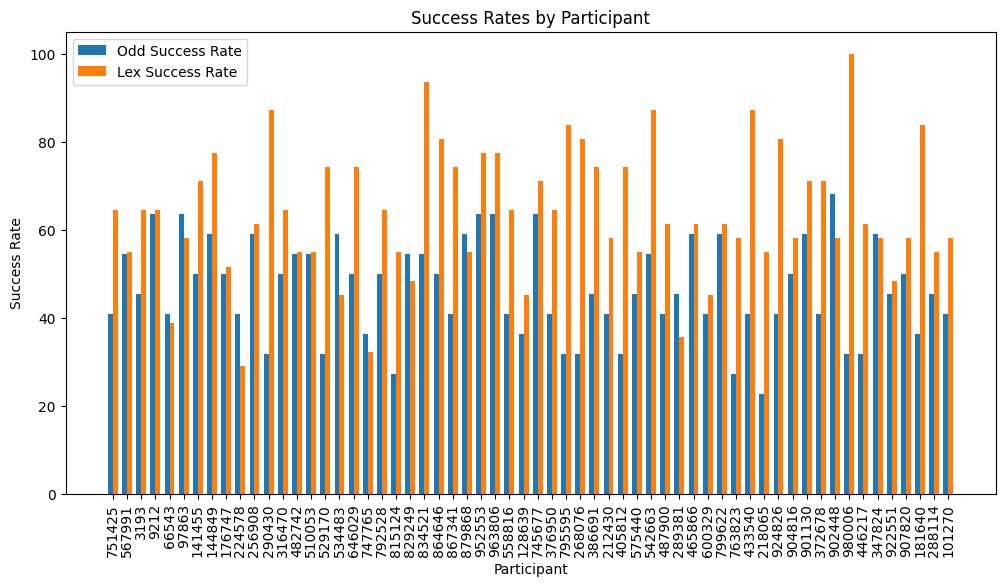

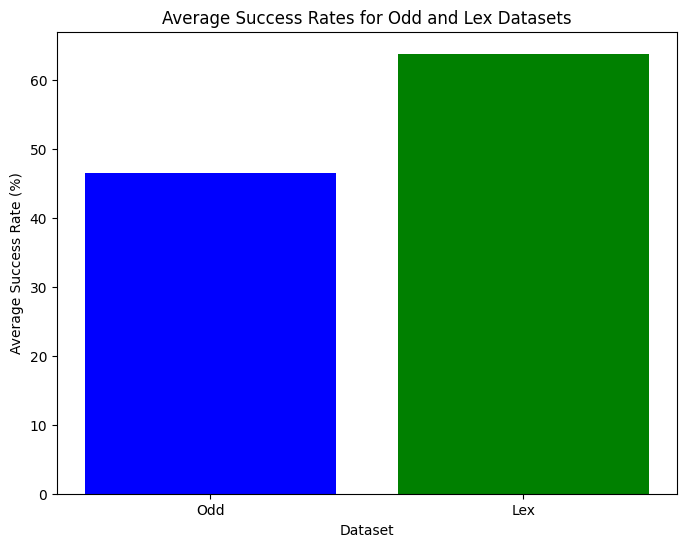

In [ ]:
# @title df_lex VS df_odd


# -------------- Merged dataset

df_lex = calculate_success_rate_by(df_lex, 'Participant')

df_merged = pd.merge(df_odd[['Participant', 'SuccessRateParticipant']], df_lex[['Participant', 'SuccessRateParticipant']], on='Participant', how='inner')

df_merged = df_merged.drop_duplicates(subset='Participant')

do_ttest(df_merged['SuccessRateParticipant_x'], df_merged['SuccessRateParticipant_y'])


# Plotting
participants = df_merged['Participant']
success_rates_odd = df_merged['SuccessRateParticipant_x']
success_rates_lex = df_merged['SuccessRateParticipant_y']

x = range(len(participants))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars
bars1 = ax.bar(x, success_rates_odd, width, label='Odd Success Rate')
bars2 = ax.bar([p + width for p in x], success_rates_lex, width, label='Lex Success Rate')

# Add labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Participant')
ax.set_ylabel('Success Rate')
ax.set_title('Success Rates by Participant')
ax.set_xticks([p + width/2 for p in x])
ax.set_xticklabels(participants, rotation=90)
ax.legend()

# Show the plot
plt.show()

# Calculate overall average success rates
avg_success_rate_lex = df_lex['SuccessRateParticipant'].mean()
avg_success_rate_odd = df_odd['SuccessRateParticipant'].mean()

# Prepare data for plotting
labels = ['Odd', 'Lex']
success_rates = [avg_success_rate_odd, avg_success_rate_lex]

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars
bars = ax.bar(labels, success_rates, color=['blue', 'green'])

# Add labels, title, and custom y-axis tick labels, etc.
ax.set_xlabel('Dataset')
ax.set_ylabel('Average Success Rate (%)')
ax.set_title('Average Success Rates for Odd and Lex Datasets')

# Show the plot
plt.show()

In [ ]:
# @title save DataFrame to CSV
# Save DataFrame to CSV
df_odd.to_csv('df_odd.csv', index=False)

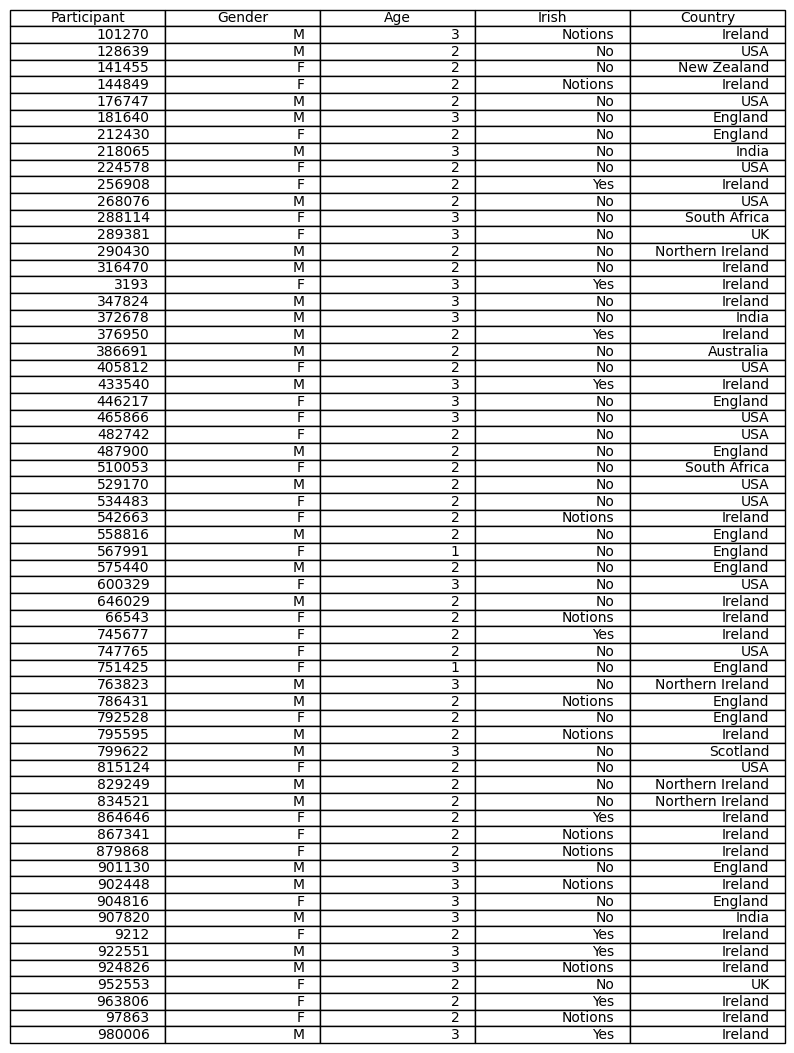

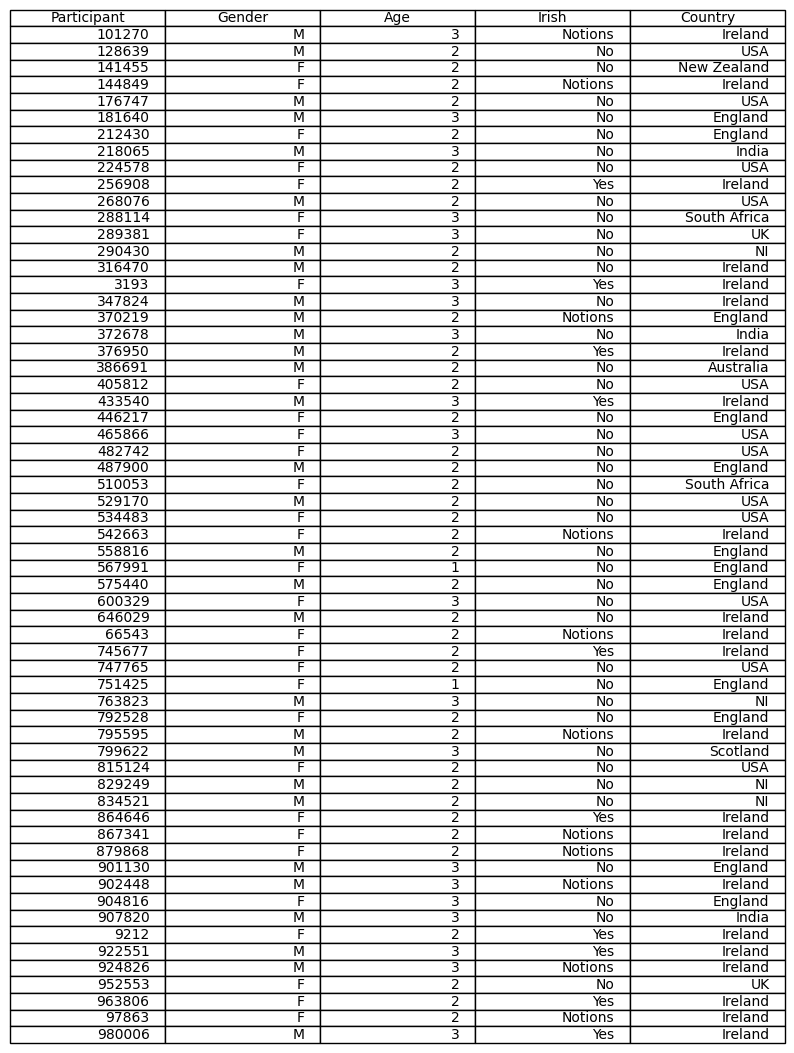

In [ ]:
# @title TABLE PARTICIPANTS
# Group by 'Participant' and select the first row of each group
unique_participants_df = df_odd.groupby('Participant').first().reset_index()
# Select the columns you want
selected_columns = ['Participant', 'Gender', 'Age', 'Irish', 'Country']
# Create a new DataFrame with only the selected columns
table_df = unique_participants_df[selected_columns]
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
# Hide the axes
ax.axis('off')
# Plot the table
table = ax.table(cellText=table_df.values,
                 colLabels=table_df.columns,
                 loc='center')
# Adjust the font size
table.auto_set_font_size(False)
table.set_fontsize(10)
# Save the figure as an image
plt.savefig('participant_table.png', bbox_inches='tight')


# @title TABLE PARTICIPANTS

#Group by 'Participant' and select the first row of each group
unique_participants_df = df_lex.groupby('Participant').first().reset_index()

# Select the columns you want
selected_columns = ['Participant', 'Gender', 'Age', 'Irish', 'Country']

# Create a new DataFrame with only the selected columns
table_df = unique_participants_df[selected_columns]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Hide the axes
ax.axis('off')

# Plot the table
table = ax.table(cellText=table_df.values,
                 colLabels=table_df.columns,
                 loc='center')

# Adjust the font size
table.auto_set_font_size(False)
table.set_fontsize(10)

# Save the figure as an image
plt.savefig('participant_table_lex.png', bbox_inches='tight')

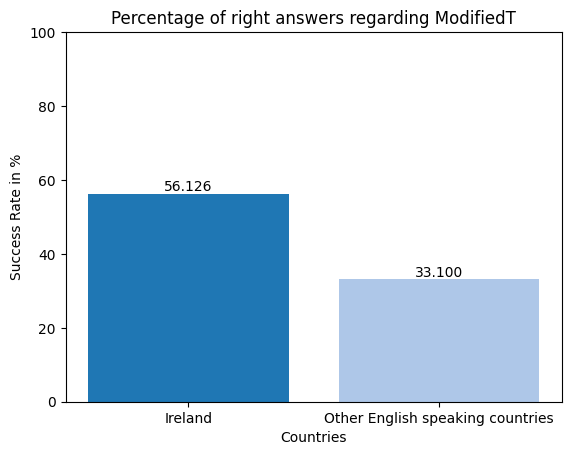

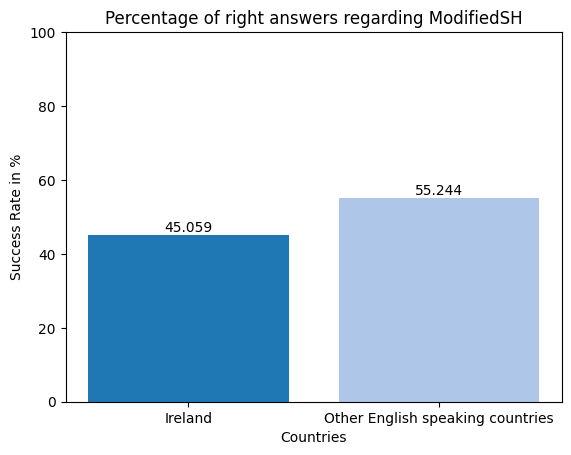

Chi2 impact of country on success
Chi-square statistic: 5.018311494662822
P-value: 0.02508061466665896
Degrees of freedom: 1
Expected frequencies table:
[[270.43548387 458.56451613]
 [235.56451613 399.43548387]]
The result is significant. There is a significant association between the variables.

Chi2 impact of condition on success
Chi-square statistic: 12.835151161660347
P-value: 0.0003401679774968573
Degrees of freedom: 1
Expected frequencies table:
[[364.5 364.5]
 [317.5 317.5]]
The result is significant. There is a significant association between the variables.

---- Performing ANOVA test ----
ANOVA results:
                     sum_sq      df             F  PR(>F)
C(Condition1)  9.684056e-27     1.0  8.257571e-29     1.0
Residual       1.597284e+05  1362.0           NaN     NaN
ANOVA is not significant, so Tukey HSD test is not performed.



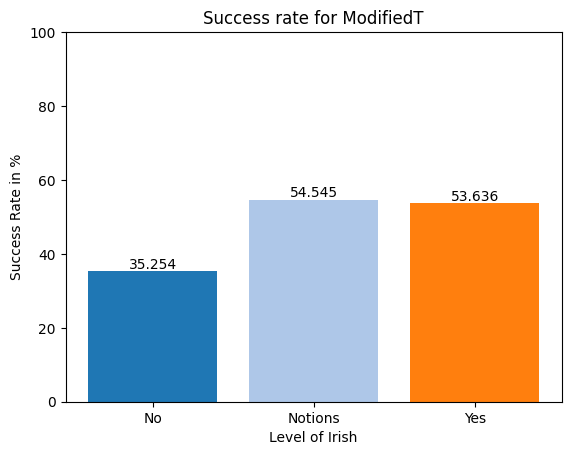

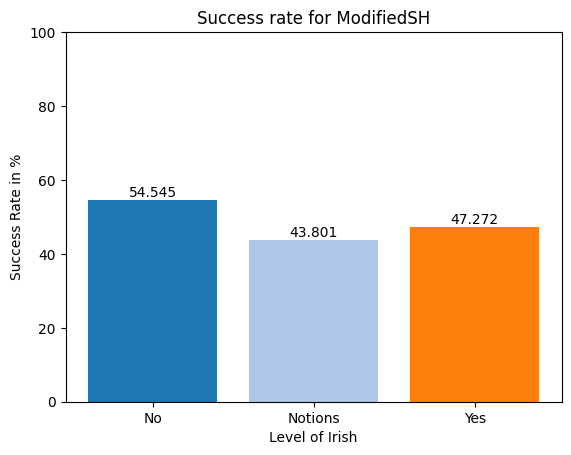

---- Performing ANOVA test ----
ANOVA results:
                 sum_sq      df          F        PR(>F)
C(Irish)    7476.680534     2.0  33.417564  6.792547e-15
Residual  152251.704446  1361.0        NaN           NaN

Tukey HSD test results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
     No Notions   4.2743    0.0  2.4778 6.0708   True
     No     Yes   5.5548    0.0  3.6888 7.4208   True
Notions     Yes   1.2805 0.3956 -1.0313 3.5922  False
-----------------------------------------------------
Chi-square statistic: 3.004151201966965
P-value: 0.22266751127190826
Degrees of freedom: 2
Expected frequencies table:
[[482.08064516 129.33870968 117.58064516]
 [419.91935484 112.66129032 102.41935484]]
The result is not significant. There is no significant association between the variables.


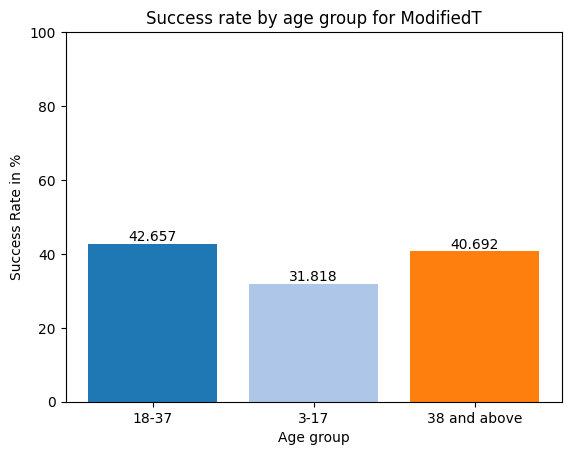

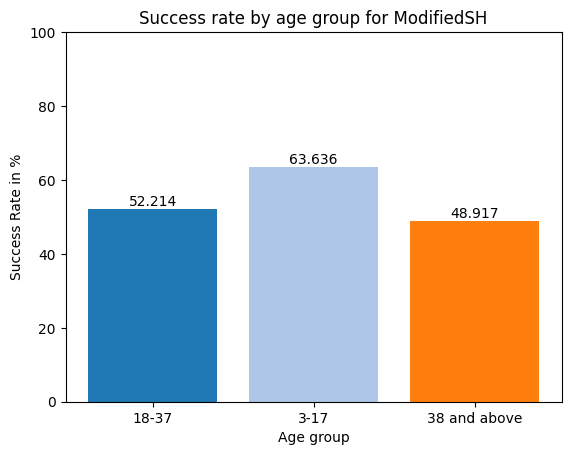

age1 vs age2 vs age3
Chi-square statistic: 0.8604128029422105
P-value: 0.6503748425445985
Degrees of freedom: 2
Expected frequencies table:
[[ 23.51612903 458.56451613 246.91935484]
 [ 20.48387097 399.43548387 215.08064516]]
The result is not significant. There is no significant association between the variables.

---- Performing ANOVA test ----
ANOVA results:
                 sum_sq      df         F    PR(>F)
C(Age)      2143.731800     2.0  9.257307  0.000102
Residual  157584.653181  1361.0       NaN       NaN

Tukey HSD test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.2933  0.983 -4.1958  3.6091  False
     1      3  -2.9257 0.1968 -6.9089  1.0575  False
     2      3  -2.6324 0.0001 -4.0893 -1.1755   True
----------------------------------------------------
If it's close to -1, it indicates a strong negative correlation (as one variable incr

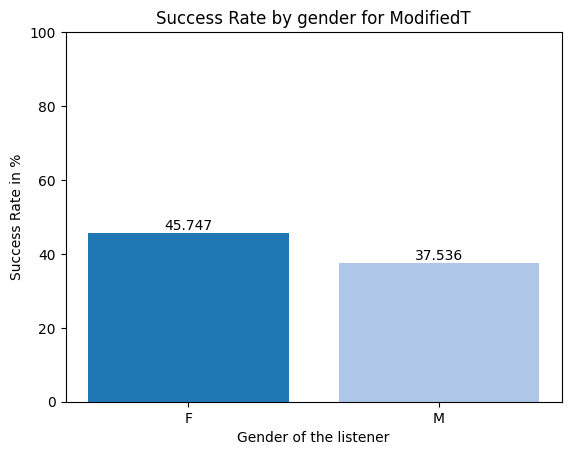

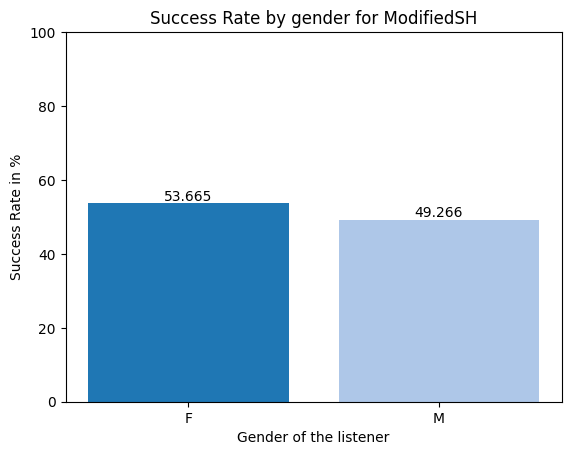

F vs M listeners
Chi-square statistic: 5.197705842325265
P-value: 0.022616718835778964
Degrees of freedom: 1
Expected frequencies table:
[[364.5 364.5]
 [317.5 317.5]]
The result is significant. There is a significant association between the variables.

---- Performing Ttest ----
Reject the null hypothesis. There is a significant difference between the means.
t-statistic: -11.240316514349402
p-value: 4.2705556005696875e-28



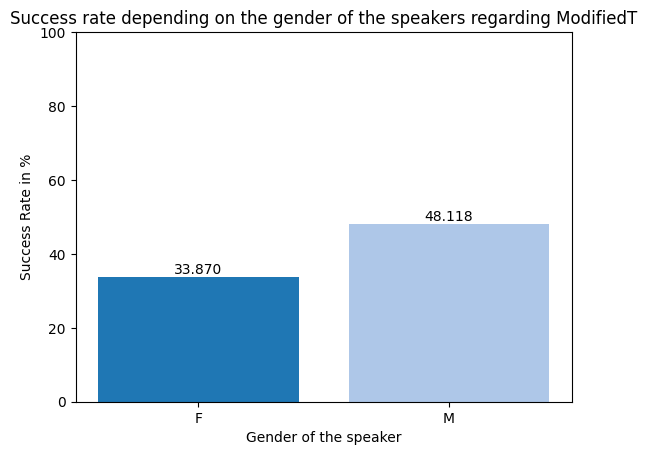

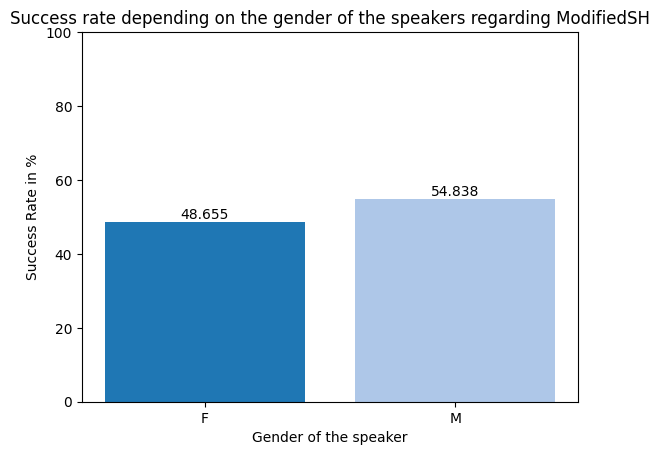

Chi-square statistic: 11.326519987470702
P-value: 0.0007640795824298461
Degrees of freedom: 1
Expected frequencies table:
[[364.5 364.5]
 [317.5 317.5]]
The result is significant. There is a significant association between the variables.

---- Performing Ttest ----
Fail to reject the null hypothesis. There is not enough evidence to conclude a significant difference.
t-statistic: 0.0
p-value: 1.0



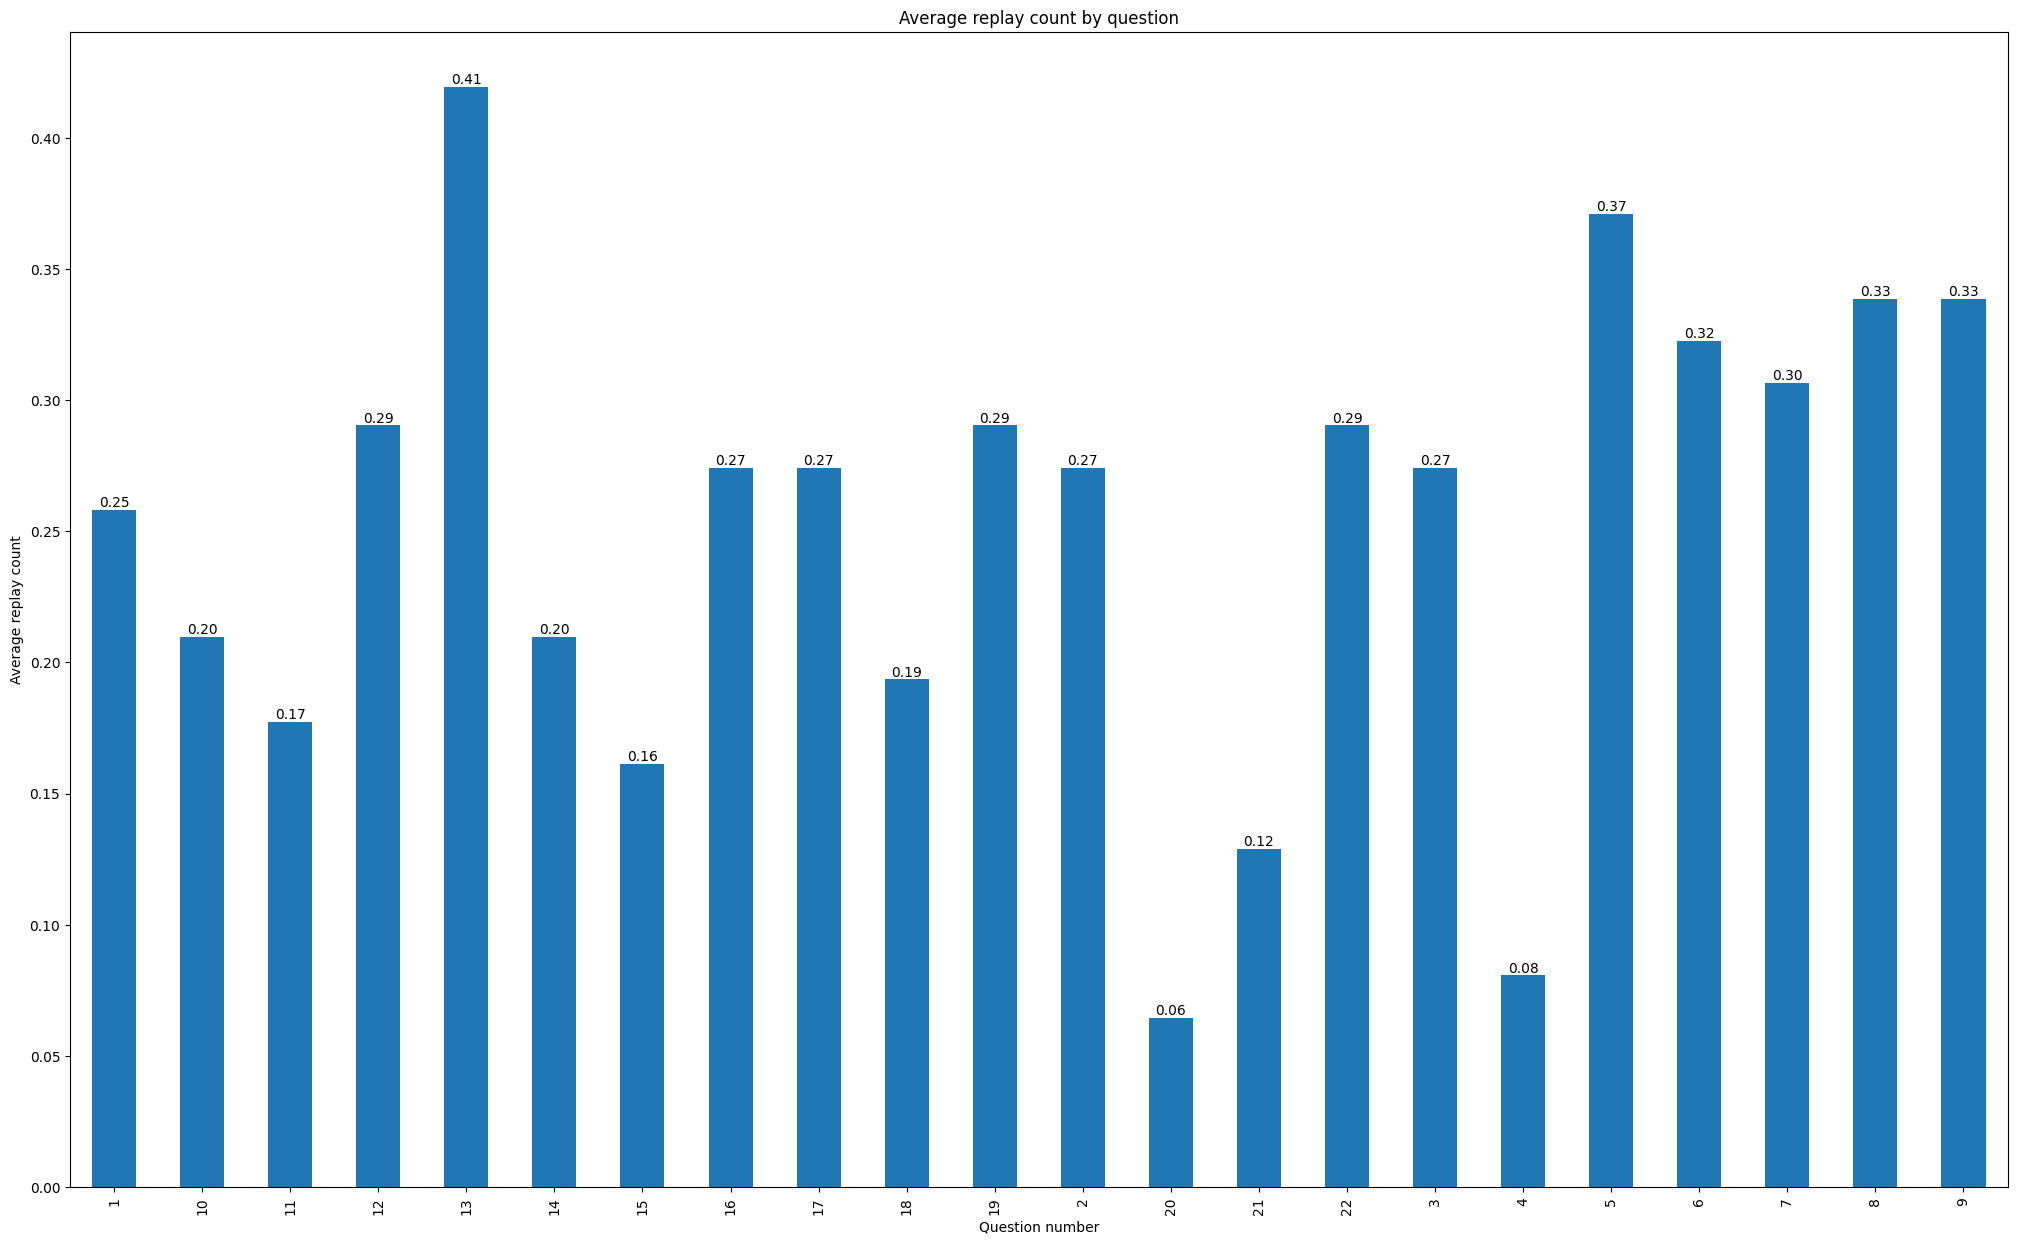

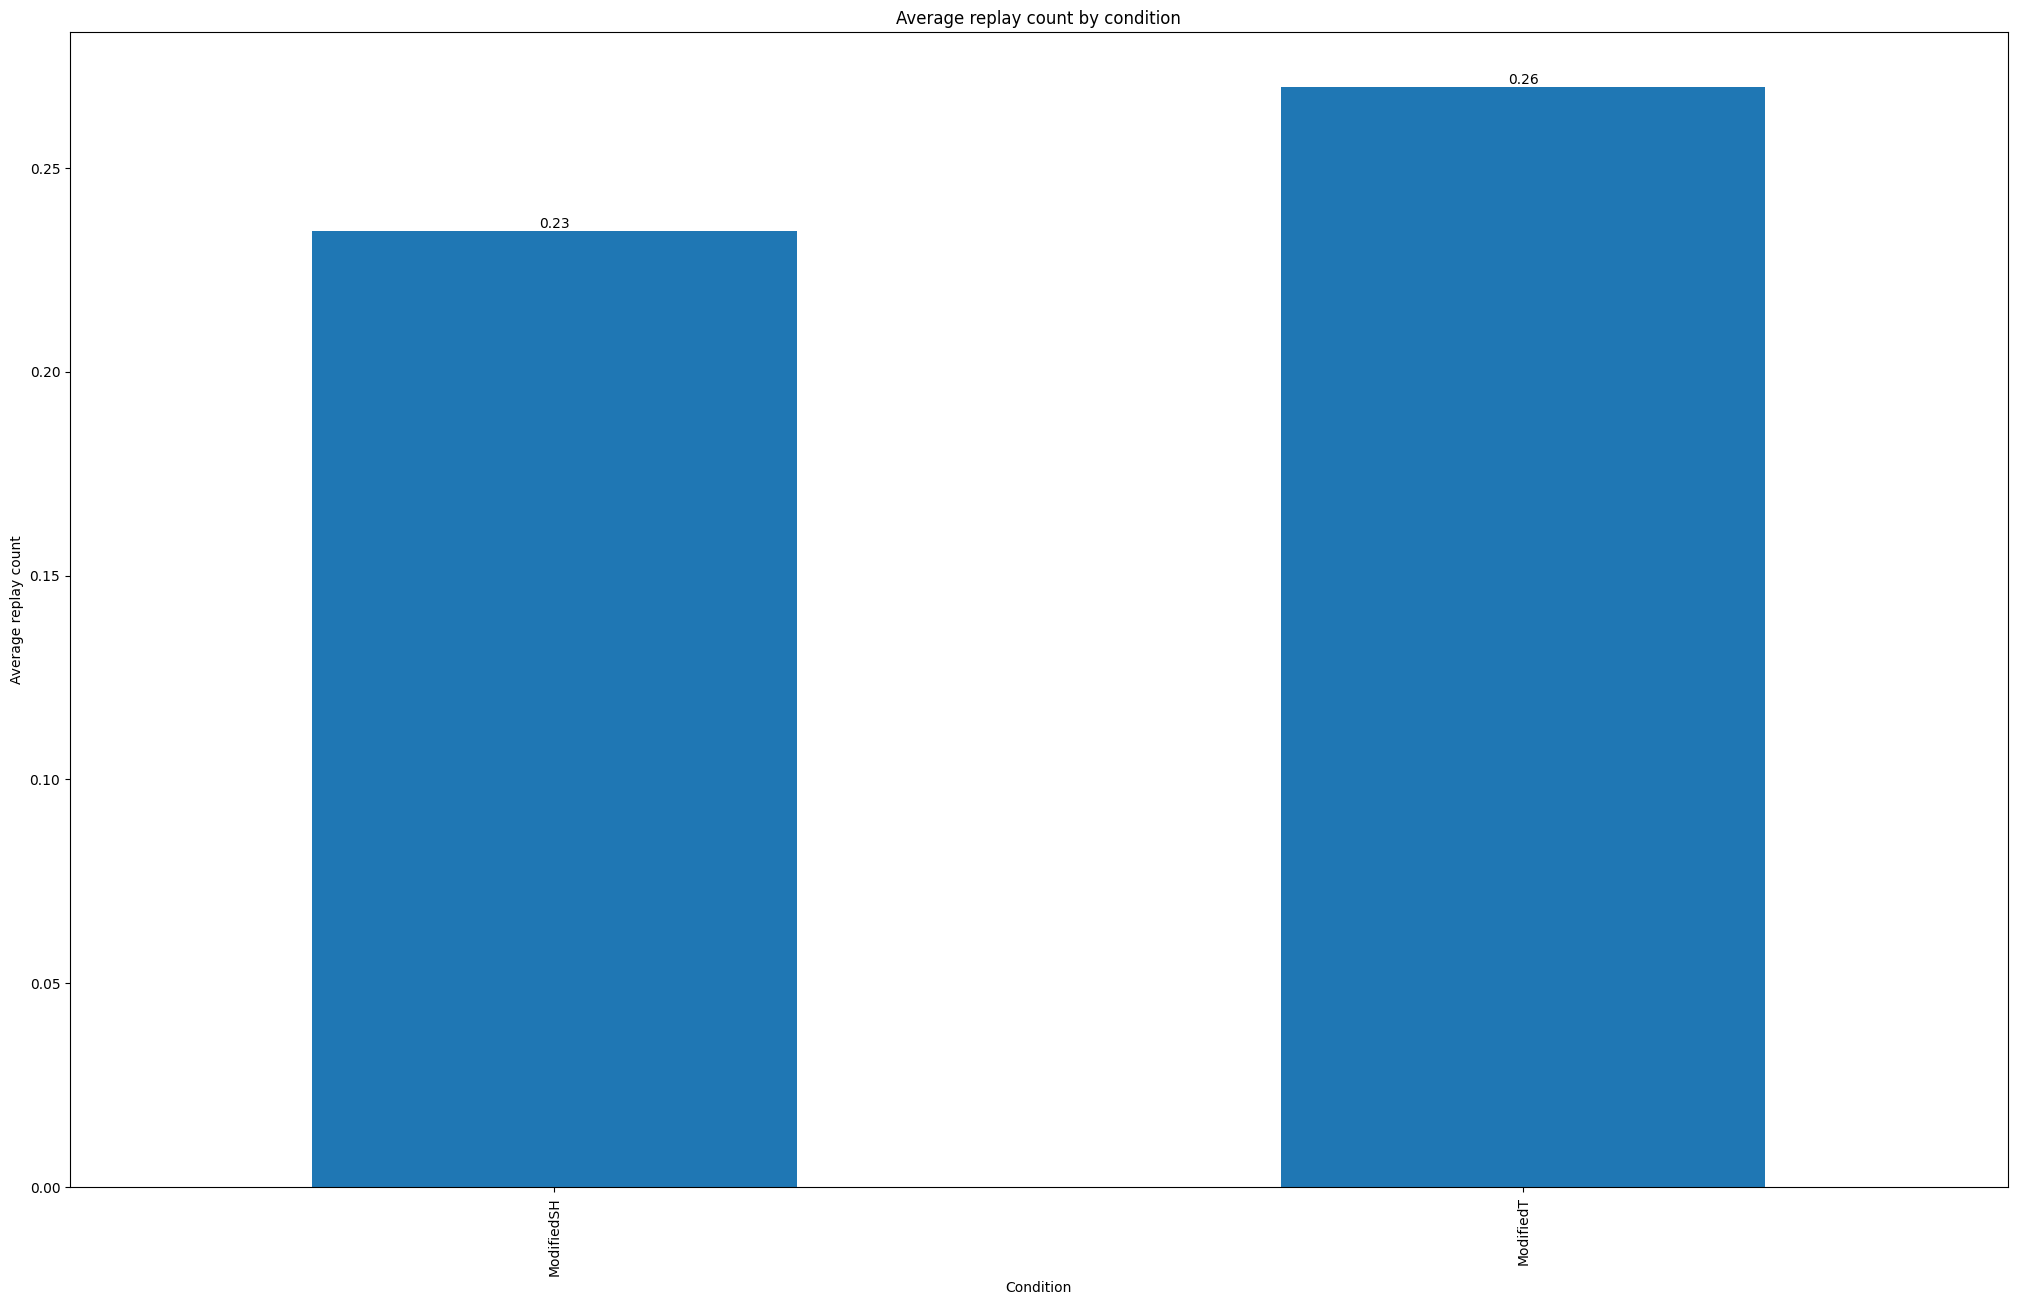

If it's close to -1, it indicates a strong negative correlation (as one variable increases, the other tends to decrease). If it's close to 0, it indicates no linear correlation between the variables.
Pearson correlation coefficient between Success and Replay: 0.0013277870402840823
P-value: 0.9609245668927788

Replay vs success
Chi-square statistic: 13.354743060839189
P-value: 0.037736000409917814
Degrees of freedom: 6
Expected frequencies table:
[[5.91644428e+02 1.06357038e+02 2.35161290e+01 3.74120235e+00
  2.13782991e+00 1.06891496e+00 5.34457478e-01]
 [5.15355572e+02 9.26429619e+01 2.04838710e+01 3.25879765e+00
  1.86217009e+00 9.31085044e-01 4.65542522e-01]]
The result is significant. There is a significant association between the variables.

Replay vs condition
Chi-square statistic: 5.690526094497169
P-value: 0.4587344750531094
Degrees of freedom: 6
Expected frequencies table:
[[5.535e+02 5.535e+02]
 [9.950e+01 9.950e+01]
 [2.200e+01 2.200e+01]
 [3.500e+00 3.500e+00]
 [2.000e+00 2

In [ ]:
# @title ALL PARTICIPANTS

# view beginning of the table
df_odd.head()

#------------By COUNTRY------------------------------------------------------------------------------------------------------------------------------------------------------------
#go into list condition and take the value x
for x in condition:
    df = df_odd[df_odd['Condition1'] == x]
    # plot_success_rate_by_country(df,x)
    plot_success_rate_by_parameter(df, x, 'Country_Categorized', 'Countries', 'Success Rate in %',  'Percentage of right answers regarding ')
#----------Chi2 impact of country on success
print('Chi2 impact of country on success')
do_chi_square_test(df_odd['Success'], df_odd['Country_Categorized'])
print('')
#----------Chi2 impact of condition on success
print('Chi2 impact of condition on success')
do_chi_square_test(df_odd['Success'], df_odd['Condition1'])
print('')
#----------Anova impact of condition on successrate
do_anova(df_odd, 'SuccessRateParticipant', 'Condition1')
print('')

#------------By LEVEL OF IRISH-----------------------------------------------------------------------------------------------------------------------------------------------------------
for x in condition:
    df = df_odd[df_odd['Condition1'] == x]
    plot_success_rate_by_parameter(df, x, 'Irish', 'Level of Irish', 'Success Rate in %',  'Success rate for ')

#---------Anova
do_anova(df_odd, 'SuccessRateParticipant', 'Irish')
#---------Chi2
do_chi_square_test(df_odd['Success'], df_odd['Irish'])

#-----------------------------------------------By AGE----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
for x in condition:
    df = df_odd[df_odd['Condition1'] == x]
    plot_success_rate_by_parameter(df, x, 'Age_group', 'Age group', 'Success Rate in %',  'Success rate by age group for ')
print('age1 vs age2 vs age3')
#--------------------CHI2 age
do_chi_square_test(df_odd['Success'], df_odd['Age'])
print('')
#-------------------ANOVA and TUKEY HSD Age
do_anova(df_odd, 'SuccessRateParticipant', 'Age')
#--------------------Pearson correlation coefficient for Age of success
correlation = df_odd['SuccessRateParticipant'].corr(df_odd['Age'])
print("If it's close to -1, it indicates a strong negative correlation (as one variable increases, the other tends to decrease). If it's close to 0, it indicates no linear correlation between the variables.")
print("Pearson correlation coefficient between Success and Age:", correlation)
print("")
stats.pearsonr(df_odd['SuccessRateParticipant'], df_odd['Age'])

#--------------------------------------------By GENDER----------------------------------------------------------------------------------------------------------------------------------------------------------------------
for x in condition:
    df = df_odd[df_odd['Condition1'] == x]
    plot_success_rate_by_parameter(df, x, 'Gender', 'Gender of the listener', 'Success Rate in %',  'Success Rate by gender for ')

#The chi-square test examines the association or independence between categorical variables (Success and Gender).
#The t-test compares the means of a numerical variable (SuccessRateCountry_Categorized) between two groups defined by a categorical variable (Gender)
print('F vs M listeners')
# ---------------------chi2 gender listener
do_chi_square_test(df_odd['Success'], df_odd['Gender'])
print('')
#--------------------ttest
val1 = df_odd[df_odd['Gender'] == 'M']['SuccessRateParticipant']
val2 = df_odd[df_odd['Gender'] == 'F']['SuccessRateParticipant']
do_ttest(val1, val2)

#---------------------------------------------By GENDER of the speaker-------------------------------------------------------------------------------------------------------------------
for x in condition:
    df = df_odd[df_odd['Condition1'] == x]
    plot_success_rate_by_parameter(df, x, 'Condition2', 'Gender of the speaker', 'Success Rate in %',  'Success rate depending on the gender of the speakers regarding ')
# ---------------------chi2 gender speaker
do_chi_square_test(df_odd['Success'], df_odd['Condition2'])
print('')
#--------------------ttest
val1 = df_odd[df_odd['Condition2'] == 'M']['SuccessRateParticipant']
val2 = df_odd[df_odd['Condition2'] == 'F']['SuccessRateParticipant']
do_ttest(val1, val2)


#------------Average replay By question-----------------------------------------------------------------------------------------------------------------------------------------
plot_bar_average_parameter(df_odd, 'ItemNb', 'Question number', 'Average replay count', 'Average replay count by question', 'Replay')

#------------Average reaction time in s By condition----------------------------------------------------------------------------------------------------------------------------
plot_bar_average_parameter(df_odd, 'Condition1', 'Condition', 'Average replay count', 'Average replay count by condition', 'Replay')


# ----------------------------Calculate Pearson correlation coefficient replay success
correlation_success_reaction = df_odd['SuccessRateParticipant'].corr(df_odd['Replay'])
print("If it's close to -1, it indicates a strong negative correlation (as one variable increases, the other tends to decrease). If it's close to 0, it indicates no linear correlation between the variables.")
print("Pearson correlation coefficient between Success and Replay:", correlation_success_reaction)
# Calculate Pearson correlation coefficient and p-value for Success and Reaction time
corr_coef_success_reaction, p_value_success_reaction = stats.pearsonr(df_odd['SuccessRateParticipant'], df_odd['Replay'])
print("P-value:", p_value_success_reaction)
print("")

#-----chi2 success and replay
print('Replay vs success')
do_chi_square_test(df_odd['Success'], df_odd['Replay'])
print('')

#-----chi2 replay and condition
print('Replay vs condition')
do_chi_square_test(df_odd['Replay'], df_odd['Condition1'])
print('')

#---------------ttest IRISH vs OTHERS----------------------------------------------------------------------------------------------------------------------------------------------

All_filtered_df_odd_mod_t = df_mod_T.loc[df_mod_T['Country_Categorized'].isin(['Ireland', 'Other English speaking countries'])]
All_filtered_df_odd_mod_sh = df_mod_SH.loc[df_mod_SH['Country_Categorized'].isin(['Ireland', 'Other English speaking countries'])]

#check impact of country on success with a chi2 test
do_chi_square_test(df_odd['Success'], df_odd['Country_Categorized'])

print('')
print('Anova success rate irish vs other depending on the condition')
do_anova(df_odd, 'SuccessRateCountry_Categorized', 'Condition1')

print('check if there is a significant difference btw success when Modified T and success when ModifiedSH (other and Irish)')
val1 = df_odd[df_odd['Condition1'] == 'ModifiedT']['SuccessRateCountry_Categorized']
val2 = df_odd[df_odd['Condition1'] == 'ModifiedSH']['SuccessRateCountry_Categorized']
do_ttest(val1, val2)

#anova ireland vs other on modt
#same mod sh. Is it modSH or modT that has more impact on the data?


#----create new column successrate in this data frame
All_filtered_df_odd_mod_t = calculate_success_rate_by(All_filtered_df_odd_mod_t, 'Participant')
All_filtered_df_odd_mod_sh = calculate_success_rate_by(All_filtered_df_odd_mod_sh, 'Participant')
#----ttest mod t of irish vs mod t of other
#All_filtered_df_odd_mod_t.to_csv('All_filtered_df_odd_mod_t.csv', index=False)
#----success rate of ireland for mod t vs success rate of other for mod T
print('ModifiedT')
val1 = All_filtered_df_odd_mod_t[(All_filtered_df_odd_mod_t['Country_Categorized'] == 'Ireland')]['SuccessRateParticipant']
val2 = All_filtered_df_odd_mod_t[(All_filtered_df_odd_mod_t['Country_Categorized'] == 'Other English speaking countries')]['SuccessRateParticipant']
do_ttest(val1, val2)

#----success rate of ireland for mod sh vs success rate of other for mod sh
print('Modified SH')
val1 = All_filtered_df_odd_mod_sh[(All_filtered_df_odd_mod_sh['Country_Categorized'] == 'Ireland')]['SuccessRateParticipant']
val2 = All_filtered_df_odd_mod_sh[(All_filtered_df_odd_mod_sh['Country_Categorized'] == 'Other English speaking countries')]['SuccessRateParticipant']
do_ttest(val1, val2)

#
#do_ttest2(df_odd, group_col='Country_Categorized', value_col='SuccessRateParticipant', group1='Ireland', group2='Other English speaking countries', condition_col='Condition1', condition_value='ModifiedT')

#
#do_ttest_conditions(df_odd, condition_col='Condition1', value_col='SuccessRateParticipant', condition1='ModifiedSH', condition2='ModifiedT')

[56.126482213438734, 45.059288537549406]


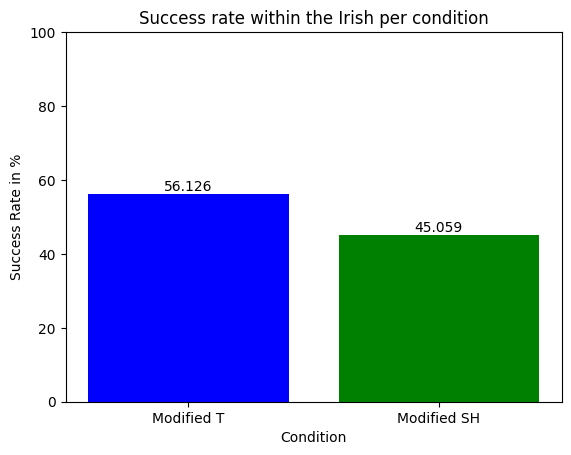

Chi-square statistic: 5.76365625
P-value: 0.01636099175343059
Degrees of freedom: 1
Expected frequencies table:
[[125. 125.]
 [128. 128.]]
The result is significant. There is a significant association between the variables.


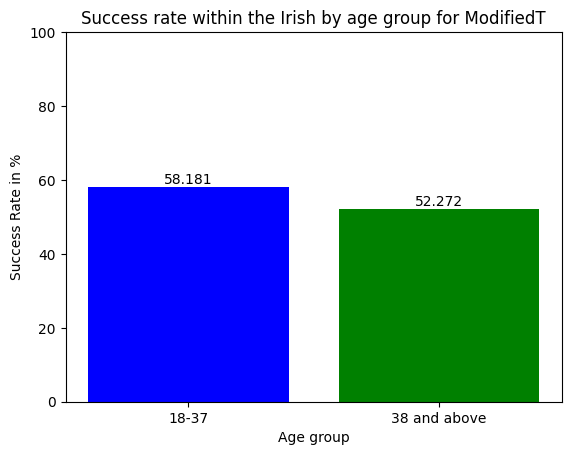

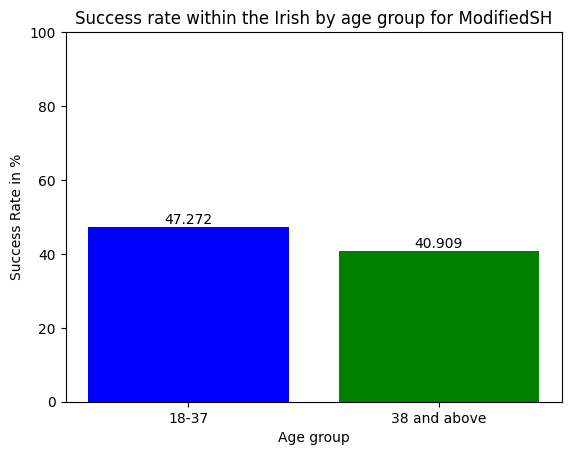

age2 vs age3
---- Performing Ttest ----
Reject the null hypothesis. There is a significant difference between the means.
t-statistic: 6.399718078039938
p-value: 3.563488909612334e-10

Chi-square statistic: 1.4923211588541658
P-value: 0.22185666792367098
Degrees of freedom: 1
Expected frequencies table:
[[163.04347826  86.95652174]
 [166.95652174  89.04347826]]
The result is not significant. There is no significant association between the variables.


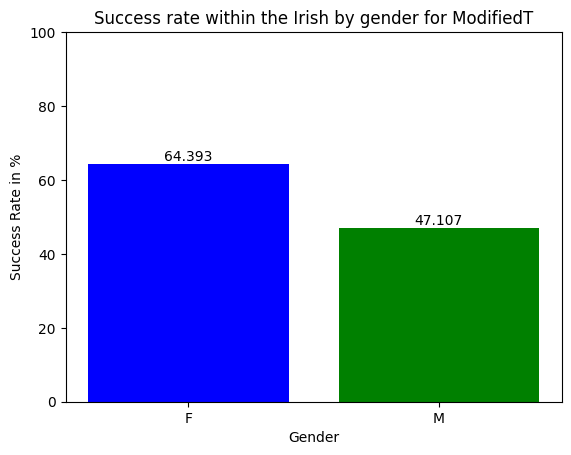

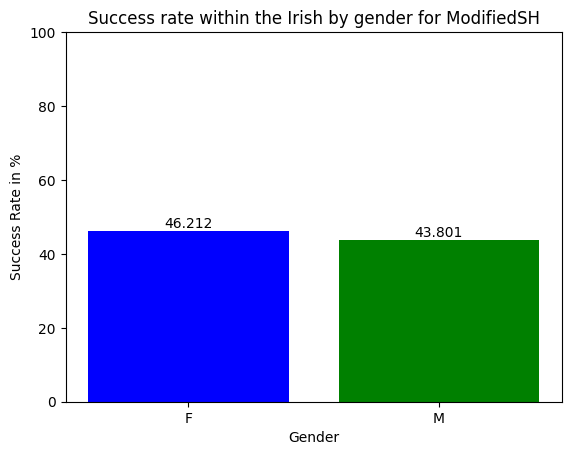

     Participant ItemNb ExpectedKey Condition2  Condition1  \
44          3193      1           e          F   ModifiedT   
45          3193      2           t          F  ModifiedSH   
46          3193      3           t          F   ModifiedT   
47          3193      4           e          M   ModifiedT   
48          3193      5           e          F   ModifiedT   
...          ...    ...         ...        ...         ...   
1359     William     18           r          M   ModifiedT   
1360     William     19           r          F   ModifiedT   
1361     William     20           r          F  ModifiedSH   
1362     William     21           t          F  ModifiedSH   
1363     William     22           t          F  ModifiedSH   

     key_resp_question3.keys  Replay Gender  Age  Country  ...  \
44                         r       0      F    3  Ireland  ...   
45                         e       0      F    3  Ireland  ...   
46                         r       0      F    3  Ireland

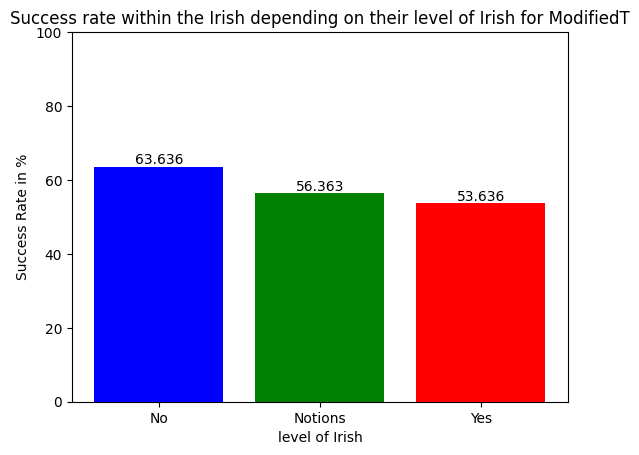

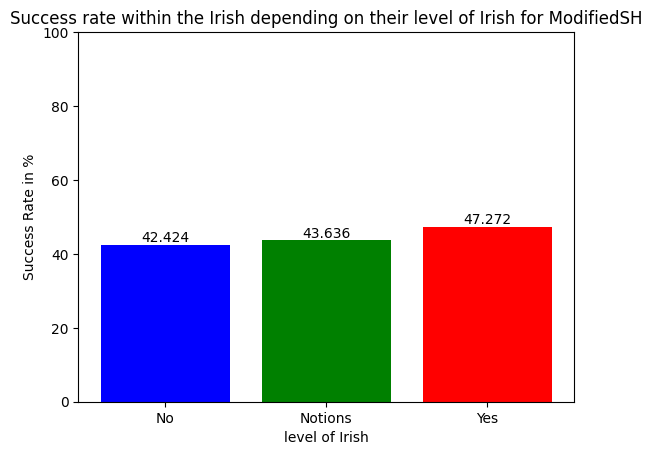

Chi-square statistic: 0.18948645833333333
P-value: 0.9096064648950437
Degrees of freedom: 2
Expected frequencies table:
[[ 32.60869565 108.69565217 108.69565217]
 [ 33.39130435 111.30434783 111.30434783]]
The result is not significant. There is no significant association between the variables.
---- Performing ANOVA test ----
ANOVA results:
                sum_sq     df         F    PR(>F)
C(Irish)    473.263598    2.0  2.085273  0.125346
Residual  57079.245080  503.0       NaN       NaN
ANOVA is not significant, so Tukey HSD test is not performed.


<ipython-input-32-96dbc48e6abe>:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[param1] = pd.to_numeric(dataset[param1], errors='coerce')


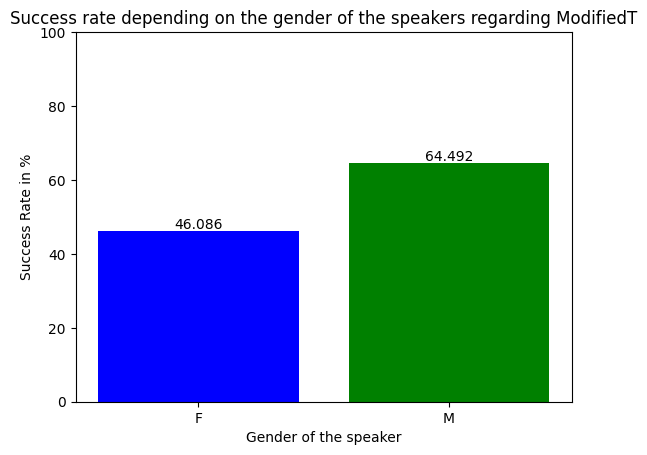

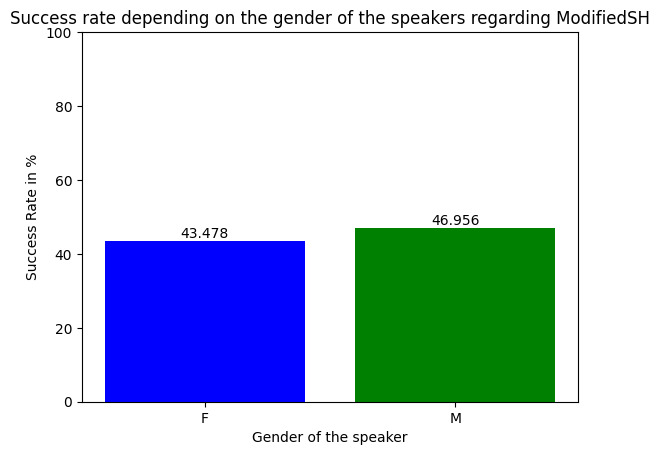

F vs M of the speaker
---- Performing Ttest ----
Fail to reject the null hypothesis. There is not enough evidence to conclude a significant difference.
t-statistic: 0.0
p-value: 1.0

Chi-square statistic: 6.64915625
P-value: 0.009920279108267762
Degrees of freedom: 1
Expected frequencies table:
[[125. 125.]
 [128. 128.]]
The result is significant. There is a significant association between the variables.


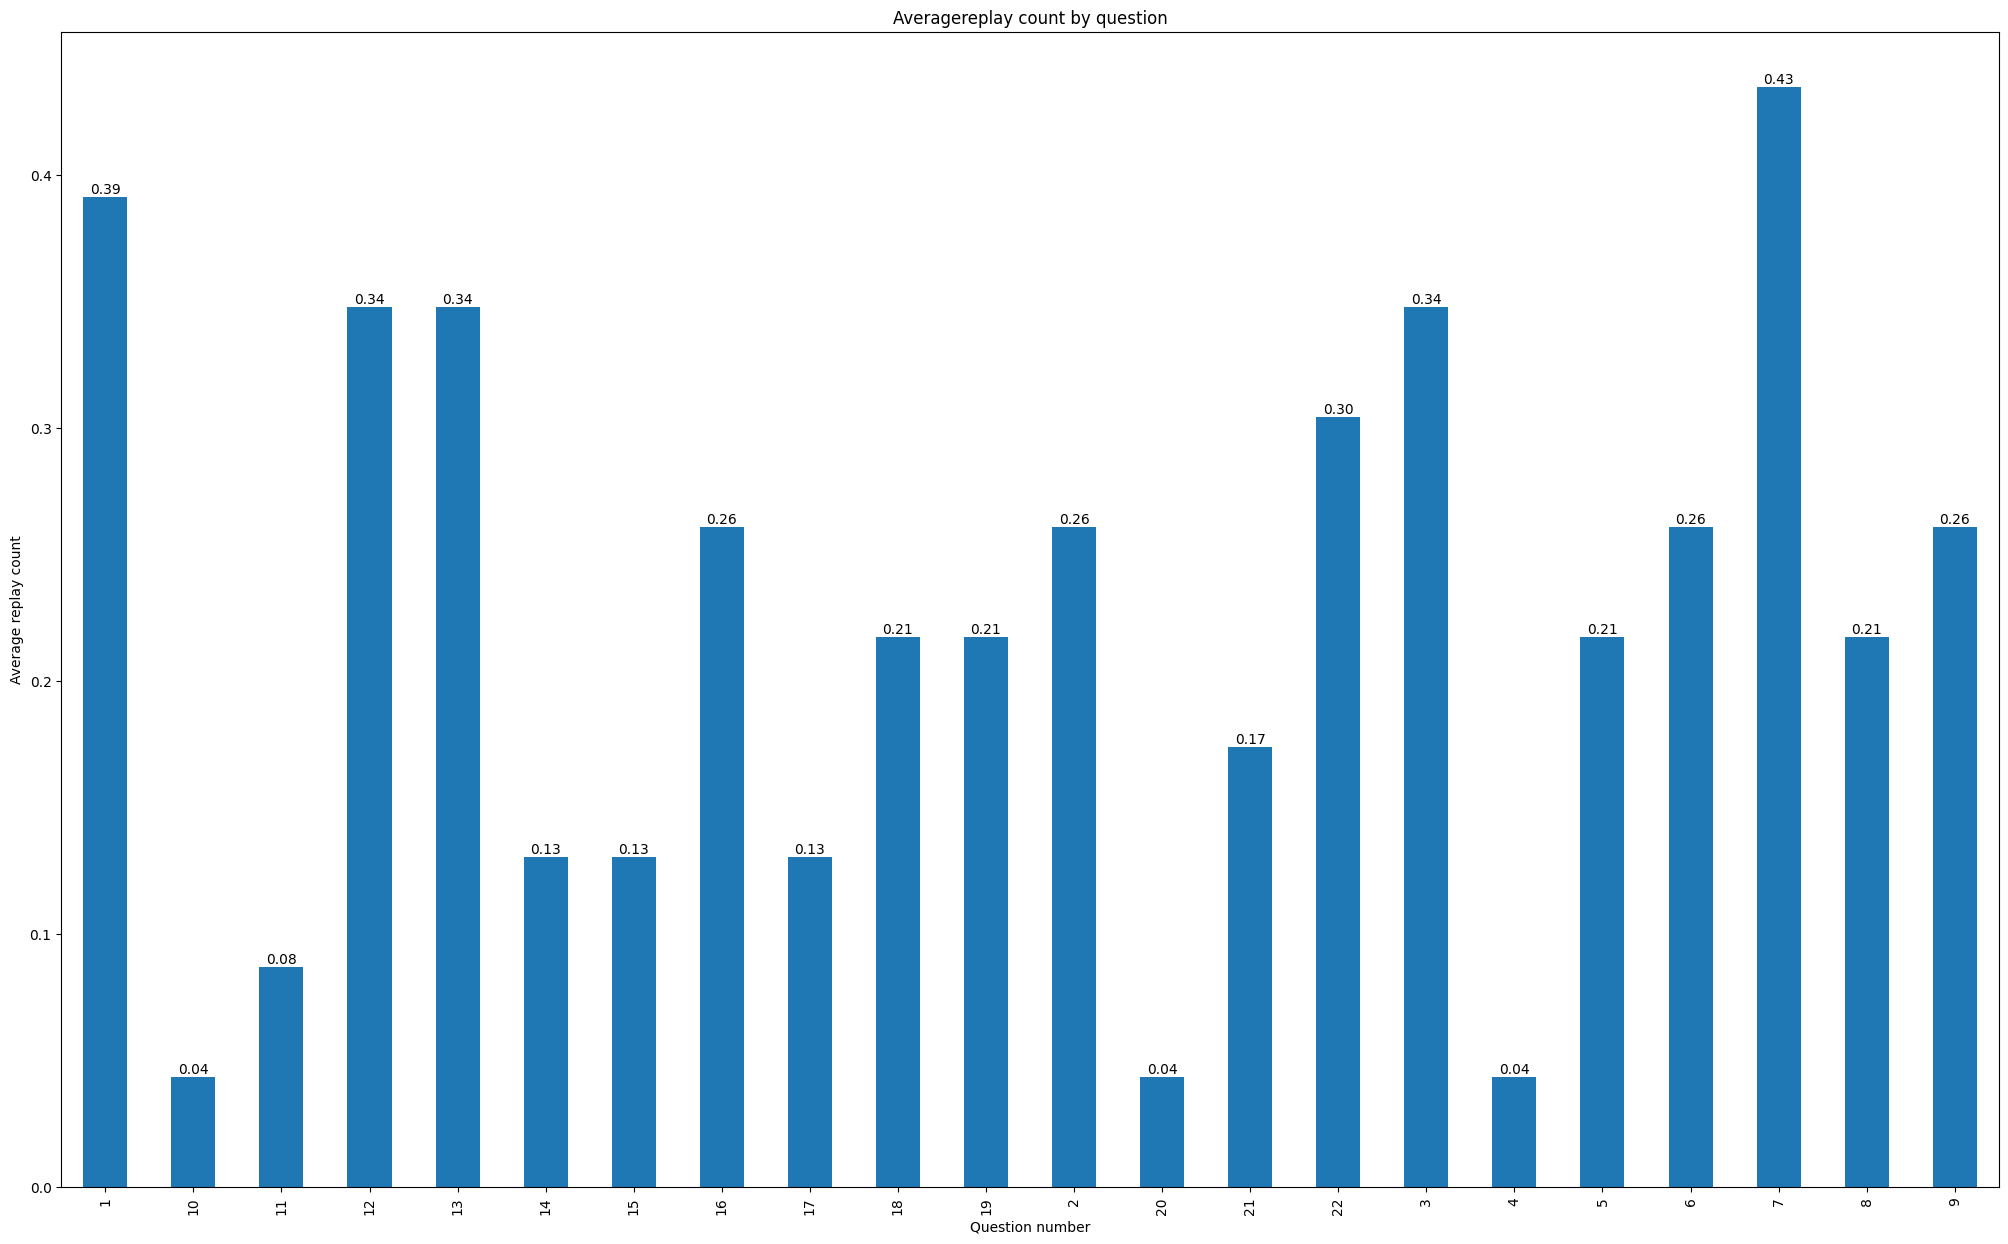

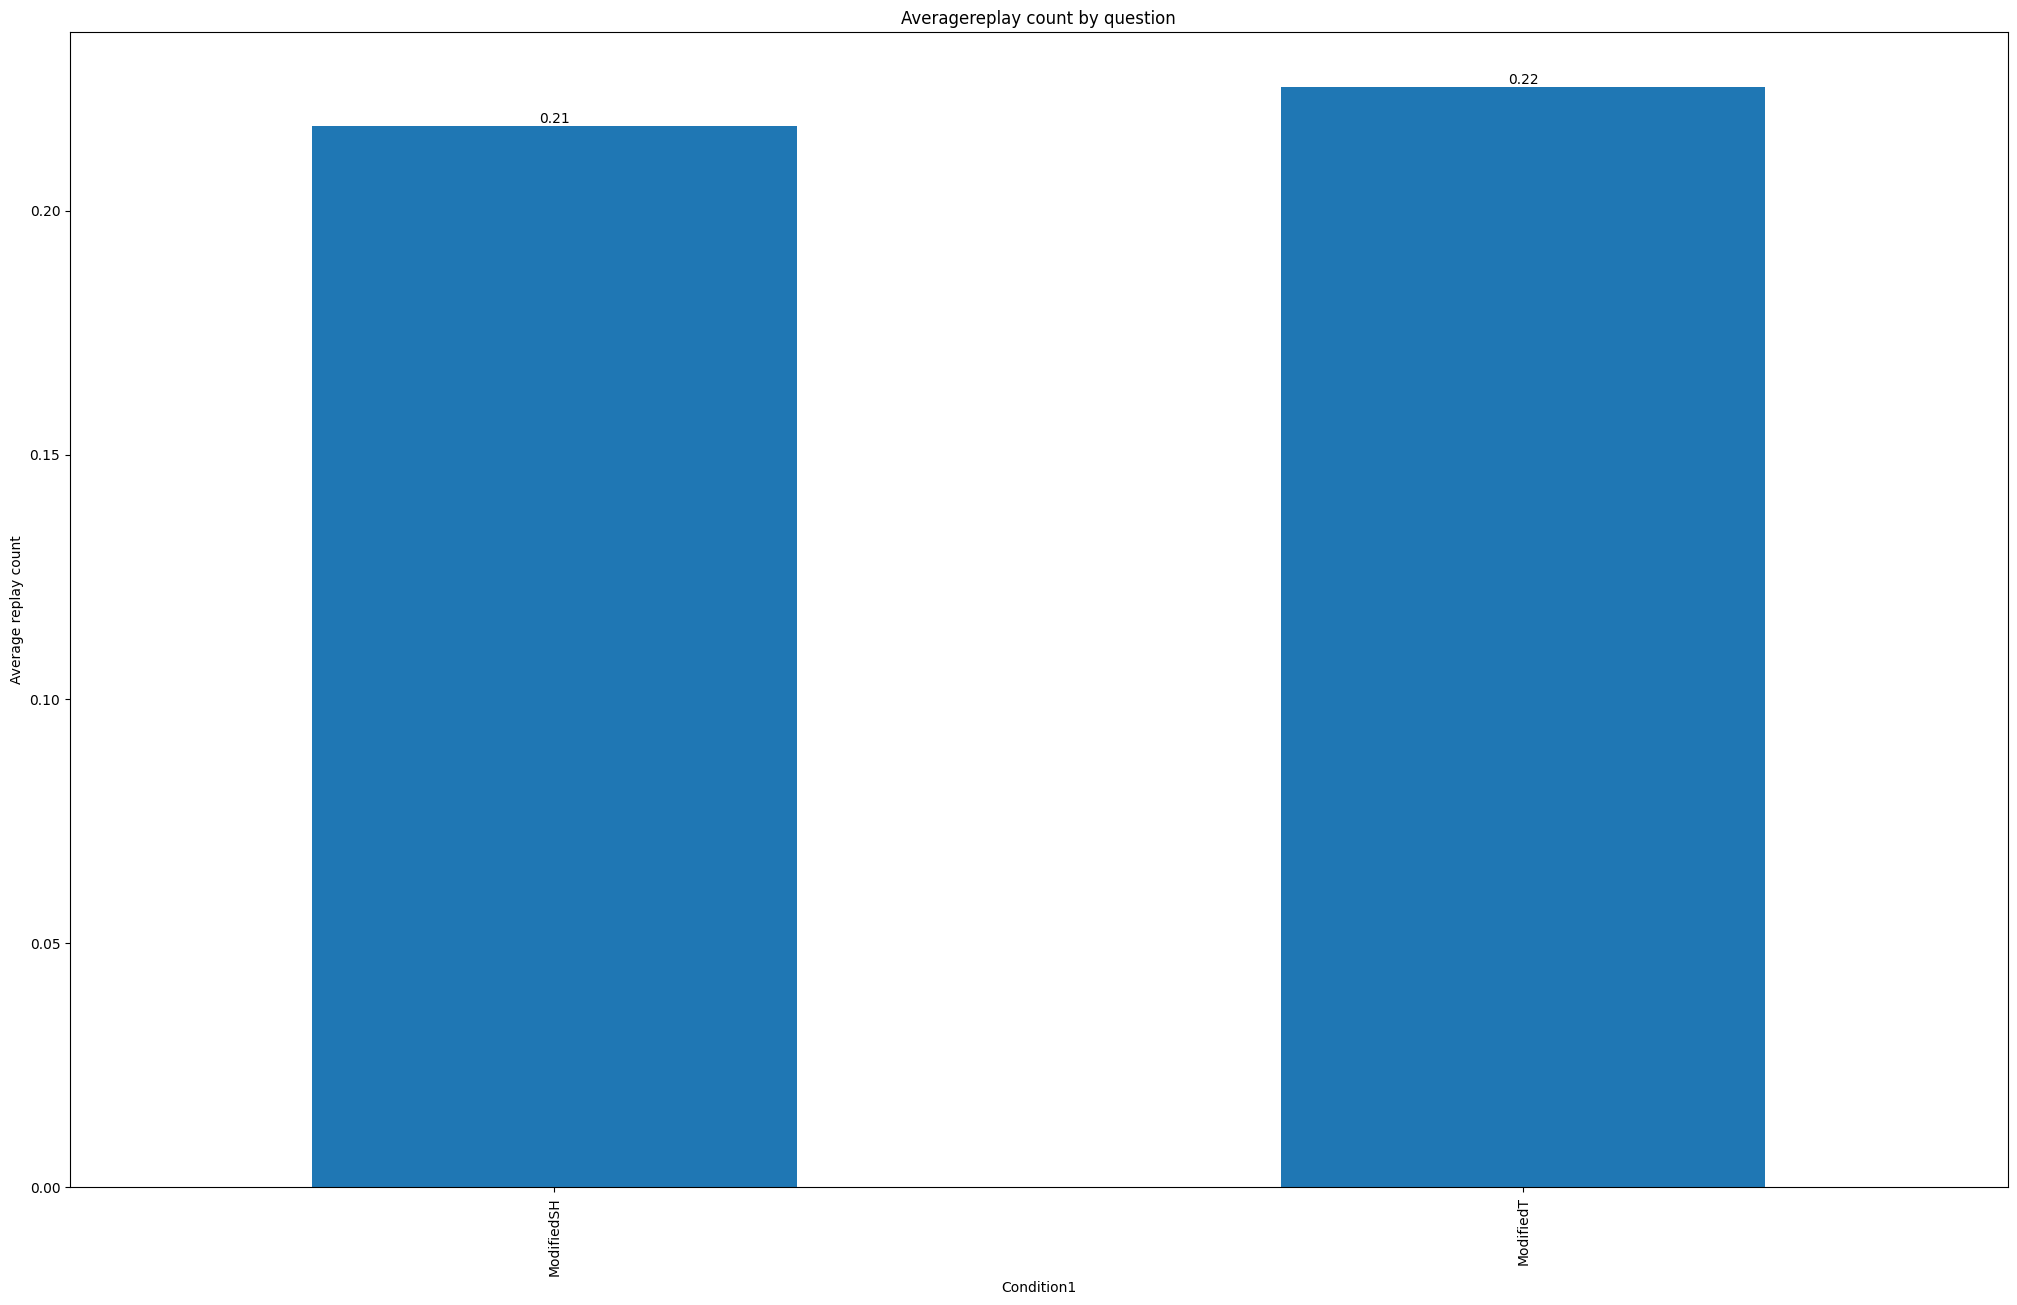


Calculating success rate for Participant

Success rate for 3193 is 63.64%
Success rate for 9212 is 63.64%
Success rate for 66543 is 45.45%
Success rate for 97863 is 72.73%
Success rate for 144849 is 72.73%
Success rate for 256908 is 63.64%
Success rate for 316470 is 54.55%
Success rate for 646029 is 54.55%
Success rate for 864646 is 63.64%
Success rate for 867341 is 45.45%
Success rate for 879868 is 63.64%
Success rate for 963806 is 81.82%
Success rate for Cliodhna is 72.73%
Success rate for Colin is 27.27%
Success rate for Conor is 27.27%
Success rate for Saoirse is 63.64%
Success rate for Ali is 27.27%
Success rate for Bertia is 63.64%
Success rate for Liam is 72.73%
Success rate for Maurice is 27.27%
Success rate for Pat is 81.82%
Success rate for Paul is 45.45%
Success rate for William is 36.36%

Calculating success rate for Participant

Success rate for 3193 is 27.27%
Success rate for 9212 is 63.64%
Success rate for 66543 is 36.36%
Success rate for 97863 is 54.55%
Success rate fo

<ipython-input-32-96dbc48e6abe>:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['SuccessRate' + column] = None
<ipython-input-32-96dbc48e6abe>:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['SuccessRate' + column] = None


In [ ]:
# @title WITHIN THE IRISH

filter_withinIrish = df_odd.loc[df_odd['Country'] == 'Ireland']
#-------------------------------- CONDITION
# Categorise 'Country' into 'Ireland'
filtered_df_odd_mod_t = df_mod_T.loc[df_mod_T['Country'] == 'Ireland']
filtered_df_odd_mod_sh = df_mod_SH.loc[df_mod_SH['Country'] == 'Ireland']
# Calculate success rate for each condition in Ireland
success_ModifiedT = 100 * filtered_df_odd_mod_t[filtered_df_odd_mod_t['Success'] == 1].shape[0] / filtered_df_odd_mod_t.shape[0]
success_ModifiedSH = 100 * filtered_df_odd_mod_sh[filtered_df_odd_mod_sh['Success'] == 1].shape[0] / filtered_df_odd_mod_sh.shape[0]
headers = ['Modified T','Modified SH']
datas = [success_ModifiedT, success_ModifiedSH]
print(datas)
plot_2d_array(headers, datas, 'Condition', 'Success Rate in %', 'Success rate within the Irish per condition', colours=plot_colours80s)

# ---------------CHI2 Condition
do_chi_square_test(filter_withinIrish['Success'], filter_withinIrish['Condition1'])
#-------------------------------AGE GROUP------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
for x in condition:
    df = filter_withinIrish[filter_withinIrish['Condition1'] == x]
    plot_success_rate_by_parameter(df, x, 'Age_group', 'Age group', 'Success Rate in %',  'Success rate within the Irish by age group for ', colours=plot_colours80s)
#----------------ttest age
print('age2 vs age3')
val1 = filter_withinIrish[filter_withinIrish['Age'] == 2]['SuccessRateParticipant']
val2 = filter_withinIrish[filter_withinIrish['Age'] == 3]['SuccessRateParticipant']
do_ttest(val1, val2)
# ---------------CHI2 Age
do_chi_square_test(filter_withinIrish['Success'], filter_withinIrish['Age'])

#--------------------------------GENDER-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
for x in condition:
    df = filter_withinIrish[filter_withinIrish['Condition1'] == x]
    plot_success_rate_by_parameter(df, x, 'Gender', 'Gender', 'Success Rate in %',  'Success rate within the Irish by gender for ', colours=plot_colours80s)
#--------------ttest gender
print(filter_withinIrish)
print('F vs M')
val1 = filter_withinIrish[filter_withinIrish['Gender'] == 'F']['SuccessRateParticipant']
val2 = filter_withinIrish[filter_withinIrish['Gender'] == 'M']['SuccessRateParticipant']
do_ttest(val1, val2)
# ---------------chi2 gender
do_chi_square_test(filter_withinIrish['Success'], filter_withinIrish['Gender'])

#--------------------------------LEVEL OF IRISH------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
for x in condition:
    df = filter_withinIrish[filter_withinIrish['Condition1'] == x]
    plot_success_rate_by_parameter(df, x, 'Irish', 'level of Irish', 'Success Rate in %',  'Success rate within the Irish depending on their level of Irish for ', colours=plot_colours80s)
# ---------------CHi2 Irish
do_chi_square_test(filter_withinIrish['Success'], filter_withinIrish['Irish'])
#----------------anova and TUKEY HSD irish
do_anova(filter_withinIrish, 'SuccessRateParticipant', 'Irish')

#------------------------------by GENDER of the speaker------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
for x in condition:
    df = filter_withinIrish[filter_withinIrish['Condition1'] == x]
    plot_success_rate_by_parameter(df, x, 'Condition2', 'Gender of the speaker', 'Success Rate in %',  'Success rate depending on the gender of the speakers regarding ', colours=plot_colours80s)
#-------------ttest
print('F vs M of the speaker')
val1 = filter_withinIrish[filter_withinIrish['Condition2'] == 'F']['SuccessRateParticipant']
val2 = filter_withinIrish[filter_withinIrish['Condition2'] == 'M']['SuccessRateParticipant']
do_ttest(val1, val2)
# ------------chi2 Gender of the Speaker
do_chi_square_test(filter_withinIrish['Success'], filter_withinIrish['Condition2'])

#------------Average reaction time in s By ItemNb------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
plot_bar_average_parameter(filter_withinIrish, 'ItemNb', 'Question number', 'Average replay count', 'Averagereplay count by question', 'Replay')

#------------Average reaction time in s By condition------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
plot_bar_average_parameter(filter_withinIrish, 'Condition1', 'Condition1', 'Average replay count', 'Averagereplay count by question', 'Replay')

#-----------TTEST comparing the success rate of Modified SH vs the success rate of Modified T ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#----create new column successrate in this data frame
filtered_df_odd_mod_t = calculate_success_rate_by(filtered_df_odd_mod_t, 'Participant')
filtered_df_odd_mod_sh = calculate_success_rate_by(filtered_df_odd_mod_sh, 'Participant')

print('Modified SH vs Modified T')
val1 = filtered_df_odd_mod_t['SuccessRateParticipant']
val2 = filtered_df_odd_mod_sh['SuccessRateParticipant']
do_ttest(val1, val2)

# -------------------------------Calculate Pearson correlation coefficient
print("")
correlation_success_reaction = filter_withinIrish['SuccessRateParticipant'].corr(filter_withinIrish['Replay'])
print("If it's close to -1, it indicates a strong negative correlation (as one variable increases, the other tends to decrease). If it's close to 0, it indicates no linear correlation between the variables.")
print("Pearson correlation coefficient between Success and Reaction time:", correlation_success_reaction)
# Calculate Pearson correlation coefficient and p-value for Success and Reaction time
corr_coef_success_reaction, p_value_success_reaction = stats.pearsonr(filter_withinIrish['SuccessRateParticipant'], filter_withinIrish['Replay'])
print("P-value:", p_value_success_reaction)
print("")



[34.09090909090909, 50.0]


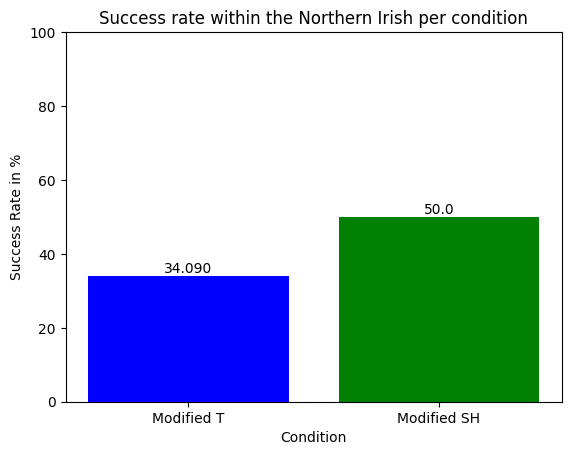

[56.126482213438734, 45.059288537549406]


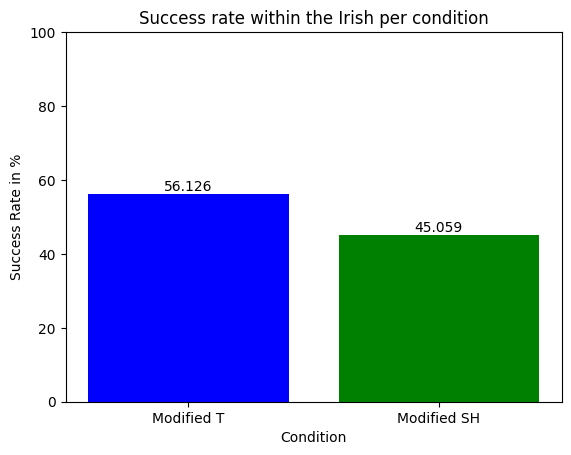

[56.126482213438734, 34.09090909090909, 45.059288537549406, 50.0]


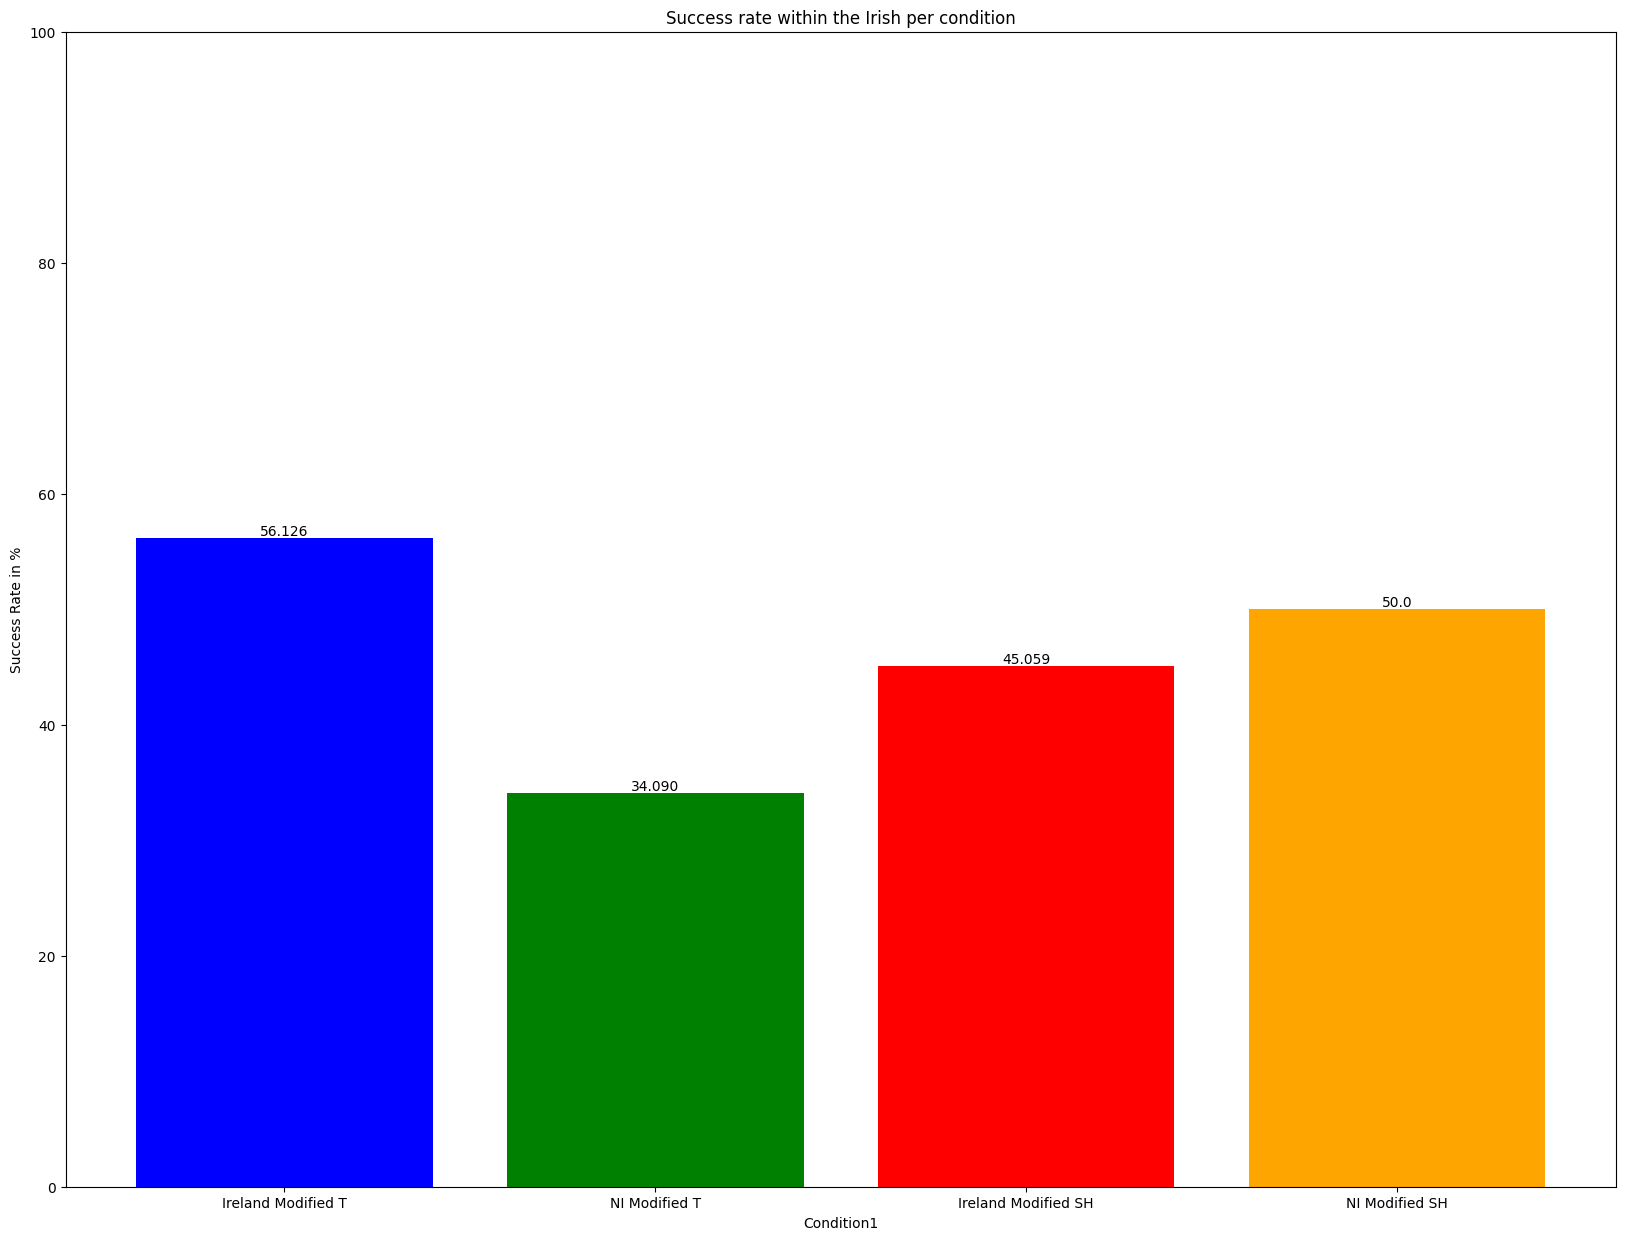


Calculating success rate for Participant

Success rate for 3193 is 63.64%
Success rate for 9212 is 63.64%
Success rate for 66543 is 45.45%
Success rate for 97863 is 72.73%
Success rate for 144849 is 72.73%
Success rate for 256908 is 63.64%
Success rate for 290430 is 18.18%
Success rate for 316470 is 54.55%
Success rate for 646029 is 54.55%
Success rate for 829249 is 36.36%
Success rate for 834521 is 63.64%
Success rate for 864646 is 63.64%
Success rate for 867341 is 45.45%
Success rate for 879868 is 63.64%
Success rate for 963806 is 81.82%
Success rate for Cliodhna is 72.73%
Success rate for Colin is 27.27%
Success rate for Conor is 27.27%
Success rate for Saoirse is 63.64%
Success rate for Adrien is 18.18%
Success rate for Ali is 27.27%
Success rate for Bertia is 63.64%
Success rate for Liam is 72.73%
Success rate for Maurice is 27.27%
Success rate for Pat is 81.82%
Success rate for Paul is 45.45%
Success rate for William is 36.36%

Calculating success rate for Participant

Success r

<ipython-input-32-96dbc48e6abe>:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['SuccessRate' + column] = None
<ipython-input-32-96dbc48e6abe>:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['SuccessRate' + column] = None


In [ ]:
# @title Ireland VS NI

#-------Per CONDITION
# Categorise 'Country' into ('Ireland', 'Northern Ireland')
filtered_df_odd_mod_t = df_mod_T.loc[df_mod_T['Country'].isin(['Ireland', 'Northern Ireland'])]
filtered_df_odd_mod_sh = df_mod_SH.loc[df_mod_SH['Country'].isin(['Ireland', 'Northern Ireland'])]

# Calculate success rate for each condition in NI
success_ModifiedT_NI = (100 * filtered_df_odd_mod_t[(filtered_df_odd_mod_t['Success'] == 1) & (filtered_df_odd_mod_t['Country'] == 'Northern Ireland')].shape[0]
                        / filtered_df_odd_mod_t[filtered_df_odd_mod_t['Country'] == 'Northern Ireland'].shape[0])

success_ModifiedSH_NI = (100 * filtered_df_odd_mod_sh[(filtered_df_odd_mod_sh['Success'] == 1) & (filtered_df_odd_mod_sh['Country'] == 'Northern Ireland')].shape[0]
                         / filtered_df_odd_mod_sh[filtered_df_odd_mod_sh['Country'] == 'Northern Ireland'].shape[0])

headers = ['Modified T','Modified SH']
datas = [success_ModifiedT_NI, success_ModifiedSH_NI]
print(datas)
plot_2d_array(headers, datas, 'Condition', 'Success Rate in %', 'Success rate within the Northern Irish per condition', colours=plot_colours80s)

# Calculate success rate for each condition in Ireland
success_ModifiedT = (100 * filtered_df_odd_mod_t[(filtered_df_odd_mod_t['Success'] == 1) & (filtered_df_odd_mod_t['Country'] == 'Ireland')].shape[0]
                     / filtered_df_odd_mod_t[filtered_df_odd_mod_t['Country'] == 'Ireland'].shape[0])
success_ModifiedSH = (100 * filtered_df_odd_mod_sh[(filtered_df_odd_mod_sh['Success'] == 1) & (filtered_df_odd_mod_sh['Country'] == 'Ireland')].shape[0]
                      / filtered_df_odd_mod_sh[filtered_df_odd_mod_sh['Country'] == 'Ireland'].shape[0])

headers = ['Modified T','Modified SH']
datas = [success_ModifiedT, success_ModifiedSH]
print(datas)
plot_2d_array(headers, datas, 'Condition', 'Success Rate in %', 'Success rate within the Irish per condition', colours=plot_colours80s)
headers = ['Ireland Modified T', 'NI Modified T', 'Ireland Modified SH', 'NI Modified SH']
datas = [success_ModifiedT, success_ModifiedT_NI, success_ModifiedSH, success_ModifiedSH_NI]
print(datas)
plot_2d_array(headers, datas, 'Condition1', 'Success Rate in %', 'Success rate within the Irish per condition', colours=plot_colours80s, fig_size=(20, 15))

#----create new column successrate in this data frame
filtered_df_odd_mod_t = calculate_success_rate_by(filtered_df_odd_mod_t, 'Participant')
filtered_df_odd_mod_sh = calculate_success_rate_by(filtered_df_odd_mod_sh, 'Participant')

#----success rate of ireland for mod t vs success rate of NI for mod T
print('ModifiedT')
val1 = filtered_df_odd_mod_t[(filtered_df_odd_mod_t['Country'] == 'Ireland')]['SuccessRateParticipant']
val2 = filtered_df_odd_mod_t[(filtered_df_odd_mod_t['Country'] == 'Northern Ireland')]['SuccessRateParticipant']
do_ttest(val1, val2)

#----success rate of ireland for mod sh vs success rate of NI for mod sh
print('Modified SH')
val1 = filtered_df_odd_mod_sh[(filtered_df_odd_mod_sh['Country'] == 'Ireland')]['SuccessRateParticipant']
val2 = filtered_df_odd_mod_sh[(filtered_df_odd_mod_sh['Country'] == 'Northern Ireland')]['SuccessRateParticipant']
do_ttest(val1, val2)


#chi2 NI
filter_NI = df_odd.loc[df_odd['Country'] == 'Northern Ireland']
print(filter_NI)

do_chi_square_test(filter_NI['Success'], filter_NI['Condition1'])

[33.1002331002331, 55.24475524475525]


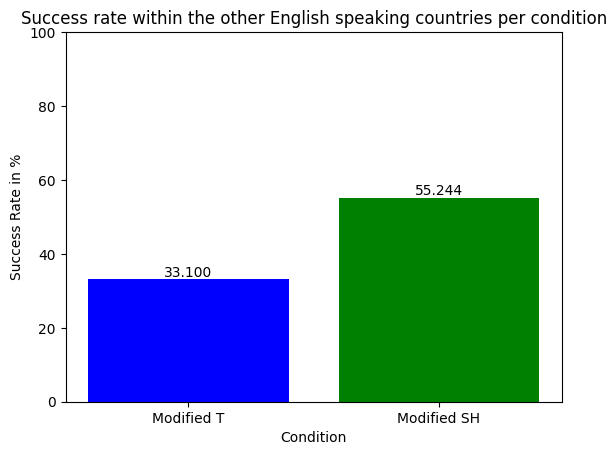

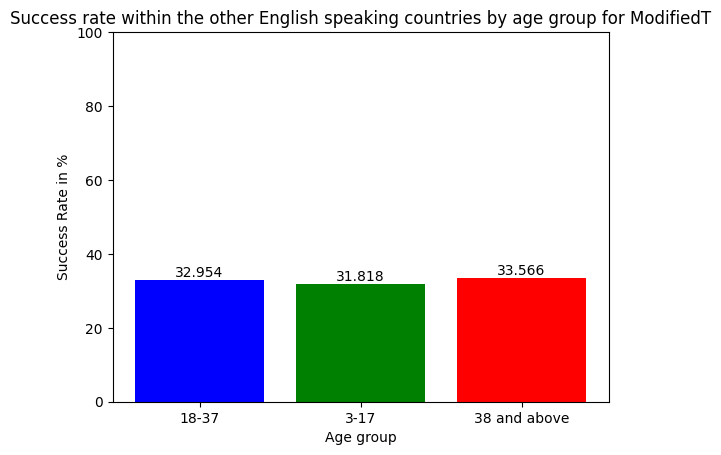

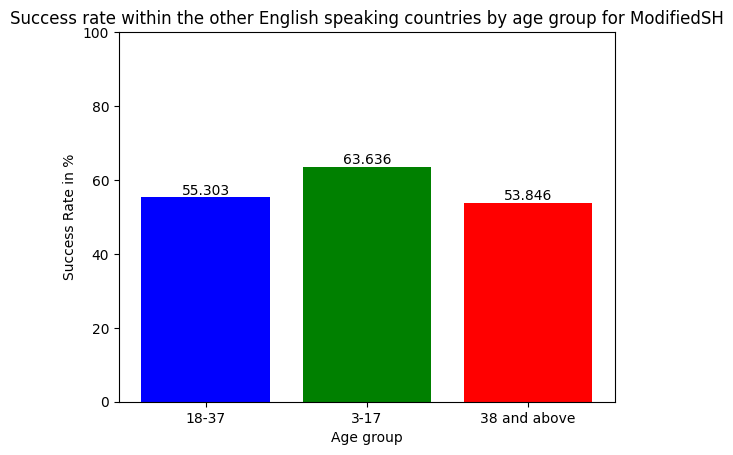

age1 vs age2 vs age3
Chi-square statistic: 0.2510796459202059
P-value: 0.8820206390549203
Degrees of freedom: 2
Expected frequencies table:
[[ 24.56410256 294.76923077 159.66666667]
 [ 19.43589744 233.23076923 126.33333333]]
The result is not significant. There is no significant association between the variables.


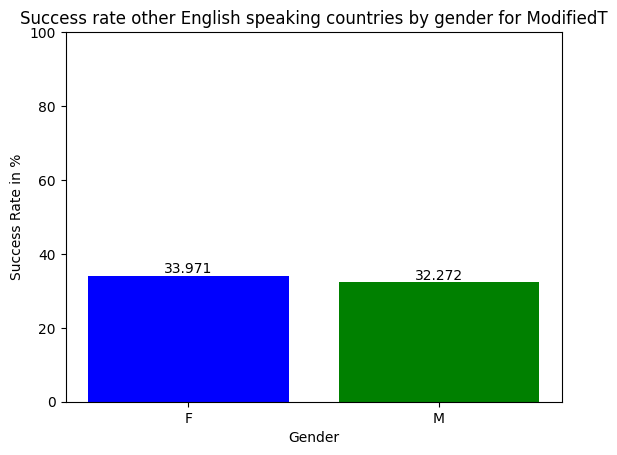

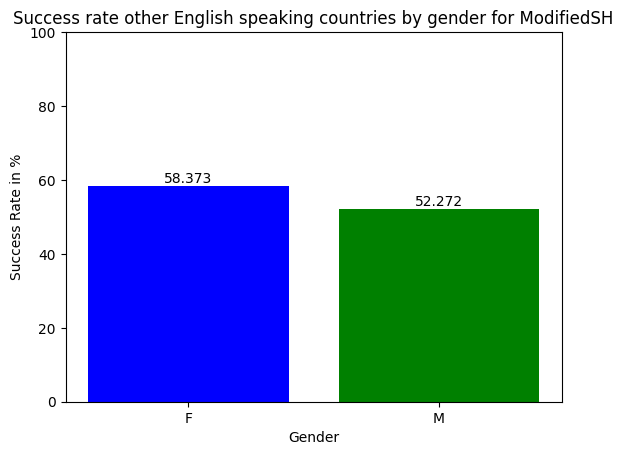

F vs M listeners
---- Performing Ttest ----
Fail to reject the null hypothesis. There is not enough evidence to conclude a significant difference.
t-statistic: 0.40713565669863777
p-value: 0.6839591939464624

Chi-square statistic: 1.1683956342760344
P-value: 0.2797311398288006
Degrees of freedom: 1
Expected frequencies table:
[[233.35897436 245.64102564]
 [184.64102564 194.35897436]]
The result is not significant. There is no significant association between the variables.


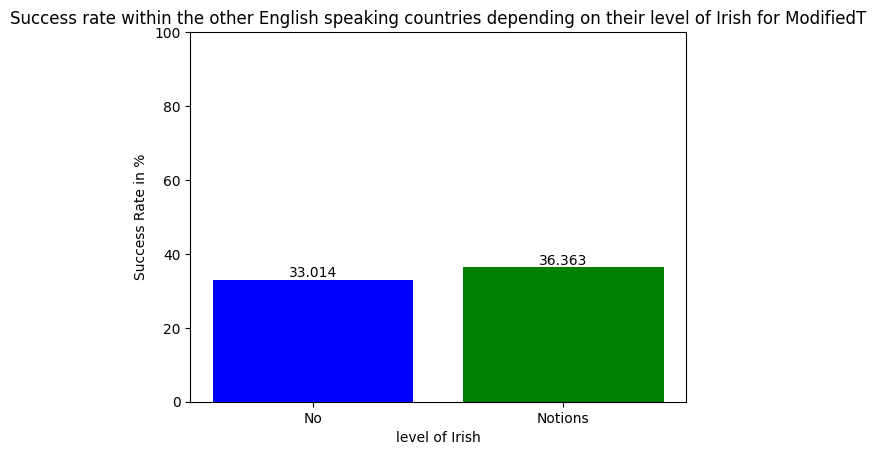

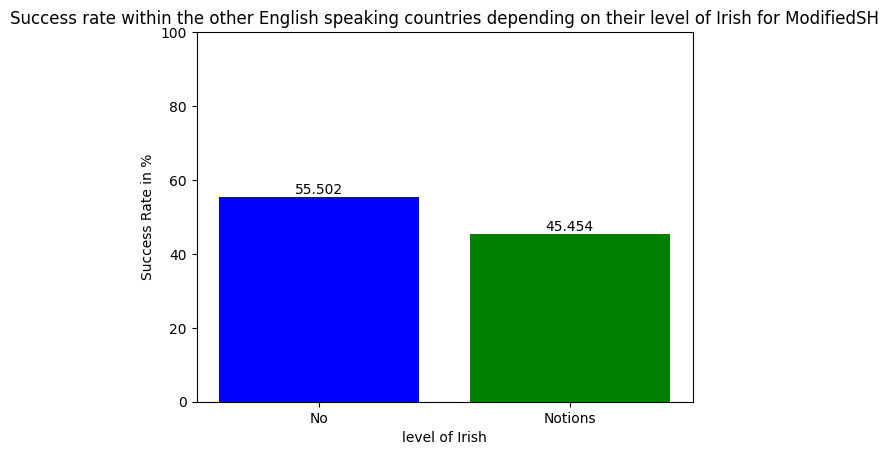

level of Irish yes vs no vs notions
---- Performing Ttest ----
Reject the null hypothesis. There is a significant difference between the means.
t-statistic: 24.360525328632775
p-value: 8.400400424492557e-113

Chi-square statistic: 0.00898600838030205
P-value: 0.9244780088500617
Degrees of freedom: 1
Expected frequencies table:
[[466.71794872  12.28205128]
 [369.28205128   9.71794872]]
The result is not significant. There is no significant association between the variables.


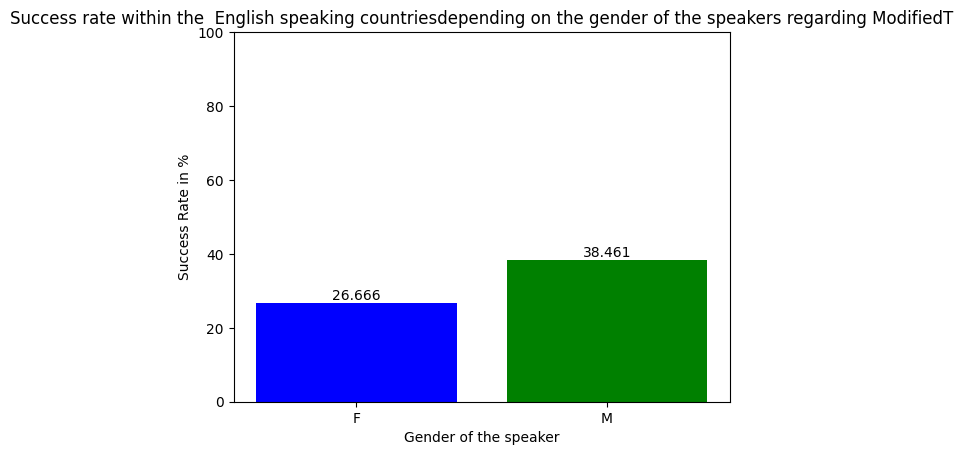

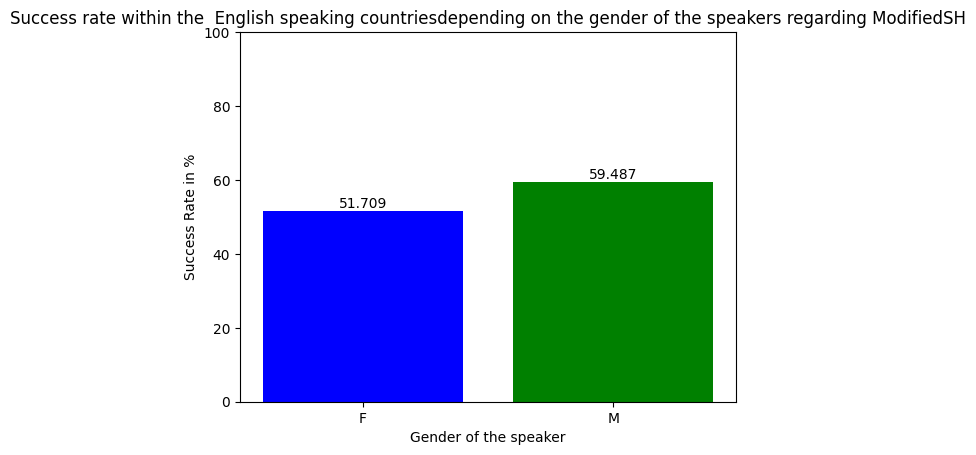

F vs M speakers
---- Performing Ttest ----
Fail to reject the null hypothesis. There is not enough evidence to conclude a significant difference.
t-statistic: -1.921326682421923
p-value: 0.054856211486531845

Chi-square statistic: 4.83963402206664
P-value: 0.02781279700498836
Degrees of freedom: 1
Expected frequencies table:
[[239.5 239.5]
 [189.5 189.5]]
The result is significant. There is a significant association between the variables.


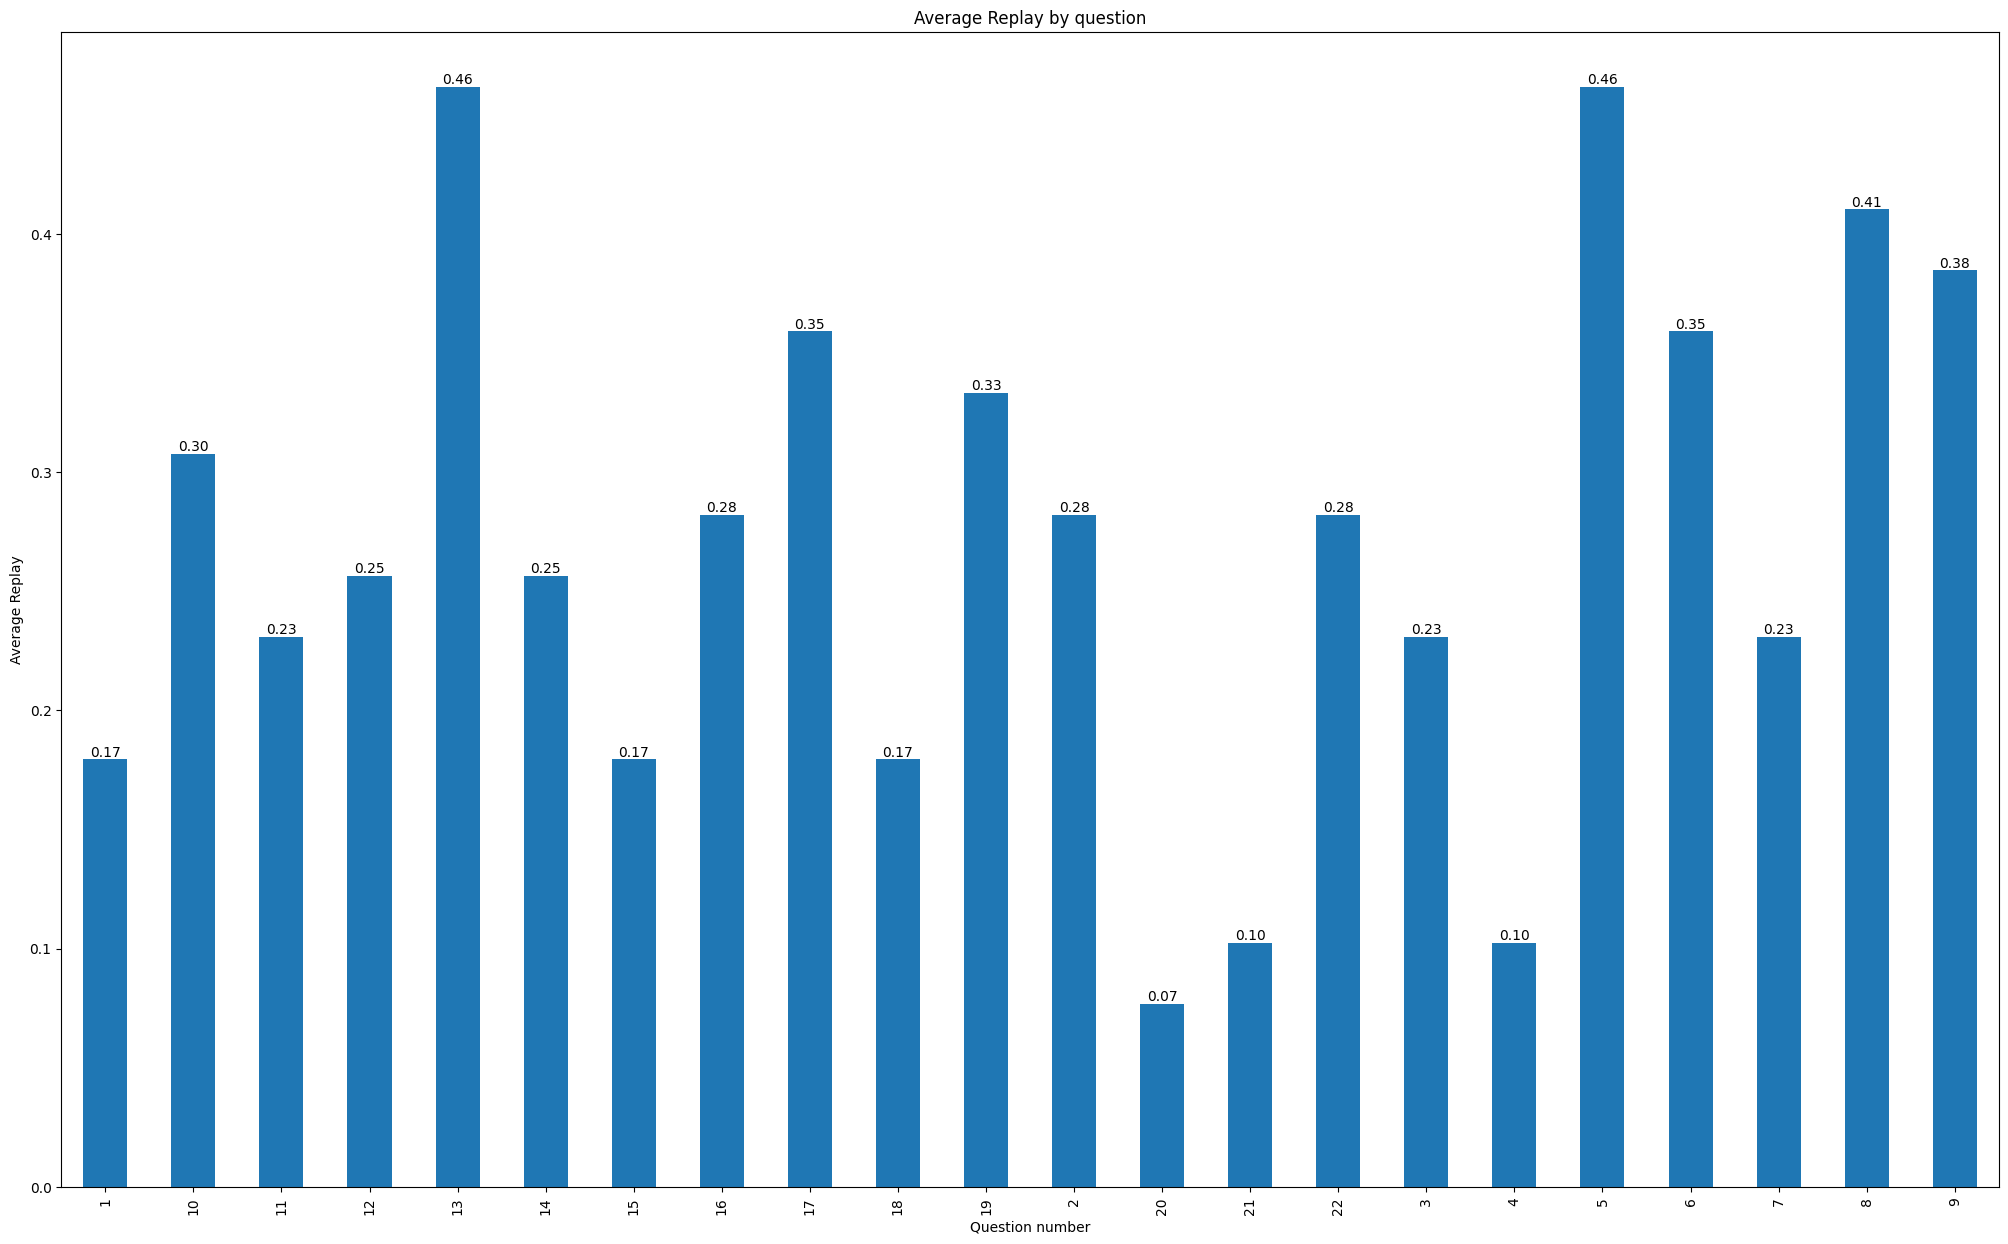

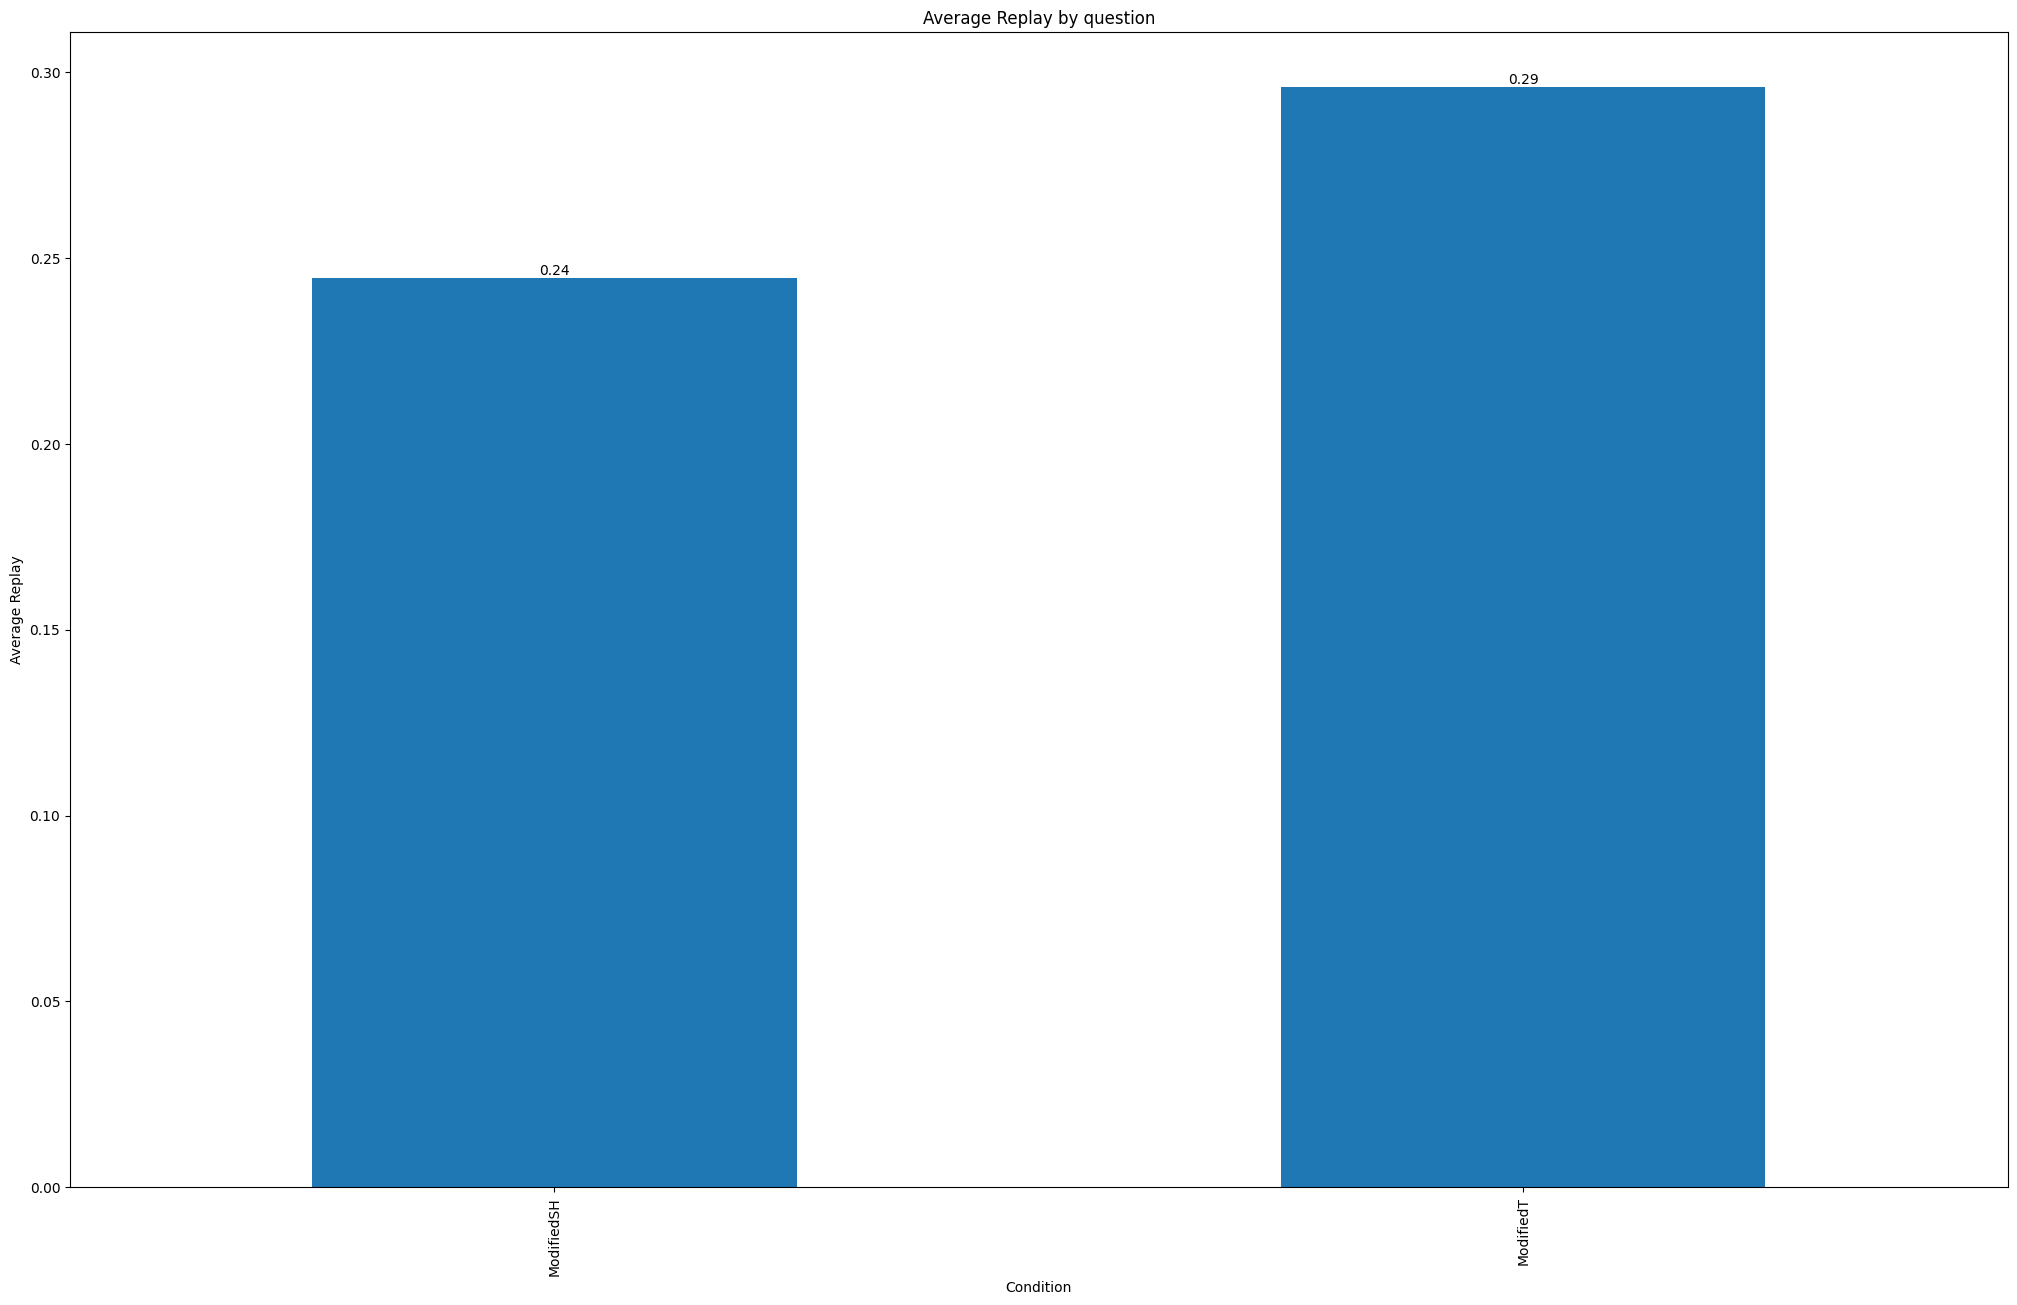

Modified SH vs Modified T
---- Performing Ttest ----
Reject the null hypothesis. There is a significant difference between the means.
t-statistic: -6.691843838375052
p-value: 3.980557287713724e-11

If it's close to -1, it indicates a strong negative correlation (as one variable increases, the other tends to decrease). If it's close to 0, it indicates no linear correlation between the variables.
Pearson correlation coefficient between Success and Replay: -0.08006130231021562



In [ ]:
# @title Other English Speaking Countries

#-------Per CONDITION
# Categorize 'Country' into 'Other English Speaking Countries'
filtered_df_odd_mod_t = df_mod_T.loc[df_mod_T['Country'] != 'Ireland']
filtered_df_odd_mod_sh = df_mod_SH.loc[df_mod_SH['Country'] != 'Ireland']


# Calculate success rate for each condition in Other English Speaking Countries
success_ModifiedT = 100 * filtered_df_odd_mod_t[filtered_df_odd_mod_t['Success'] == 1].shape[0] / filtered_df_odd_mod_t.shape[0]
success_ModifiedSH = 100 * filtered_df_odd_mod_sh[filtered_df_odd_mod_sh['Success'] == 1].shape[0] / filtered_df_odd_mod_sh.shape[0]


headers = ['Modified T','Modified SH']
datas = [success_ModifiedT, success_ModifiedSH]

print(datas)

plot_2d_array(headers, datas, 'Condition', 'Success Rate in %', 'Success rate within the other English speaking countries per condition', colours=plot_colours80s)

#-------by AGE GROUP----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

filter_withoutIrish = df_odd.loc[df_odd['Country'] != 'Ireland']
for x in condition:
    df = filter_withoutIrish[filter_withoutIrish['Condition1'] == x]
    plot_success_rate_by_parameter(df, x, 'Age_group', 'Age group', 'Success Rate in %',  'Success rate within the other English speaking countries by age group for ', colours=plot_colours80s)

print('age1 vs age2 vs age3')

# ---------------chi2 gender
do_chi_square_test(filter_withoutIrish['Success'], filter_withoutIrish['Age'])

#------by GENDER----------------------------------------------------------------------------------------------------------------------------------------------------------------------

for x in condition:
    df = filter_withoutIrish[filter_withoutIrish['Condition1'] == x]
    plot_success_rate_by_parameter(df, x, 'Gender', 'Gender', 'Success Rate in %',  'Success rate other English speaking countries by gender for ', colours=plot_colours80s)


print('F vs M listeners')
val1 = ((filter_withoutIrish['Success'] == 1) & (filter_withoutIrish['Gender'] == 'F'))
val2 = ((filter_withoutIrish['Success'] == 1) & (filter_withoutIrish['Gender'] == 'M'))
do_ttest(val1, val2)

# ---------------chi2 gender
do_chi_square_test(filter_withoutIrish['Success'], filter_withoutIrish['Gender'])

#------by LEVEL OF IRISH---------------------------------------------------------------------------------------------------------------------------------------------------------------------

for x in condition:
    df = filter_withoutIrish[filter_withoutIrish['Condition1'] == x]
    plot_success_rate_by_parameter(df, x, 'Irish', 'level of Irish', 'Success Rate in %',  'Success rate within the other English speaking countries depending on their level of Irish for ', colours=plot_colours80s)


print('level of Irish yes vs no vs notions')
val1 = ((filter_withoutIrish['Success'] == 1) & (filter_withoutIrish['Irish'] == 'No'))
val2 = ((filter_withoutIrish['Success'] == 1) & (filter_withoutIrish['Irish'] == 'Notions'))
do_ttest(val1, val2)

# ---------------chi2 gender
do_chi_square_test(filter_withoutIrish['Success'], filter_withoutIrish['Irish'])

#------by GENDER of the speaker-----------------------------------------------------------------------------------------------------------------------------------------------------------------

for x in condition:
    df = filter_withoutIrish[filter_withoutIrish['Condition1'] == x]
    plot_success_rate_by_parameter(df, x, 'Condition2', 'Gender of the speaker', 'Success Rate in %',  'Success rate within the  English speaking countriesdepending on the gender of the speakers regarding ', colours=plot_colours80s)

print('F vs M speakers')
val1 = ((filter_withoutIrish['Success'] == 1) & (filter_withoutIrish['Condition2'] == 'F'))
val2 = ((filter_withoutIrish['Success'] == 1) & (filter_withoutIrish['Condition2'] == 'M'))
do_ttest(val1, val2)

# ---------------chi2 gender
do_chi_square_test(filter_withoutIrish['Success'], filter_withoutIrish['Condition2'])

#------------Average reaction time in s By ItemNb---------------------------------------------------------------------------------------------------------------------------------------------

plot_bar_average_parameter(filter_withoutIrish, 'ItemNb', 'Question number', 'Average Replay', 'Average Replay by question', 'Replay')

#------------Average reaction time in s By condition

plot_bar_average_parameter(filter_withoutIrish, 'Condition1', 'Condition', 'Average Replay', 'Average Replay by question', 'Replay')

#---------TTEST on 'Modified SH vs Modified T'----------------------------------------------------------------------------------------------------------------------------------------------

print('Modified SH vs Modified T')
val1 = ((filtered_df_odd_mod_t['Success'] == 1))
val2 = ((filtered_df_odd_mod_sh['Success'] == 1))
do_ttest(val1, val2)

#-------------------------------------------------------------------------- Calculate Pearson correlation coefficient

correlation = filter_withoutIrish['Success'].corr(filter_withoutIrish['Replay'])

print("If it's close to -1, it indicates a strong negative correlation (as one variable increases, the other tends to decrease). If it's close to 0, it indicates no linear correlation between the variables.")

print("Pearson correlation coefficient between Success and Replay:", correlation)

print("")



/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


                              Mixed Linear Model Regression Results
Model:                           MixedLM               Dependent Variable:               Success  
No. Observations:                1364                  Method:                           REML     
No. Groups:                      61                    Scale:                            0.2455   
Min. group size:                 22                    Log-Likelihood:                   -998.2652
Max. group size:                 44                    Converged:                        Yes      
Mean group size:                 22.4                                                             
--------------------------------------------------------------------------------------------------
                                                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------------------------
Intercept                                

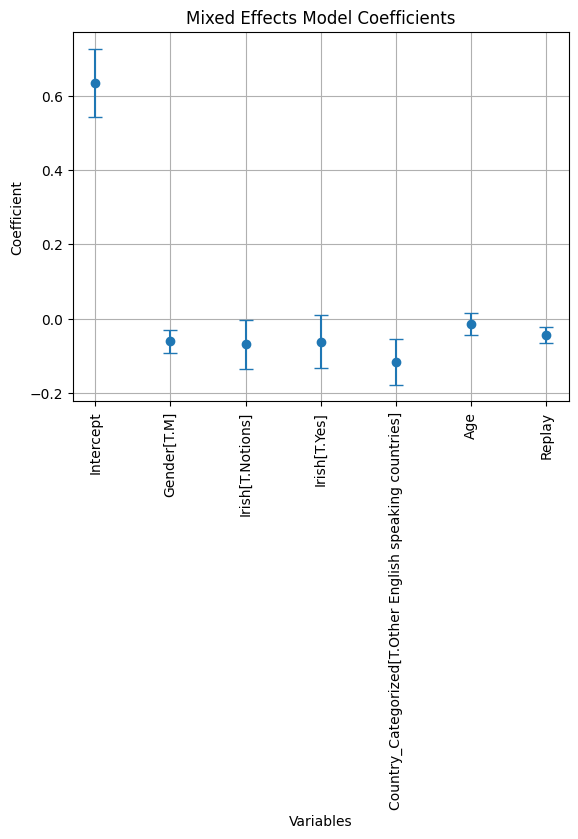

In [ ]:
# @title MIXED EFFECTS MODEL all participants


# Fit the mixed effects model
model = smf.mixedlm("Success ~ Gender + Age + Irish + Country_Categorized + Replay", df_odd, groups=df_odd["Participant"])
result = model.fit()

# Print the summary of the model
print(result.summary())

# Extract the coefficients and standard errors
coefs = result.fe_params
stderr = result.bse_fe

# Plot the coefficients with error bars
plt.errorbar(coefs.index, coefs.values, yerr=stderr, fmt='o', capsize=5)
plt.xlabel('Variables')
plt.ylabel('Coefficient')
plt.title('Mixed Effects Model Coefficients')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()



/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  Success  
No. Observations:   506      Method:              REML     
No. Groups:         23       Scale:               0.2493   
Min. group size:    22       Log-Likelihood:      -376.8977
Max. group size:    22       Converged:           Yes      
Mean group size:    22.0                                   
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         0.615    0.135  4.551 0.000  0.350  0.880
Gender[T.M]      -0.145    0.064 -2.257 0.024 -0.270 -0.019
Irish[T.Notions] -0.118    0.081 -1.460 0.144 -0.278  0.041
Irish[T.Yes]     -0.116    0.082 -1.414 0.157 -0.277  0.045
Age               0.027    0.062  0.431 0.667 -0.095  0.149
Replay           -0.004    0.033 -0.109 0.913 -0.068  0.061
Group Var         0.000    0.009                   

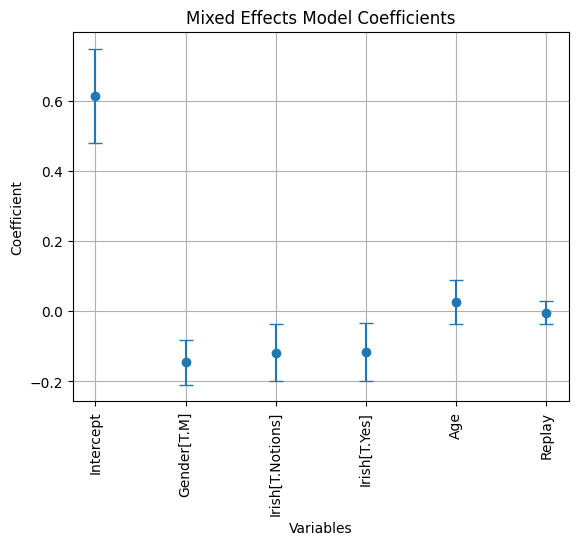

In [ ]:
# @title MIXED EFFECTS MODEL within the Irish


df_odd.head()

# Fit the mixed effects model
model = smf.mixedlm("Success ~ Gender + Age + Irish + Replay", filter_withinIrish, groups=filter_withinIrish["Participant"])
result = model.fit()

# Print the summary of the model
print(result.summary())

# Extract the coefficients and standard errors
coefs = result.fe_params
stderr = result.bse_fe

# Plot the coefficients with error bars
plt.errorbar(coefs.index, coefs.values, yerr=stderr, fmt='o', capsize=5)
plt.xlabel('Variables')
plt.ylabel('Coefficient')
plt.title('Mixed Effects Model Coefficients')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  Success  
No. Observations:   858      Method:              REML     
No. Groups:         38       Scale:               0.2448   
Min. group size:    22       Log-Likelihood:      -625.2824
Max. group size:    44       Converged:           Yes      
Mean group size:    22.6                                   
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         0.505    0.078  6.479 0.000  0.352  0.657
Gender[T.M]      -0.044    0.037 -1.188 0.235 -0.116  0.028
Irish[T.Notions] -0.014    0.115 -0.122 0.903 -0.240  0.212
Age              -0.009    0.033 -0.279 0.780 -0.074  0.055
Replay           -0.071    0.029 -2.460 0.014 -0.128 -0.015
Group Var         0.001    0.007                           



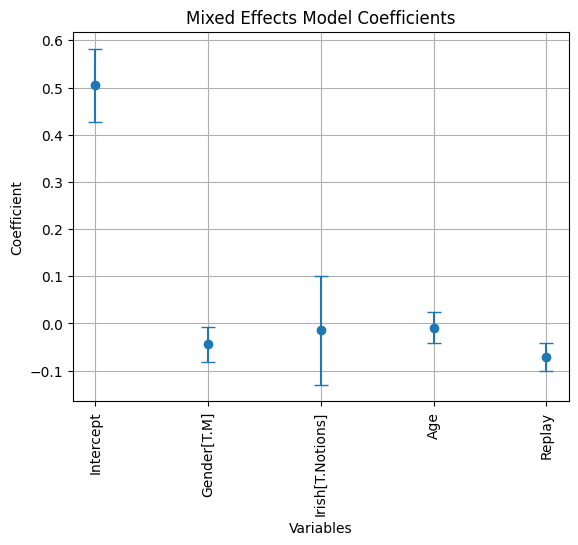

In [ ]:
# @title MIXED EFFECTS MODEL with other countries


df_odd.head()

# Fit the mixed effects model
model = smf.mixedlm("Success ~ Gender + Age + Irish + Replay", filter_withoutIrish, groups=filter_withoutIrish["Participant"])
result = model.fit()

# Print the summary of the model
print(result.summary())

# Extract the coefficients and standard errors
coefs = result.fe_params
stderr = result.bse_fe

# Plot the coefficients with error bars
plt.errorbar(coefs.index, coefs.values, yerr=stderr, fmt='o', capsize=5)
plt.xlabel('Variables')
plt.ylabel('Coefficient')
plt.title('Mixed Effects Model Coefficients')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [ ]:
# @title Replay Count all participants

def plot_replay_by_country(df,x):
  #group it by country
    grouped = df.groupby('Country_Categorized')

    # Calculate success rate
    replay_rate = grouped['Replay'].sum()
    print(replay_rate)

    # Plot histogram (the figure at the bottom)
    plt.figure(figsize=(25, 15))
    plt.bar(replay_rate.index, replay_rate.values)
    plt.xlabel('Countries',size=20)
    plt.ylabel('Number of replays',size=20)
    plt.title('Number of replays by Country for '+x,size=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

Gender
F        70
M        57
Other     9
Name: Replay, dtype: int64


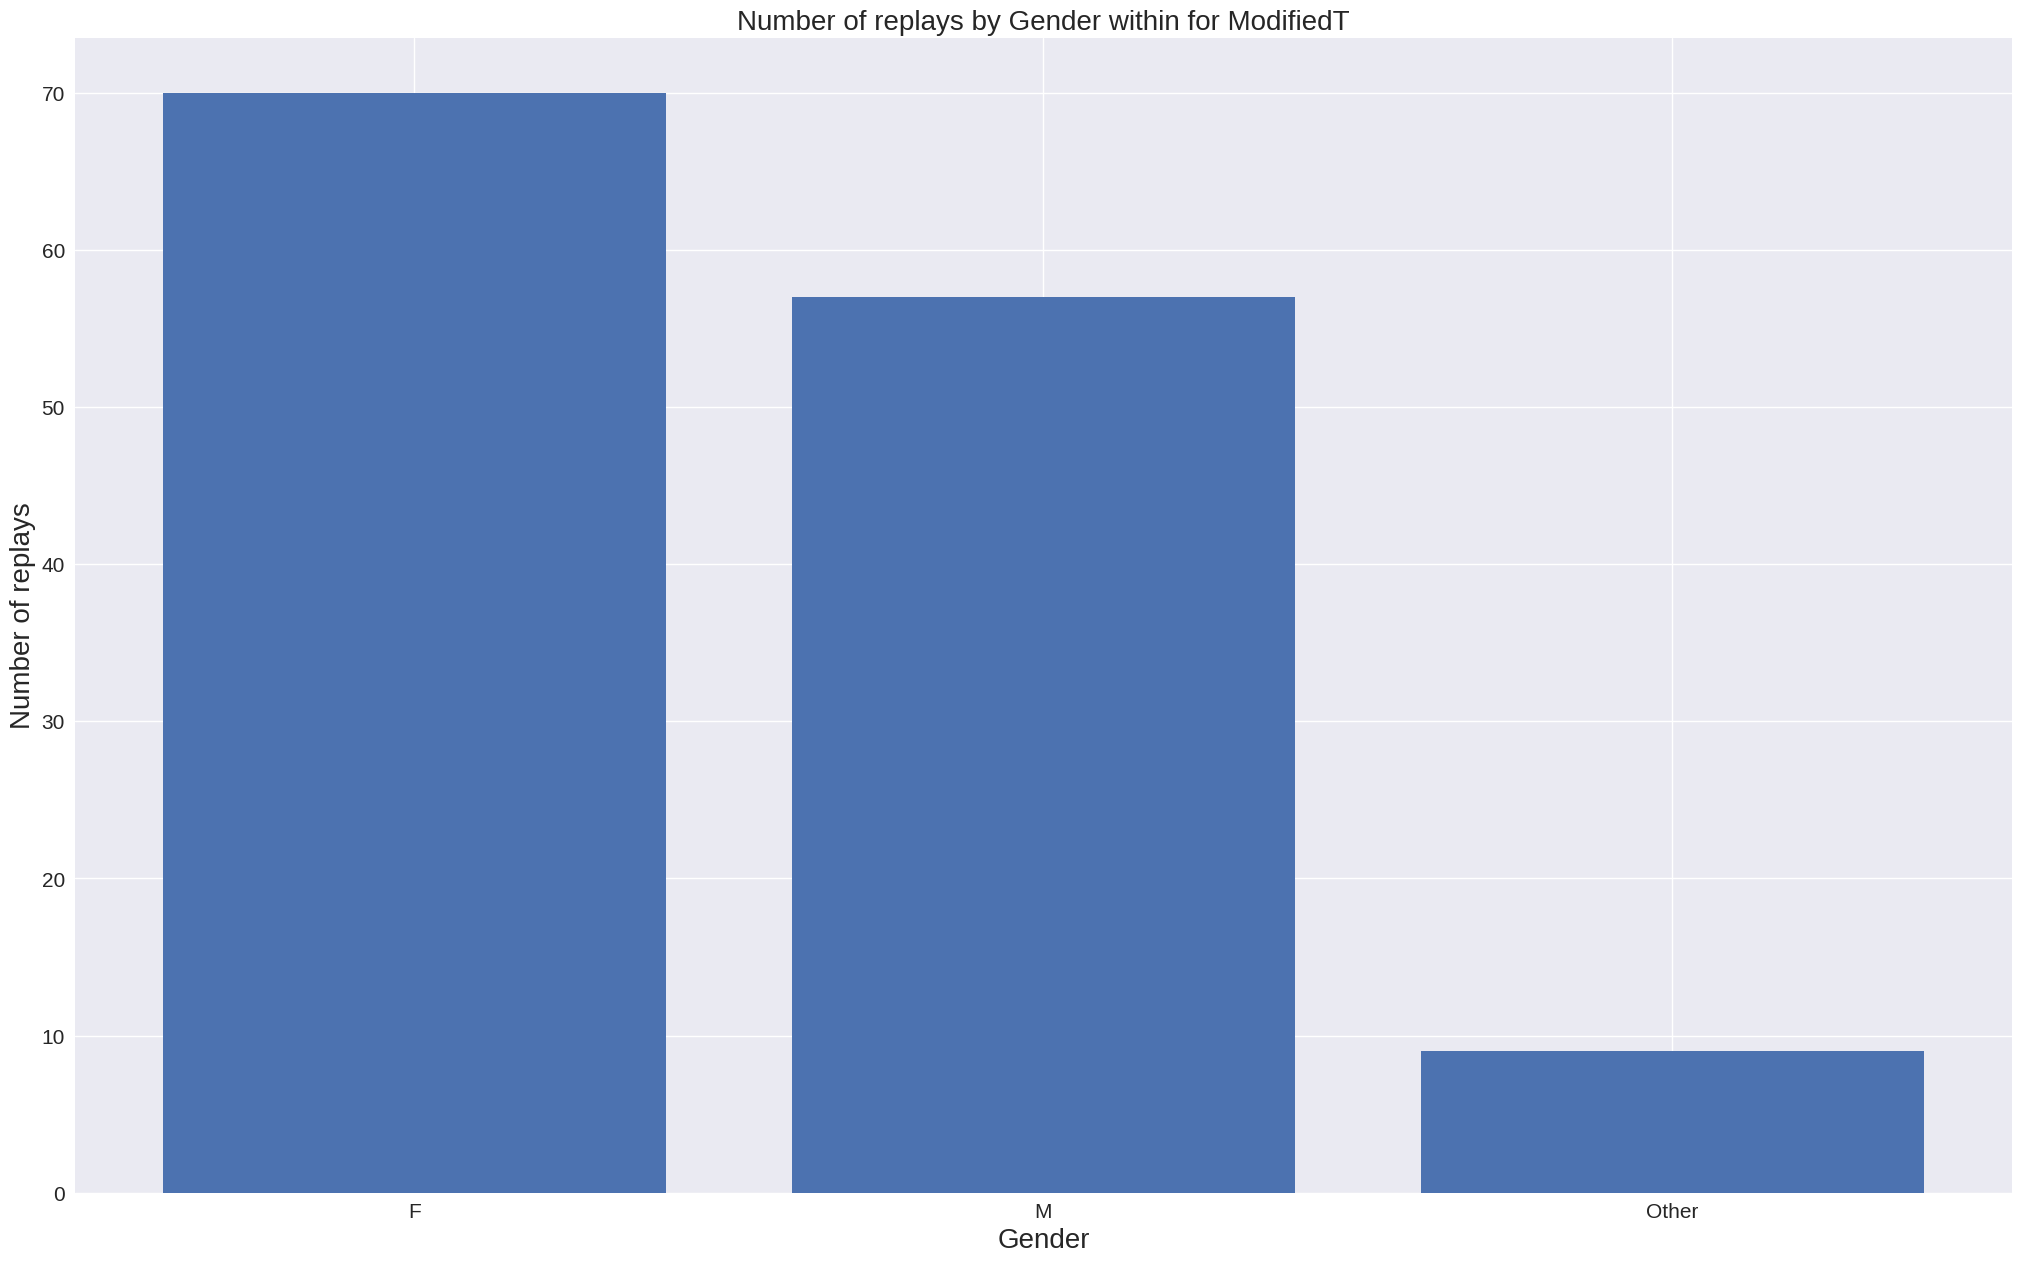

Gender
F        64
M        42
Other     4
Name: Replay, dtype: int64


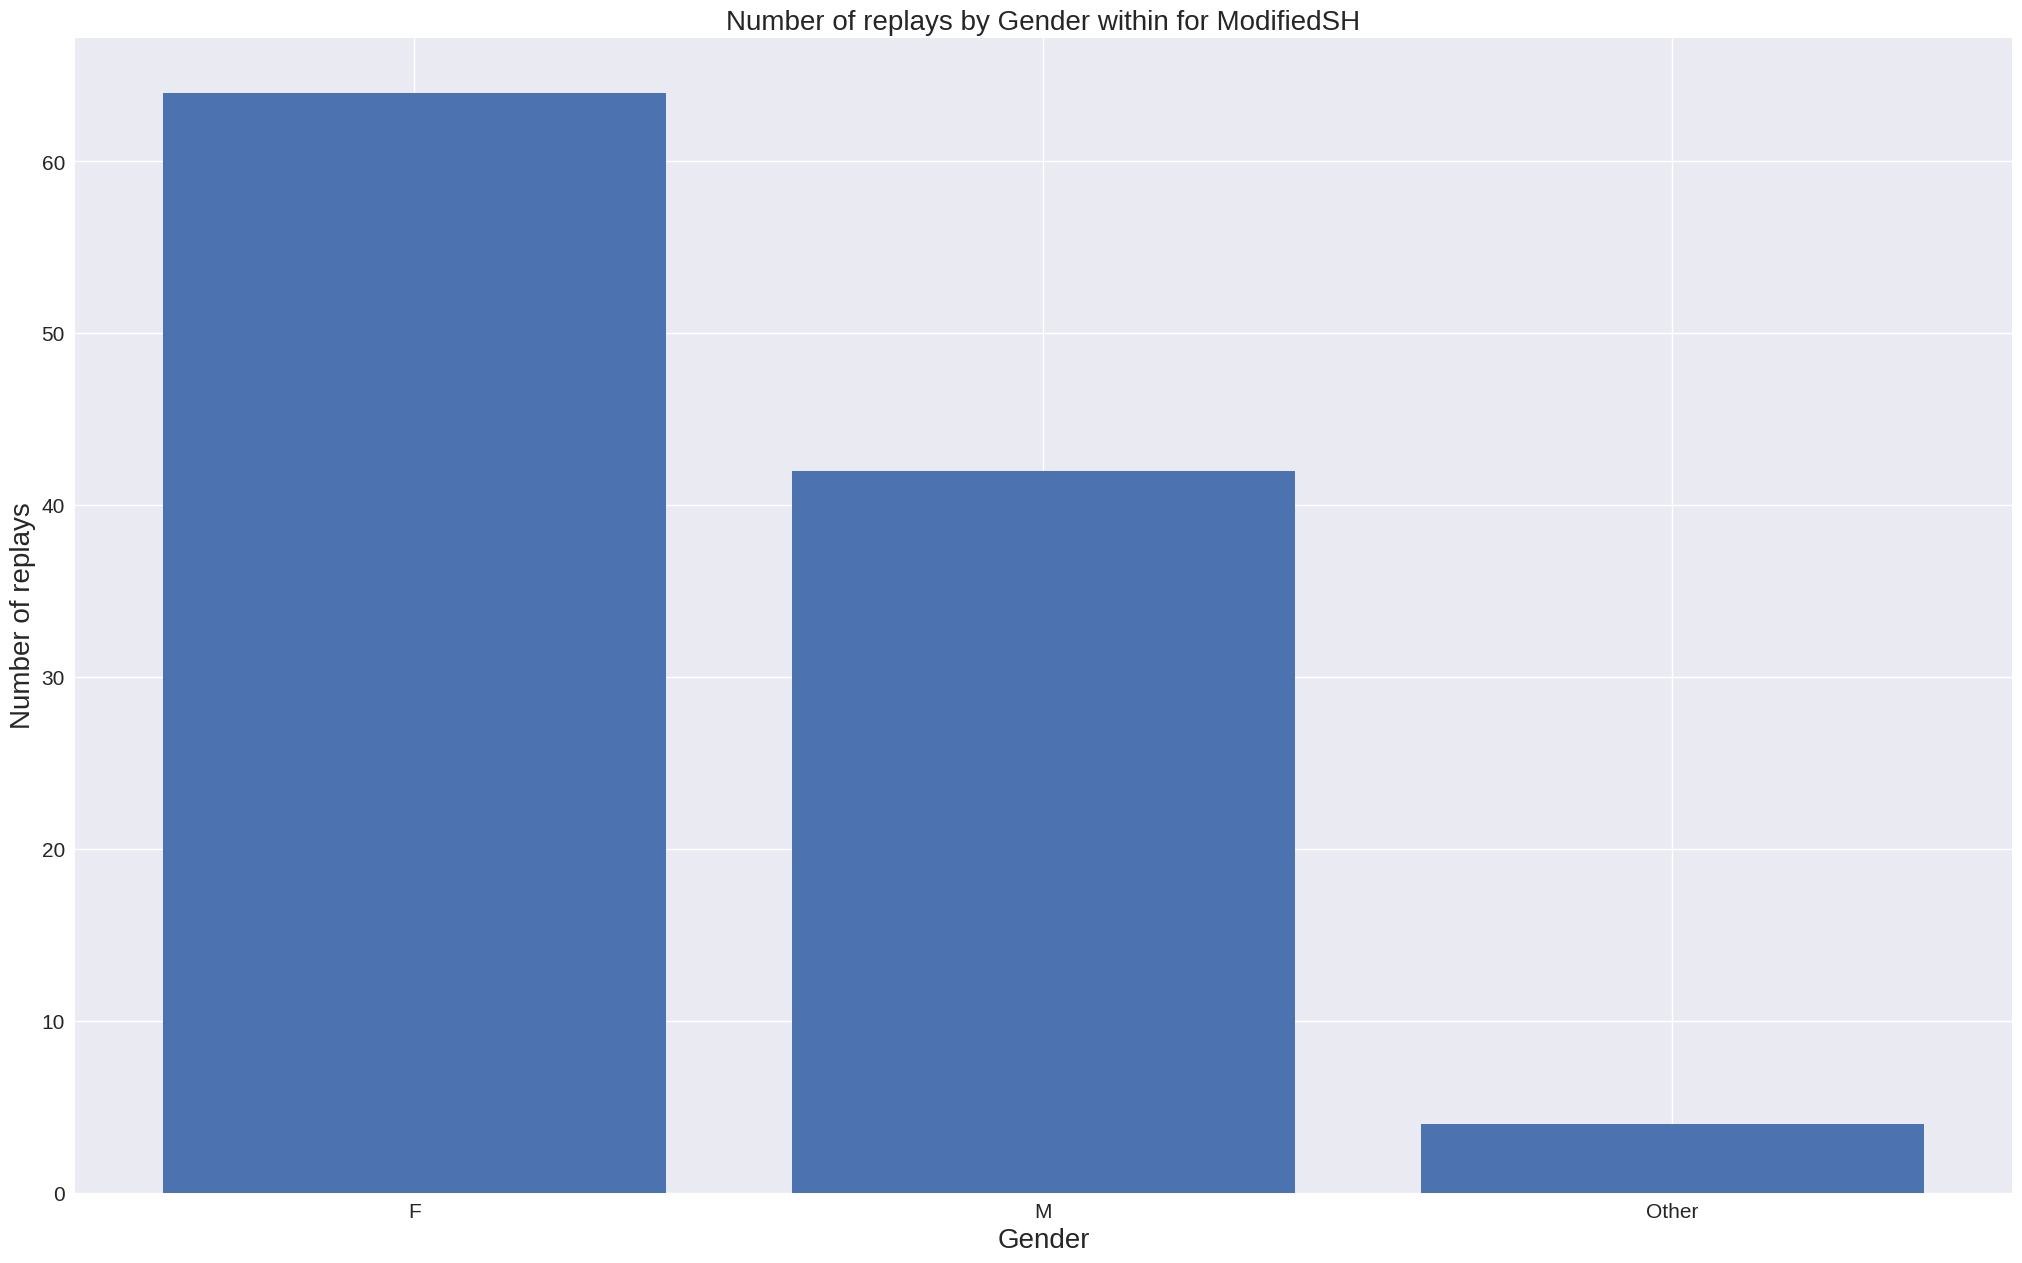

Age_group
18-37           108
3-17              0
38 and above     28
Name: Replay, dtype: int64


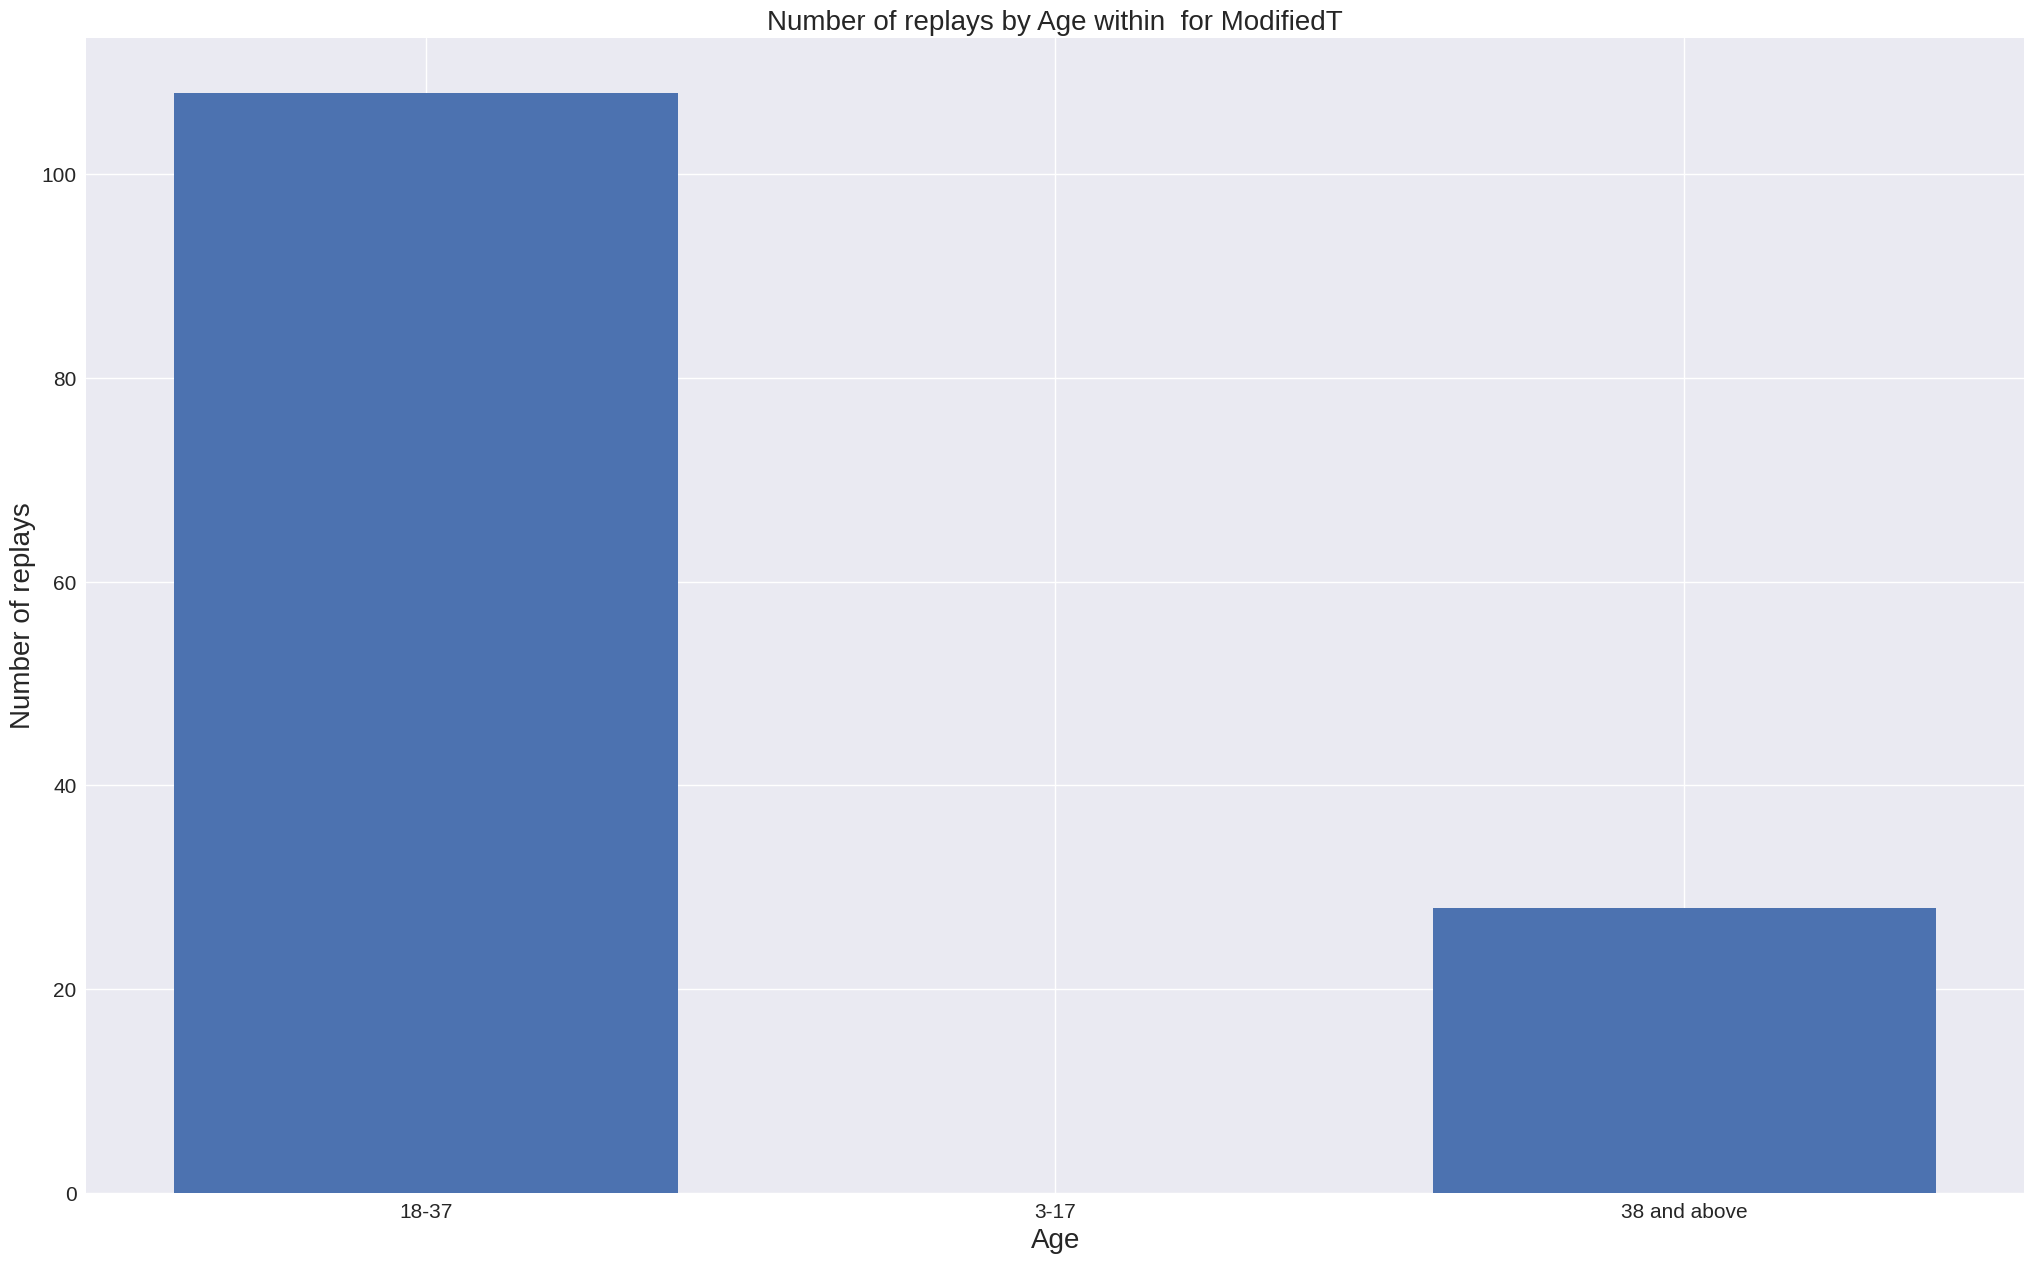

Age_group
18-37           83
3-17             0
38 and above    27
Name: Replay, dtype: int64


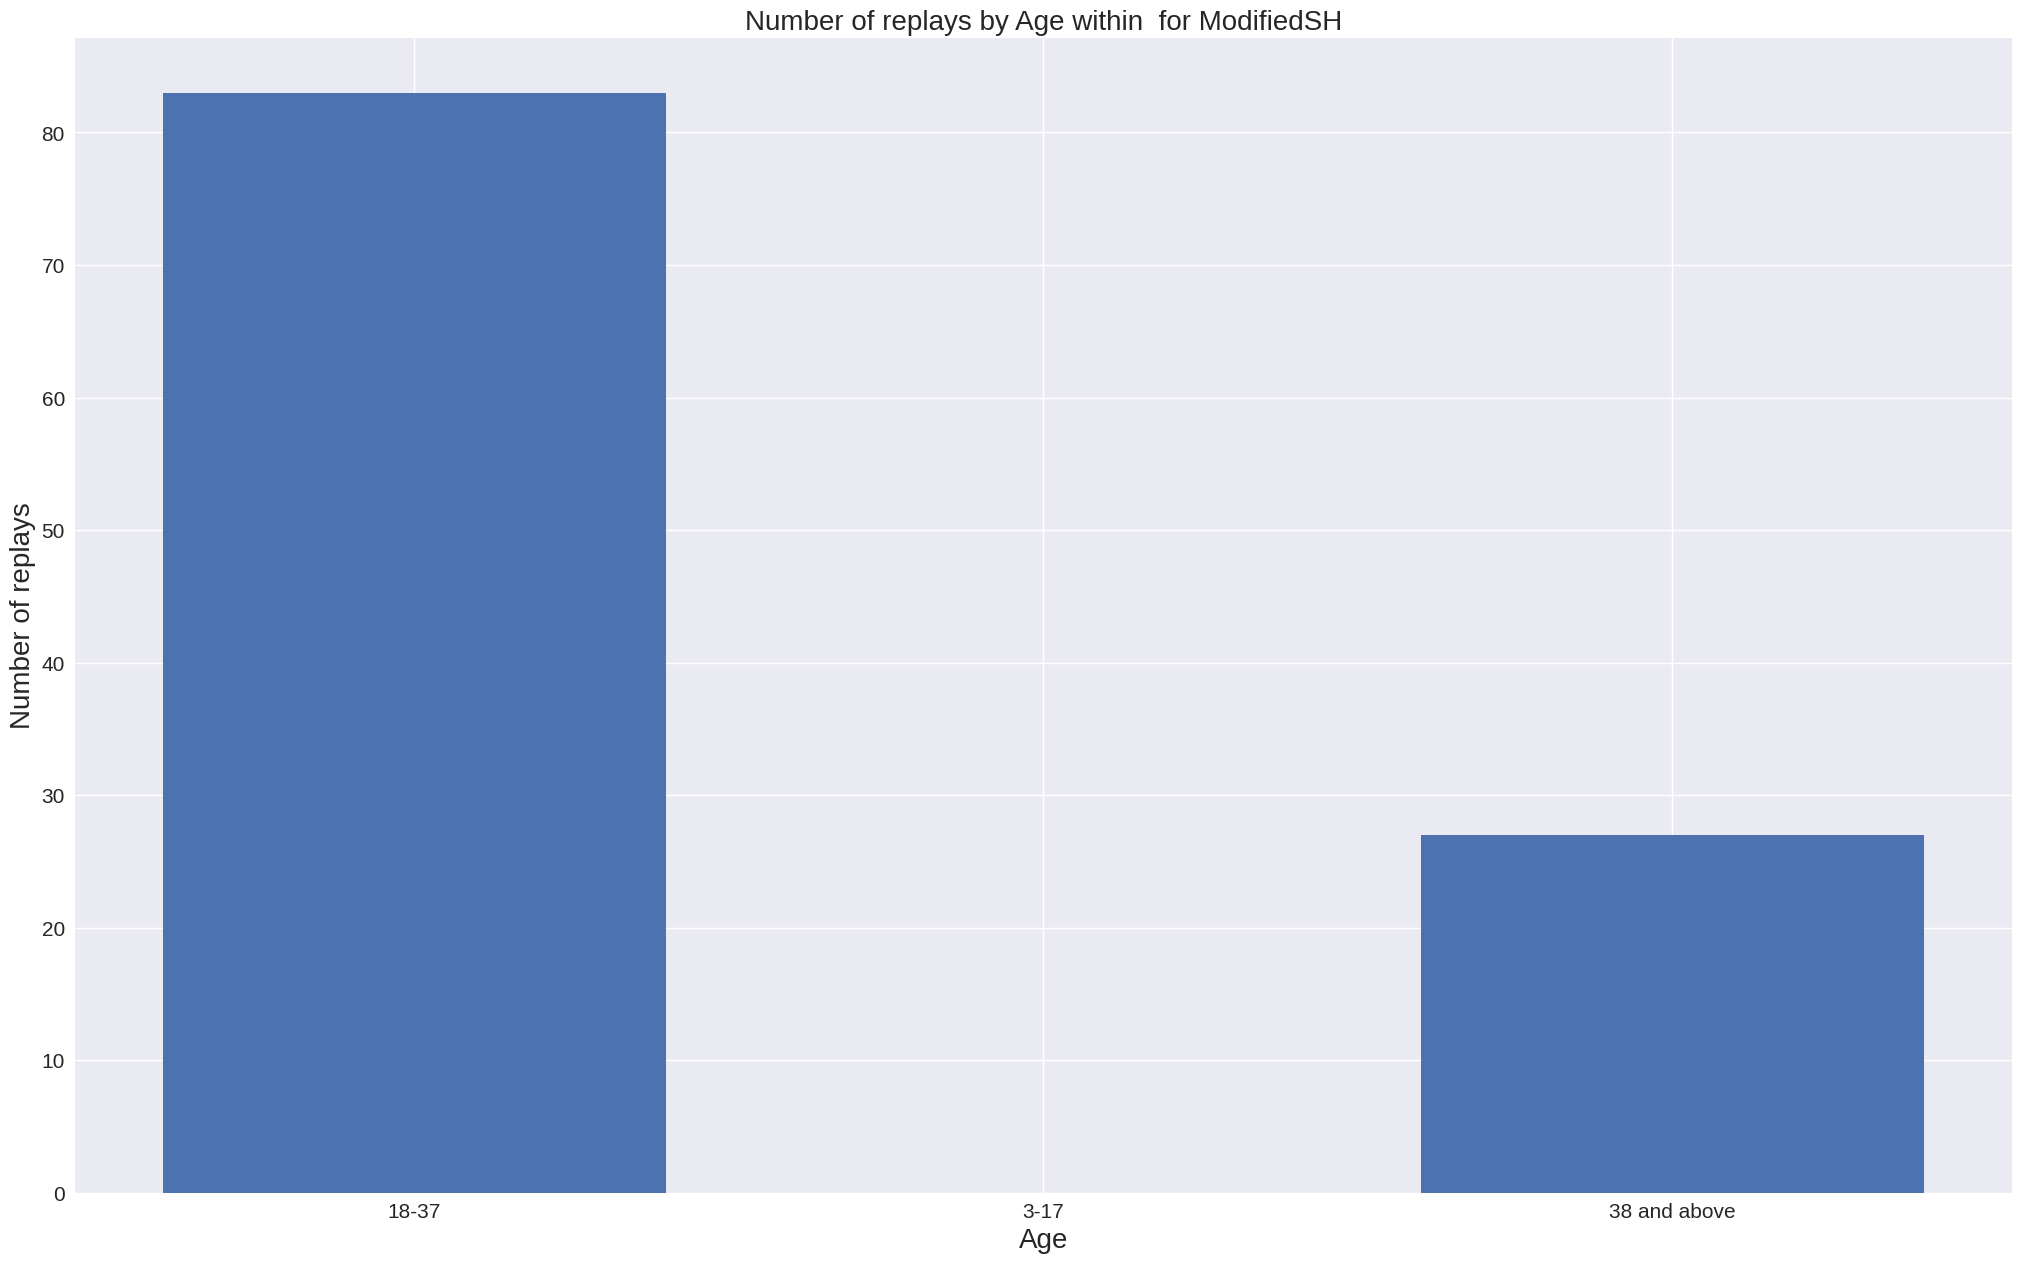

Irish
No         134
Notions      2
Name: Replay, dtype: int64


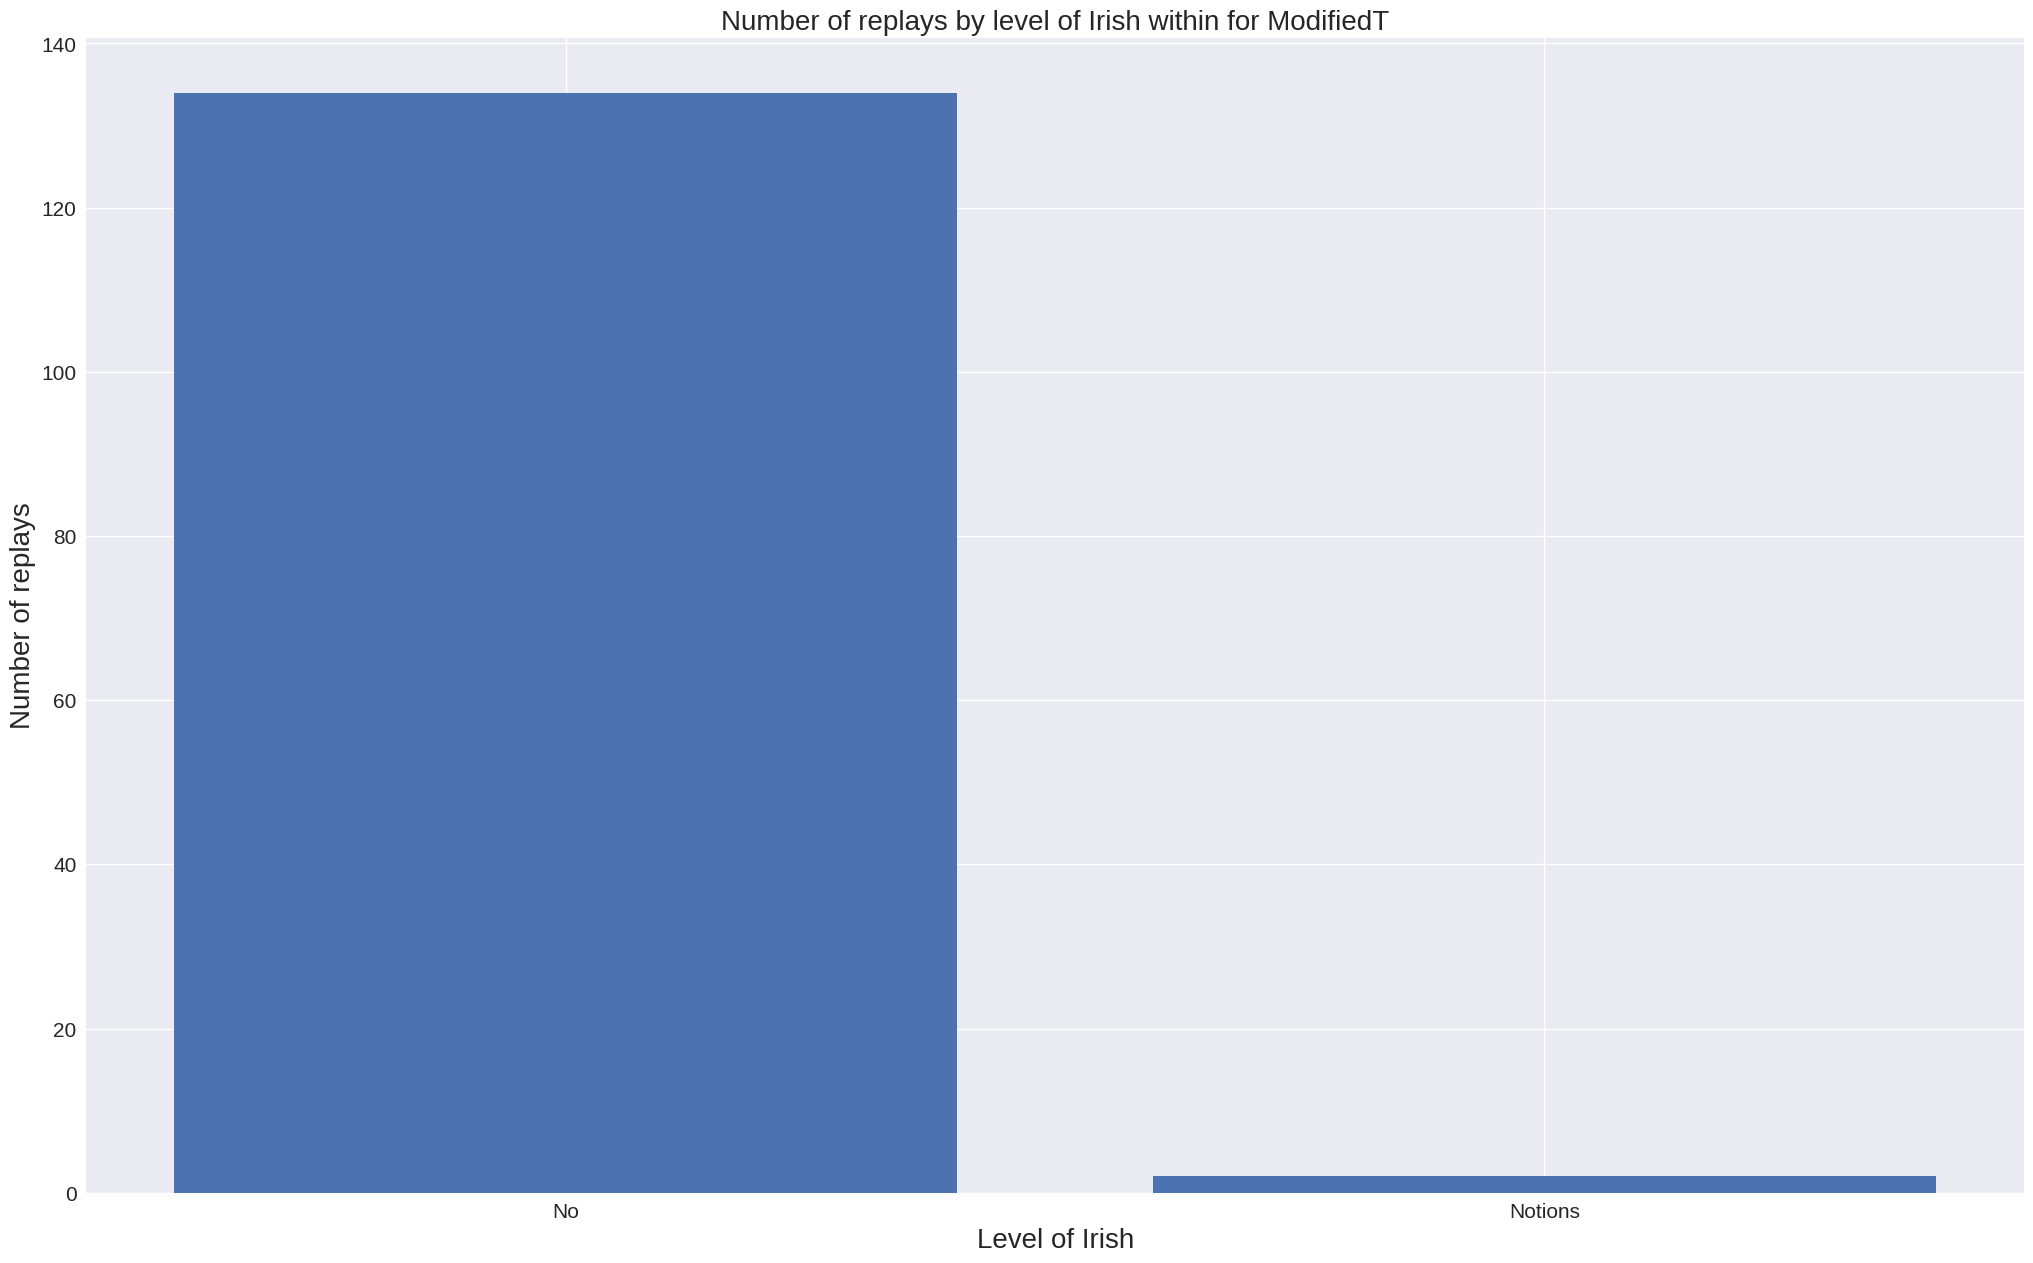

Irish
No         106
Notions      4
Name: Replay, dtype: int64


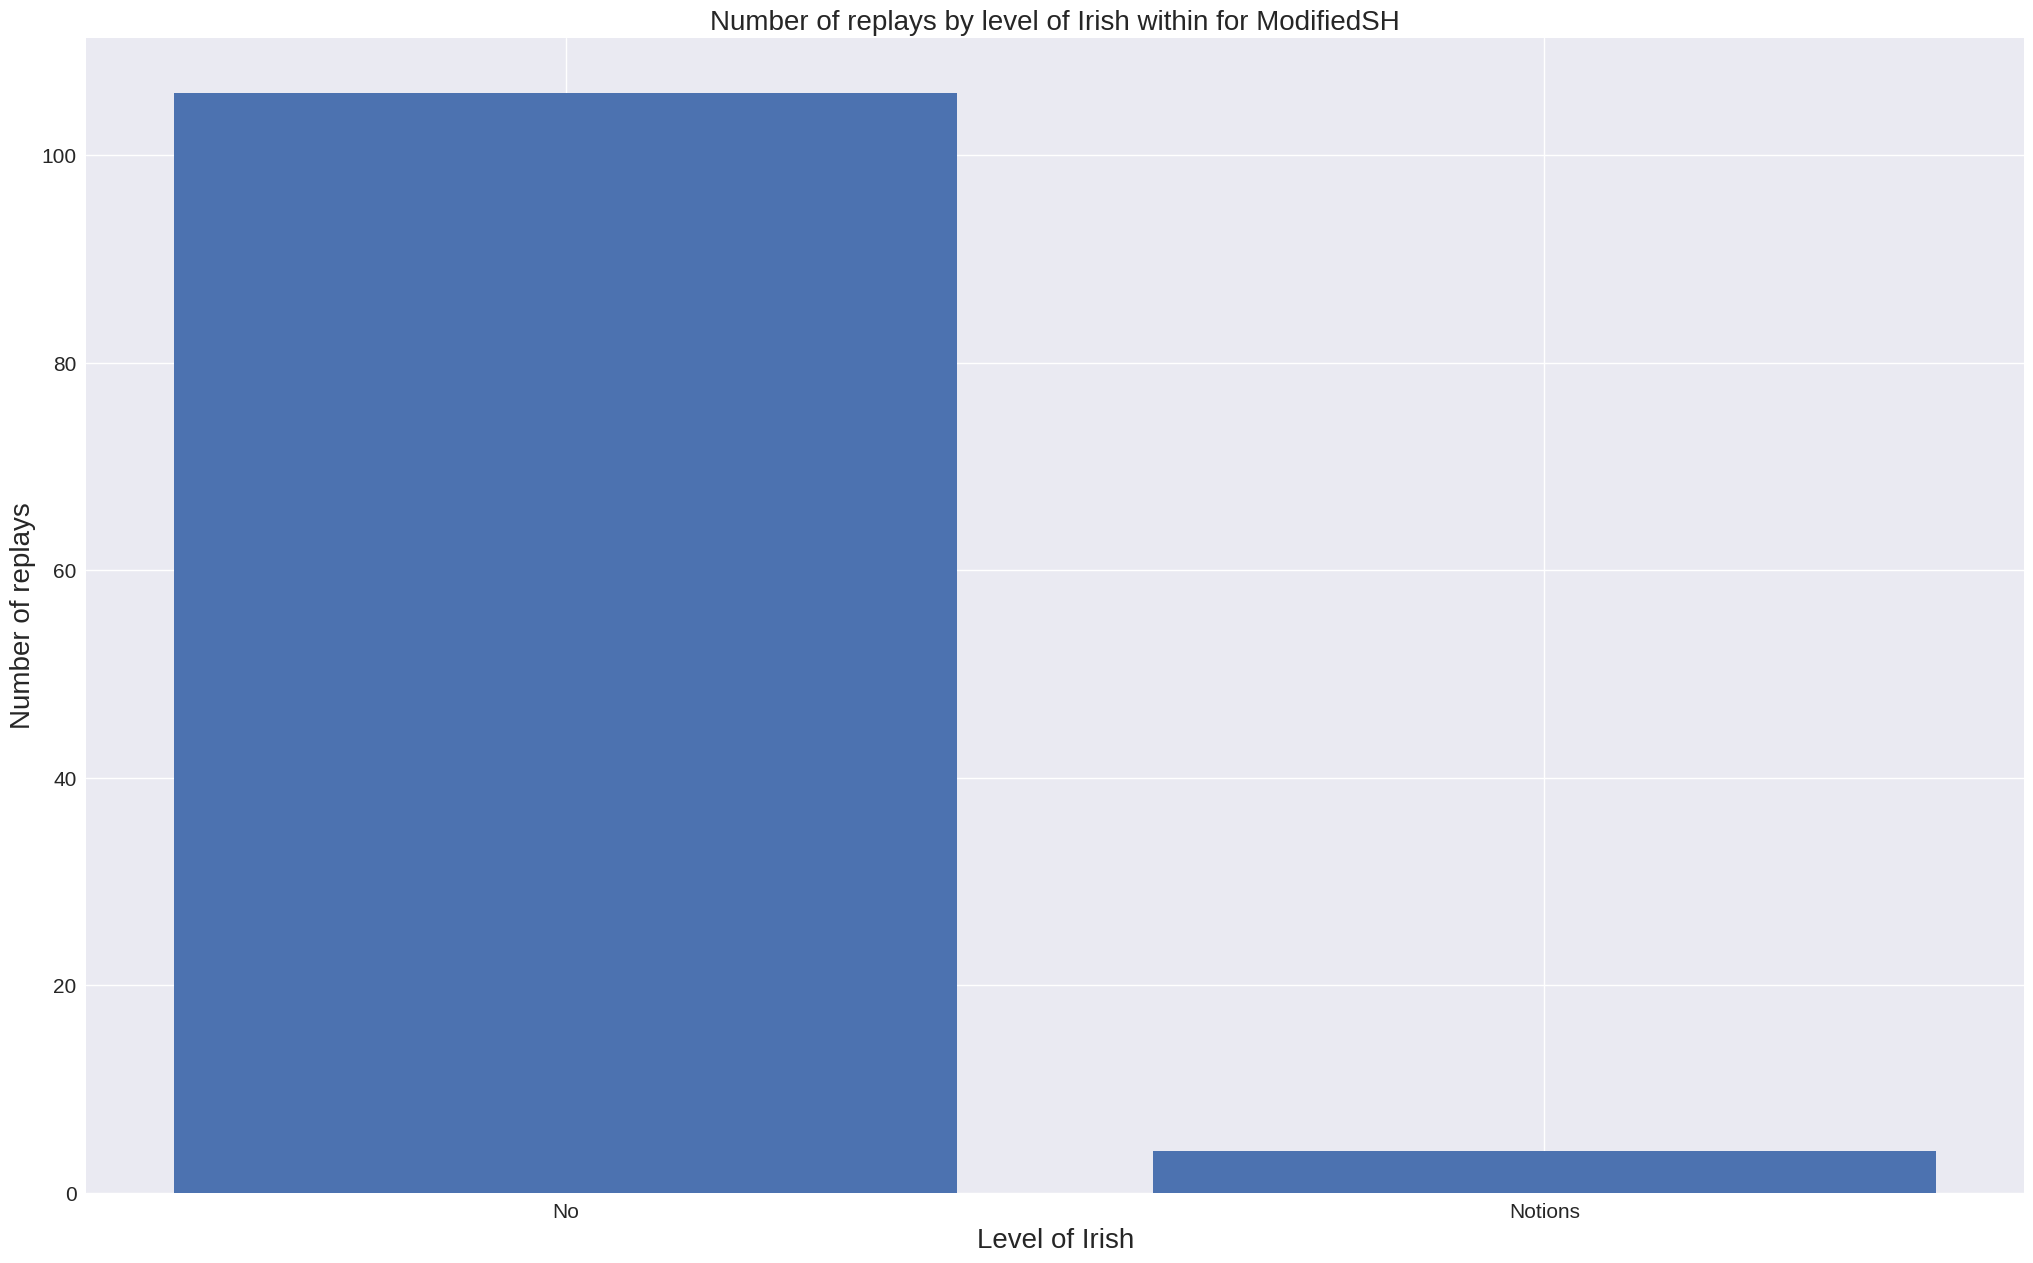

Condition1
ModifiedSH    110
ModifiedT     136
Name: Replay, dtype: int64


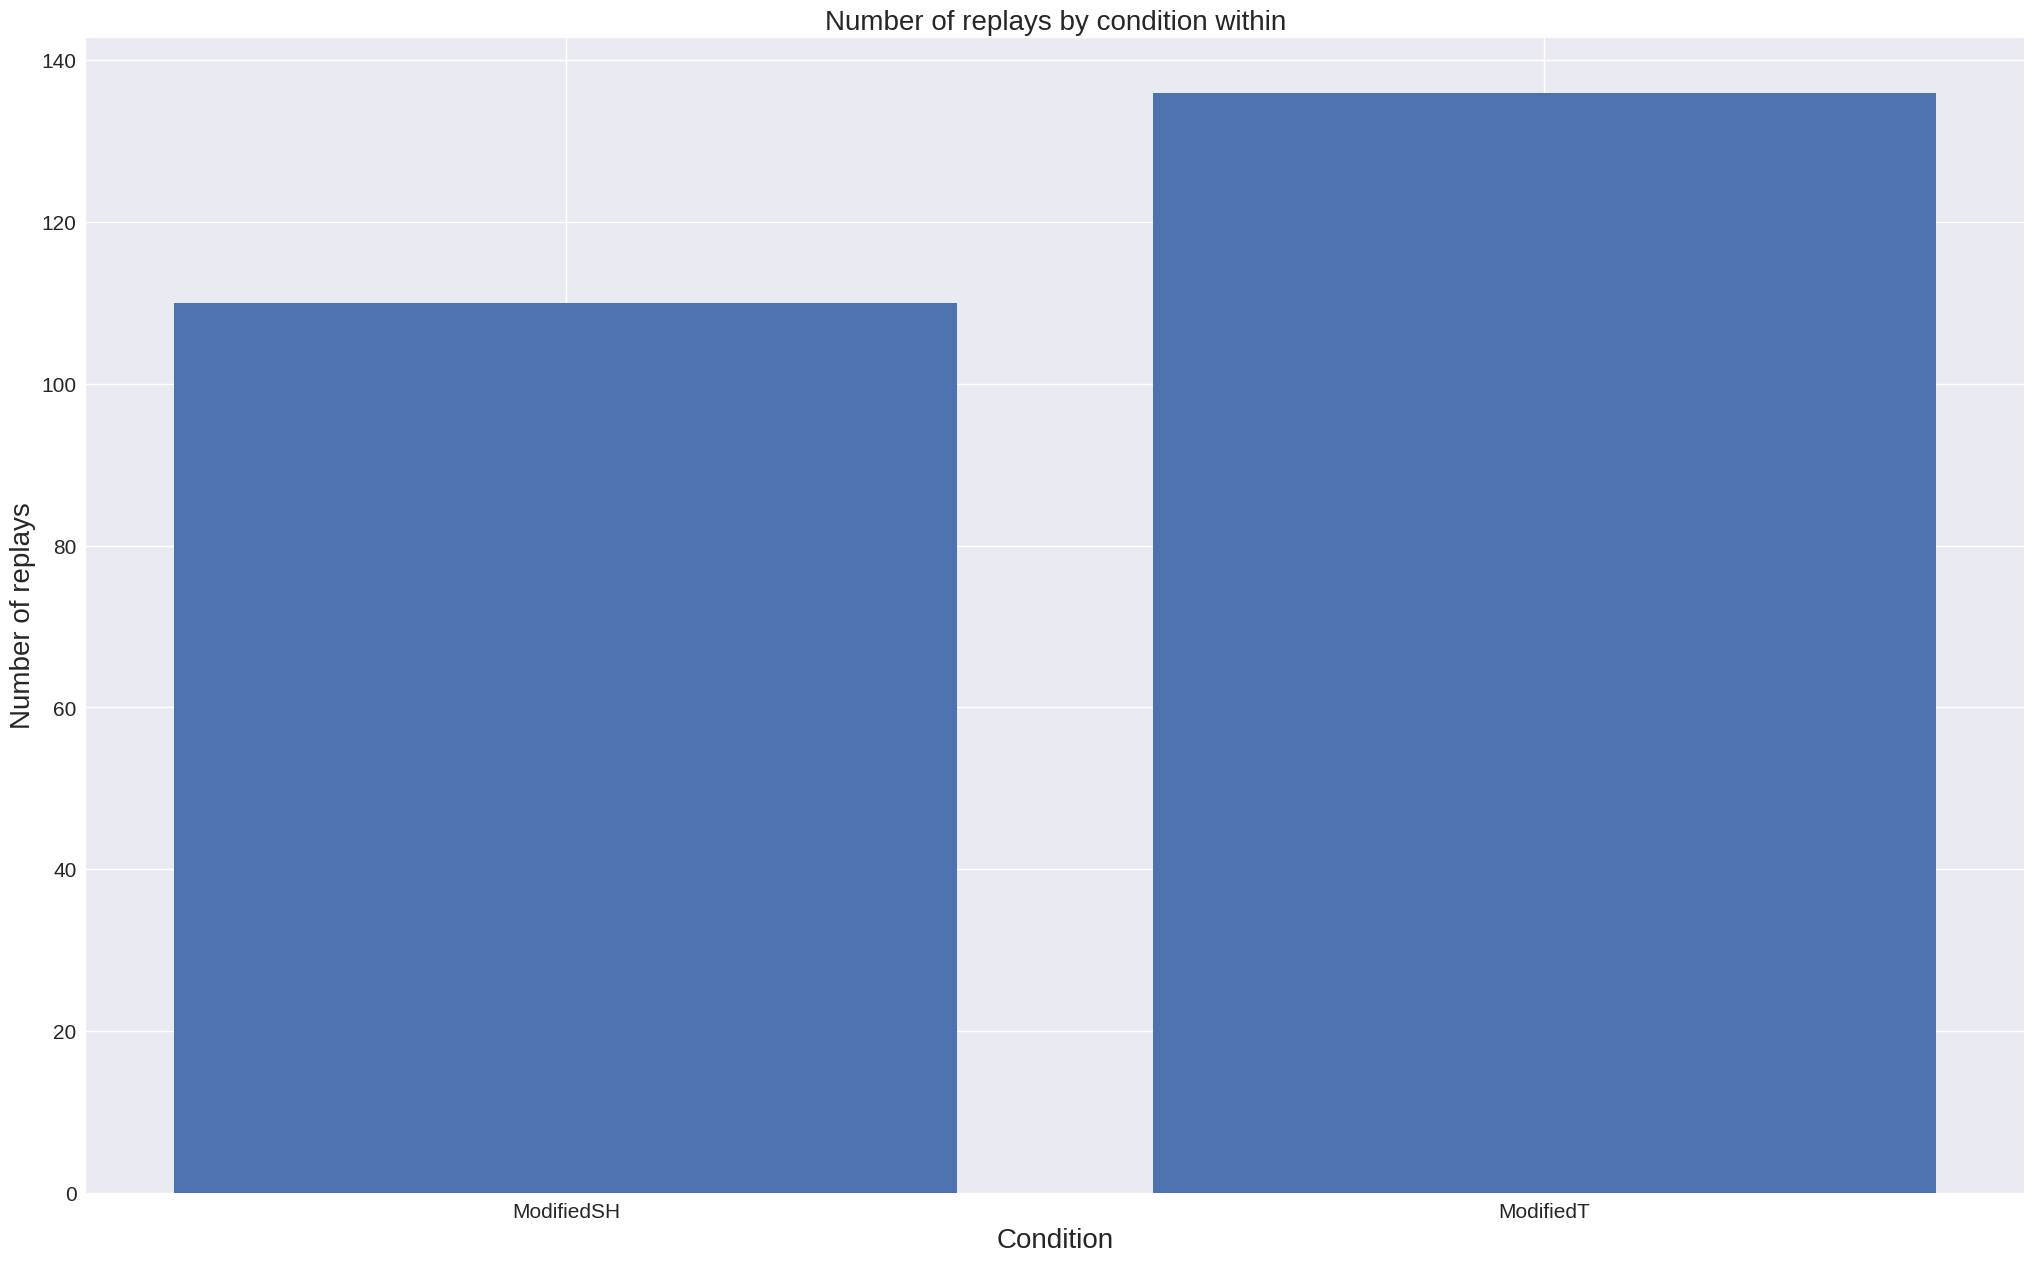

In [ ]:
# @title Replay Count other english speaking countries

#-----------------------Gender
for x in condition:
    df = filter_withoutIrish[filter_withoutIrish['Condition1'] == x]
    plot_replay(df, x, 'Gender', 'Number of replays by Gender within for ', 'Gender')

#-----------------------Age
for x in condition:
    df = filter_withoutIrish[filter_withoutIrish['Condition1'] == x]
    plot_replay(df, x, 'Age_group', 'Number of replays by Age within  for ', 'Age')


#-----------------------Level Irish
for x in condition:
    df = filter_withoutIrish[filter_withoutIrish['Condition1'] == x]
    plot_replay(df, x, 'Irish', 'Number of replays by level of Irish within for ', 'Level of Irish')

#-----------------------Condition
plot_replay(filter_withoutIrish, '', 'Condition1', 'Number of replays by condition within', 'Condition')



Gender
F    17
M    33
Name: Replay, dtype: int64


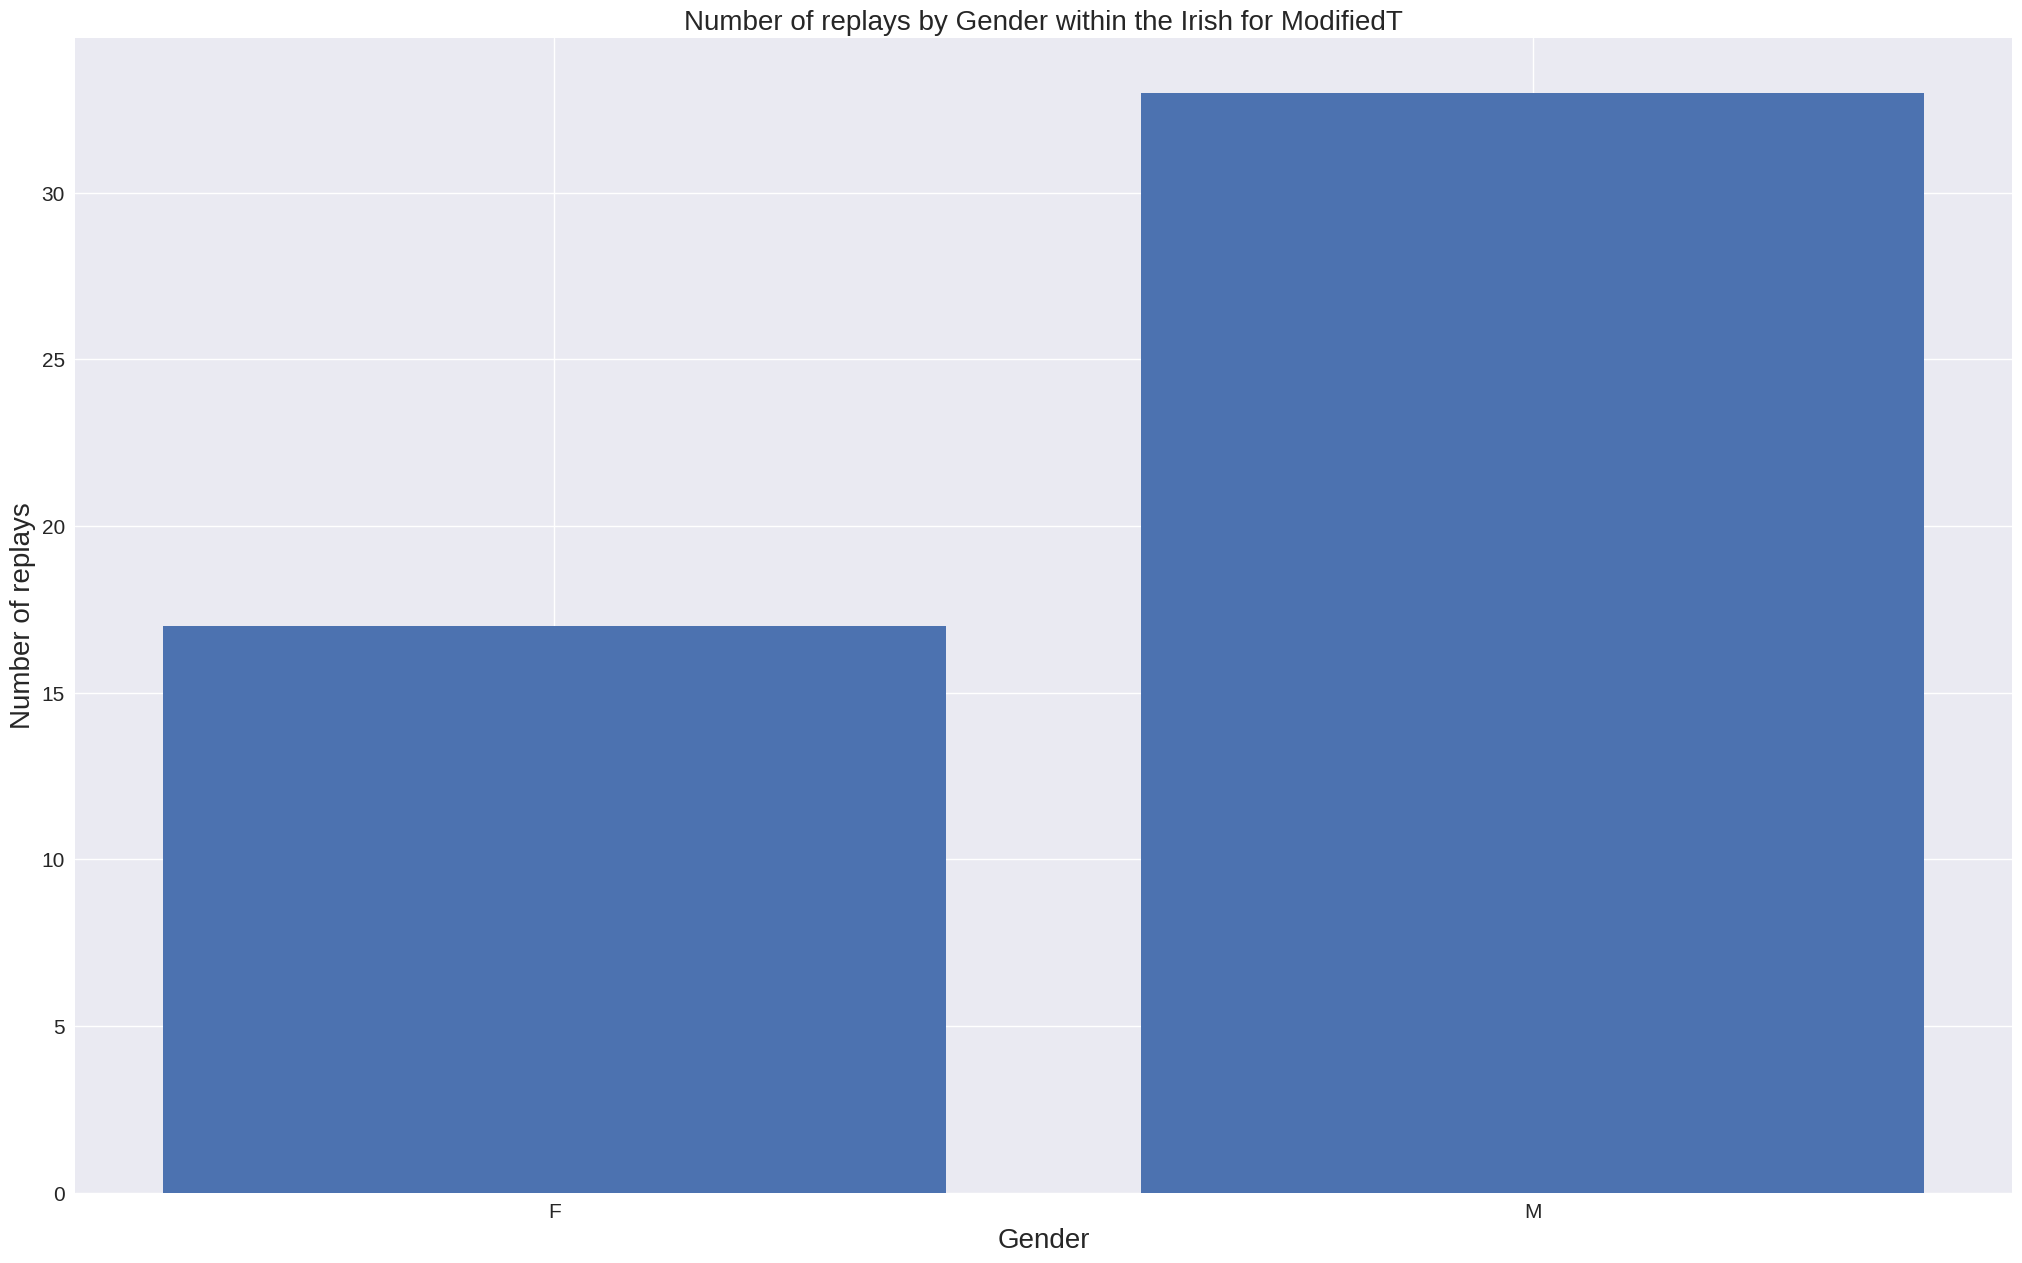

Gender
F    20
M    32
Name: Replay, dtype: int64


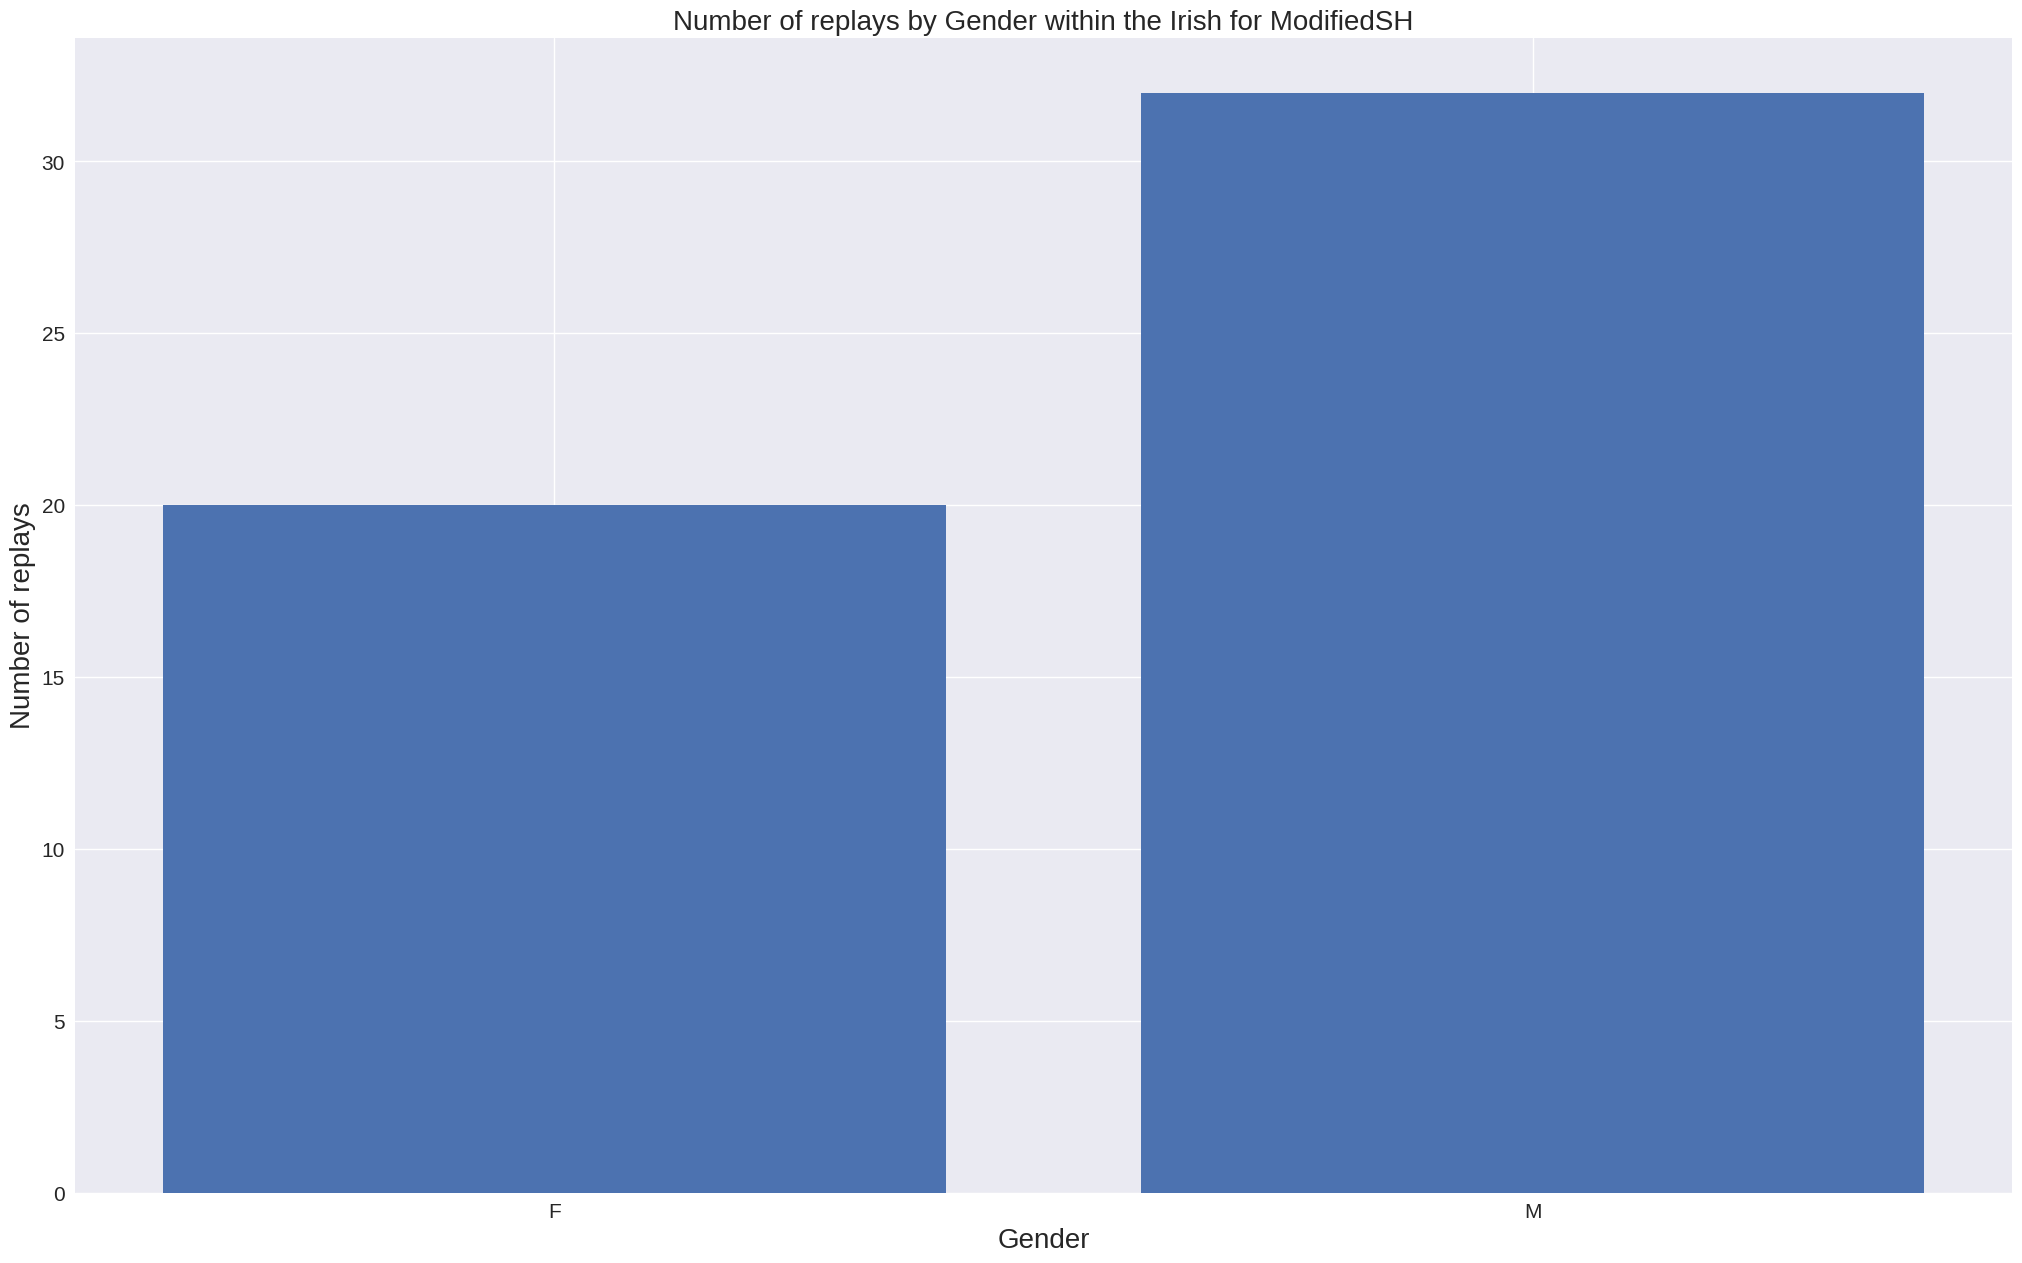

Age_group
18-37           42
38 and above     8
Name: Replay, dtype: int64


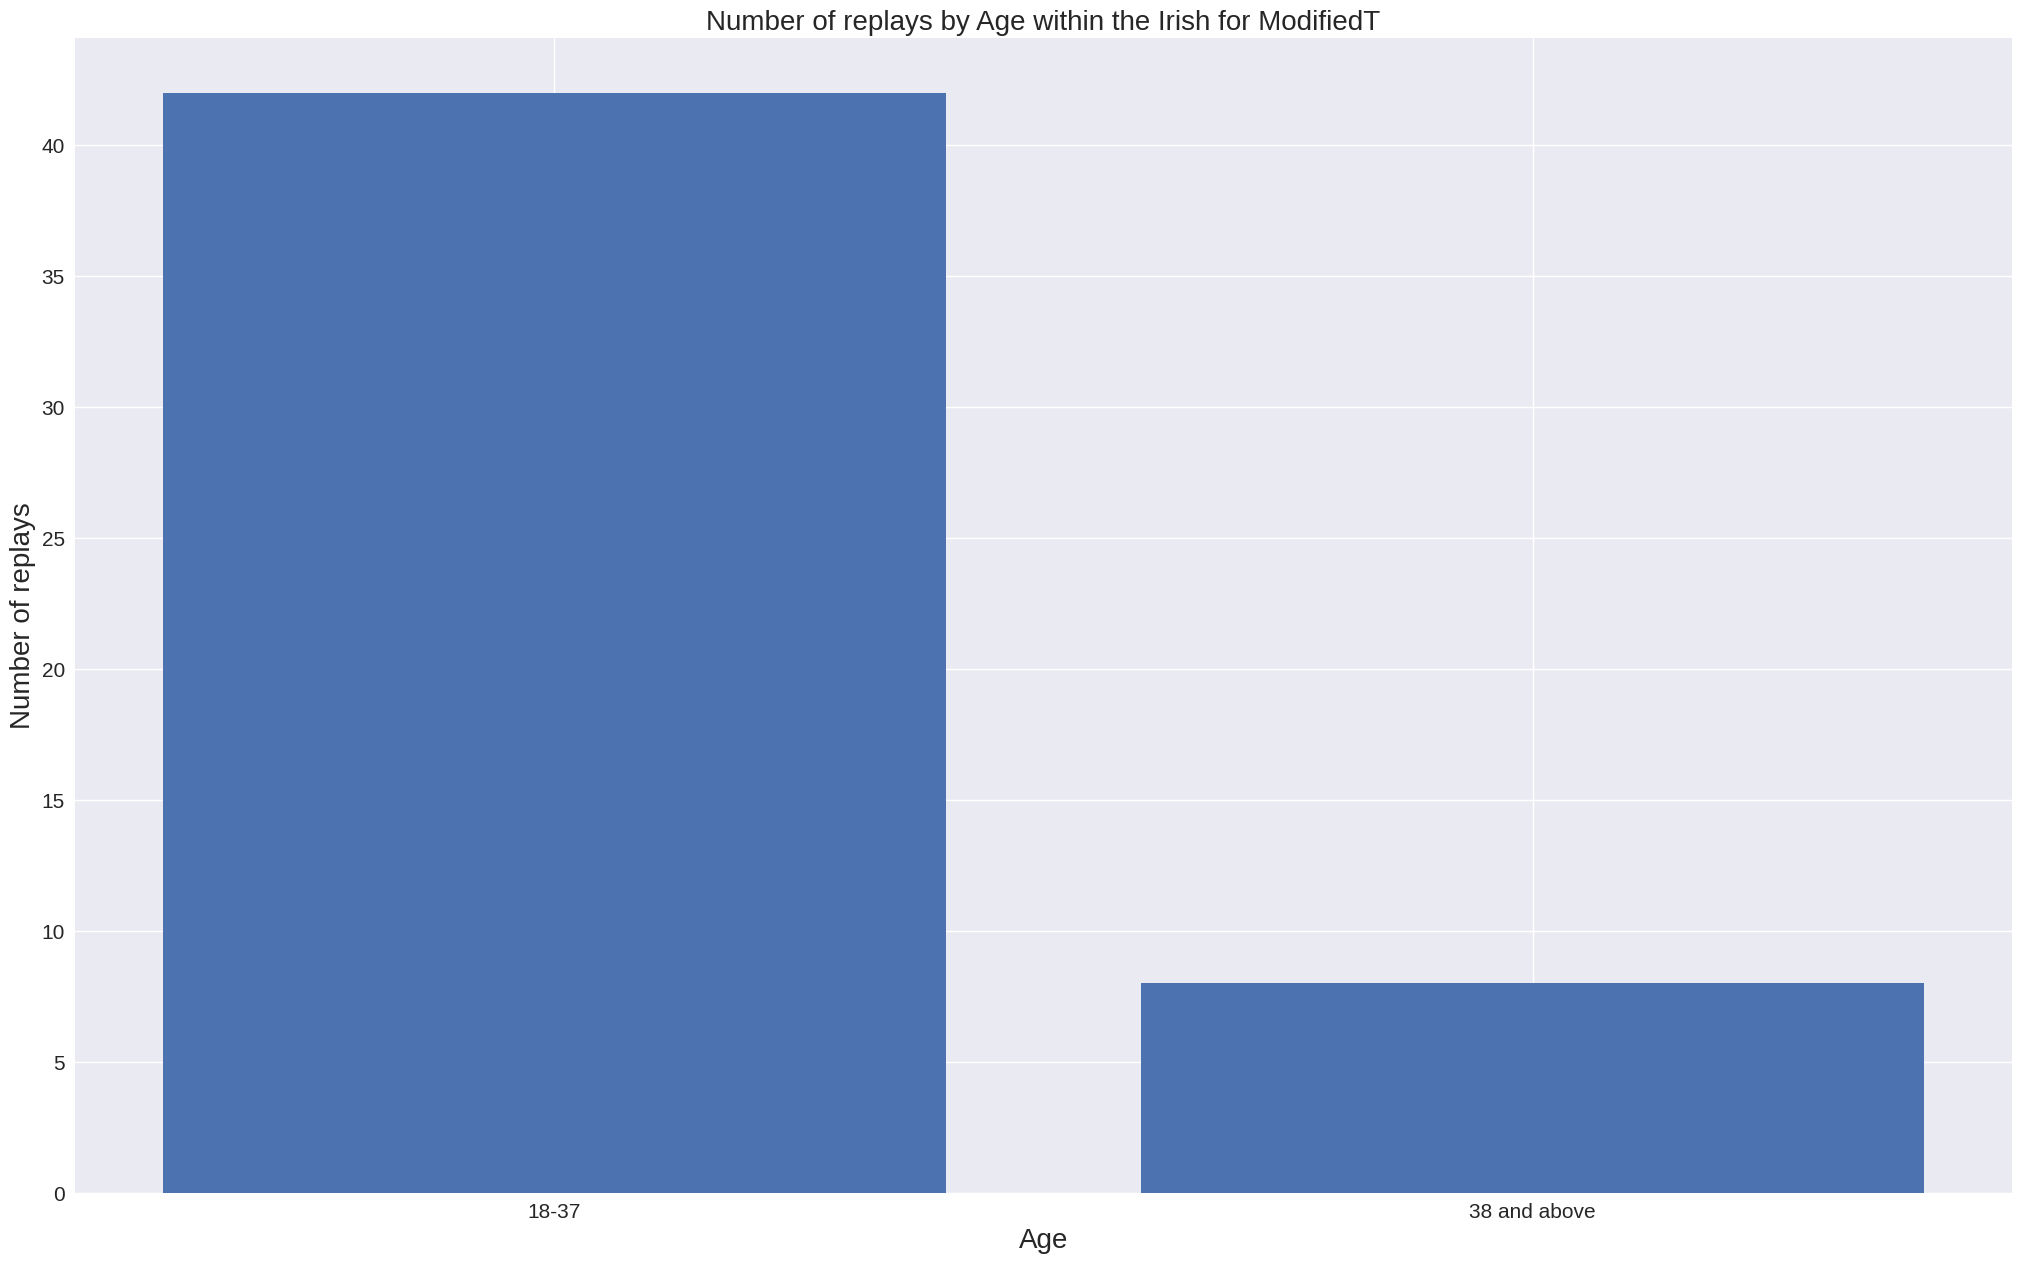

Age_group
18-37           41
38 and above    11
Name: Replay, dtype: int64


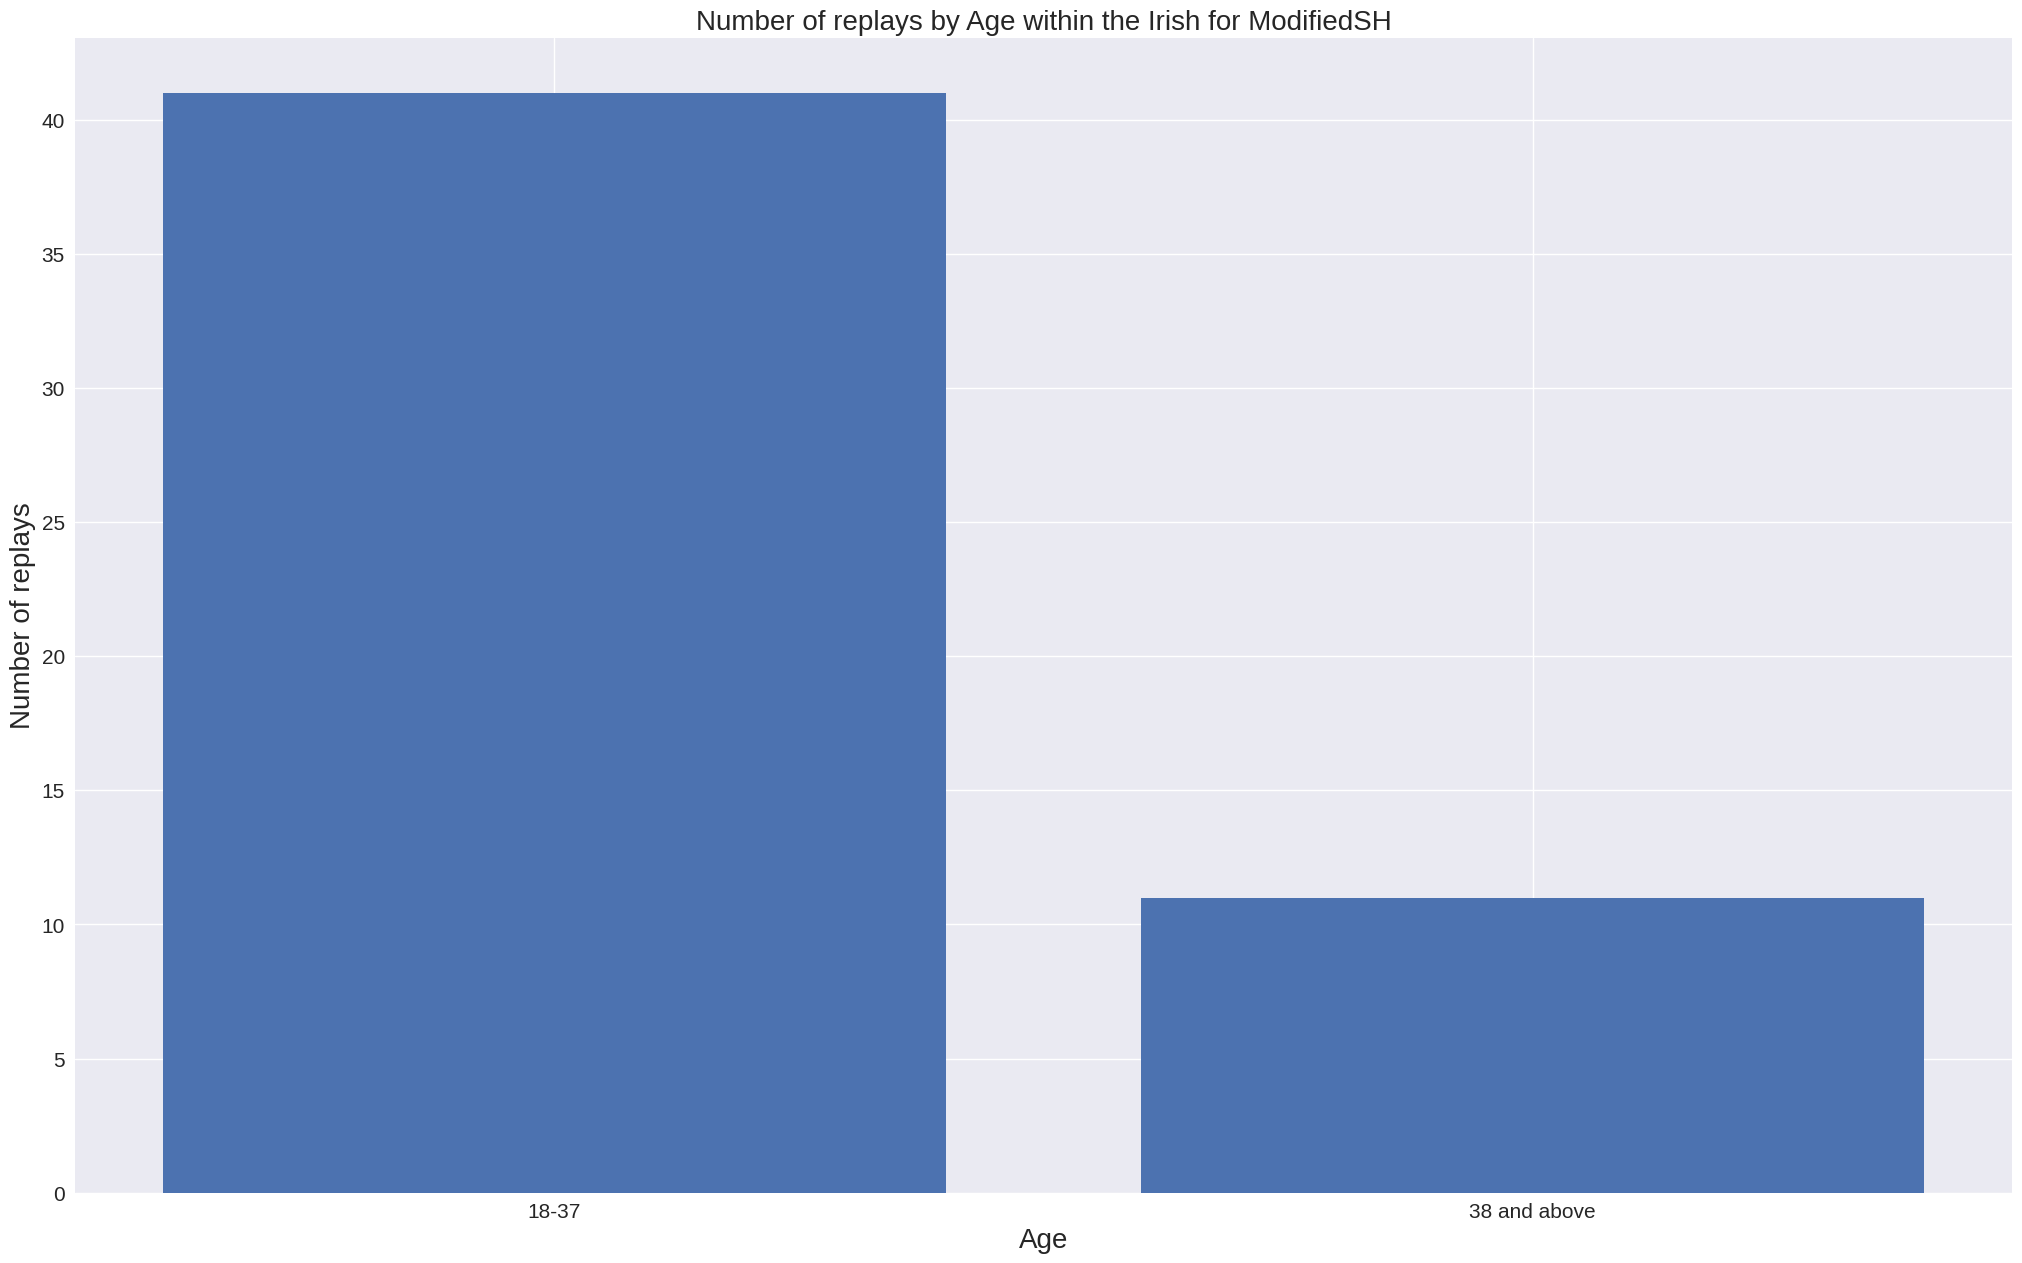

Irish
No         25
Notions     6
Yes        19
Name: Replay, dtype: int64


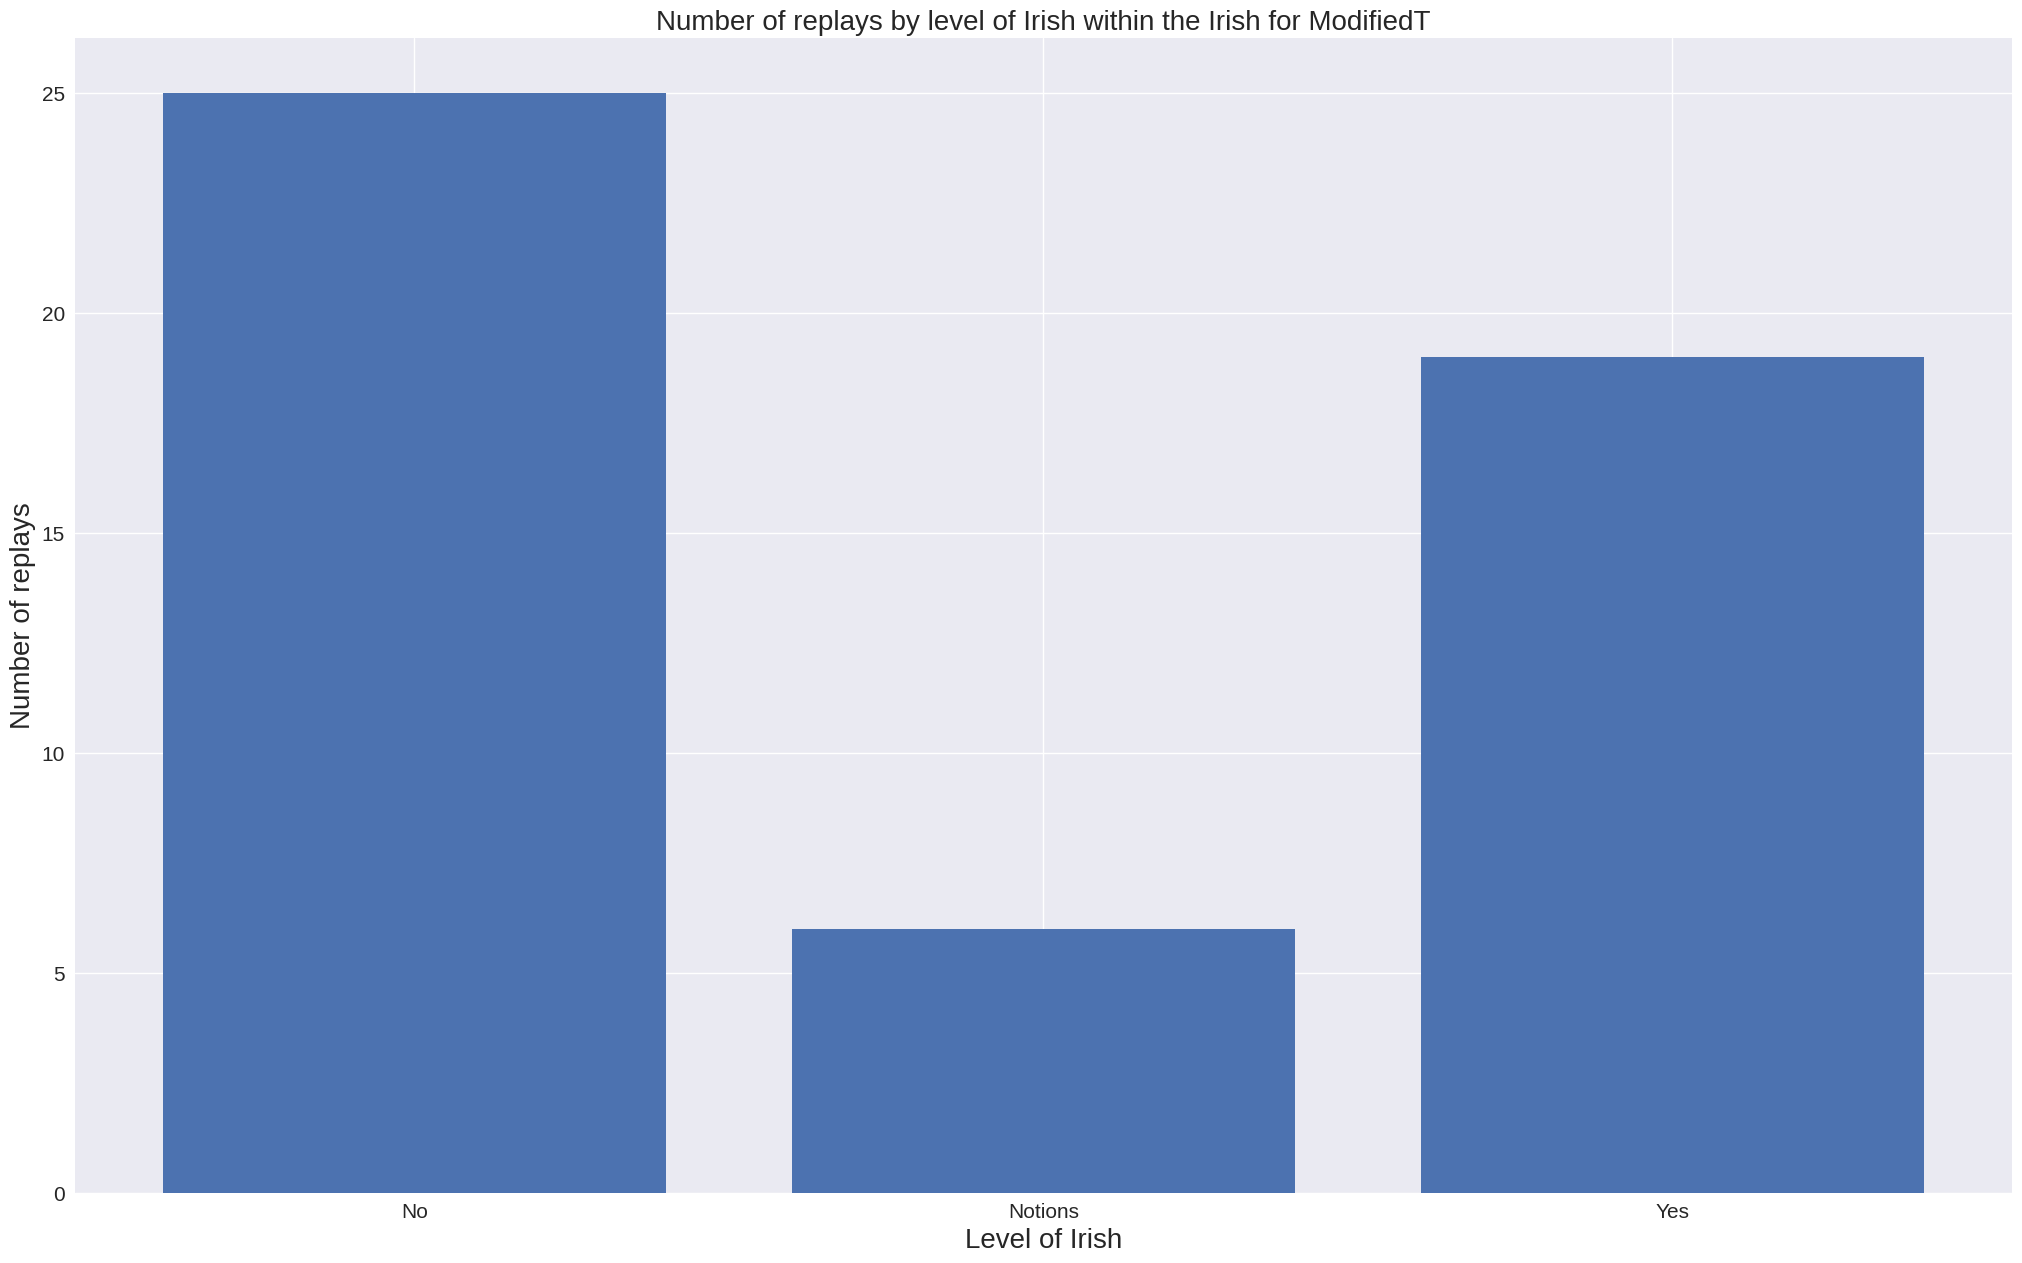

Irish
No         21
Notions     2
Yes        29
Name: Replay, dtype: int64


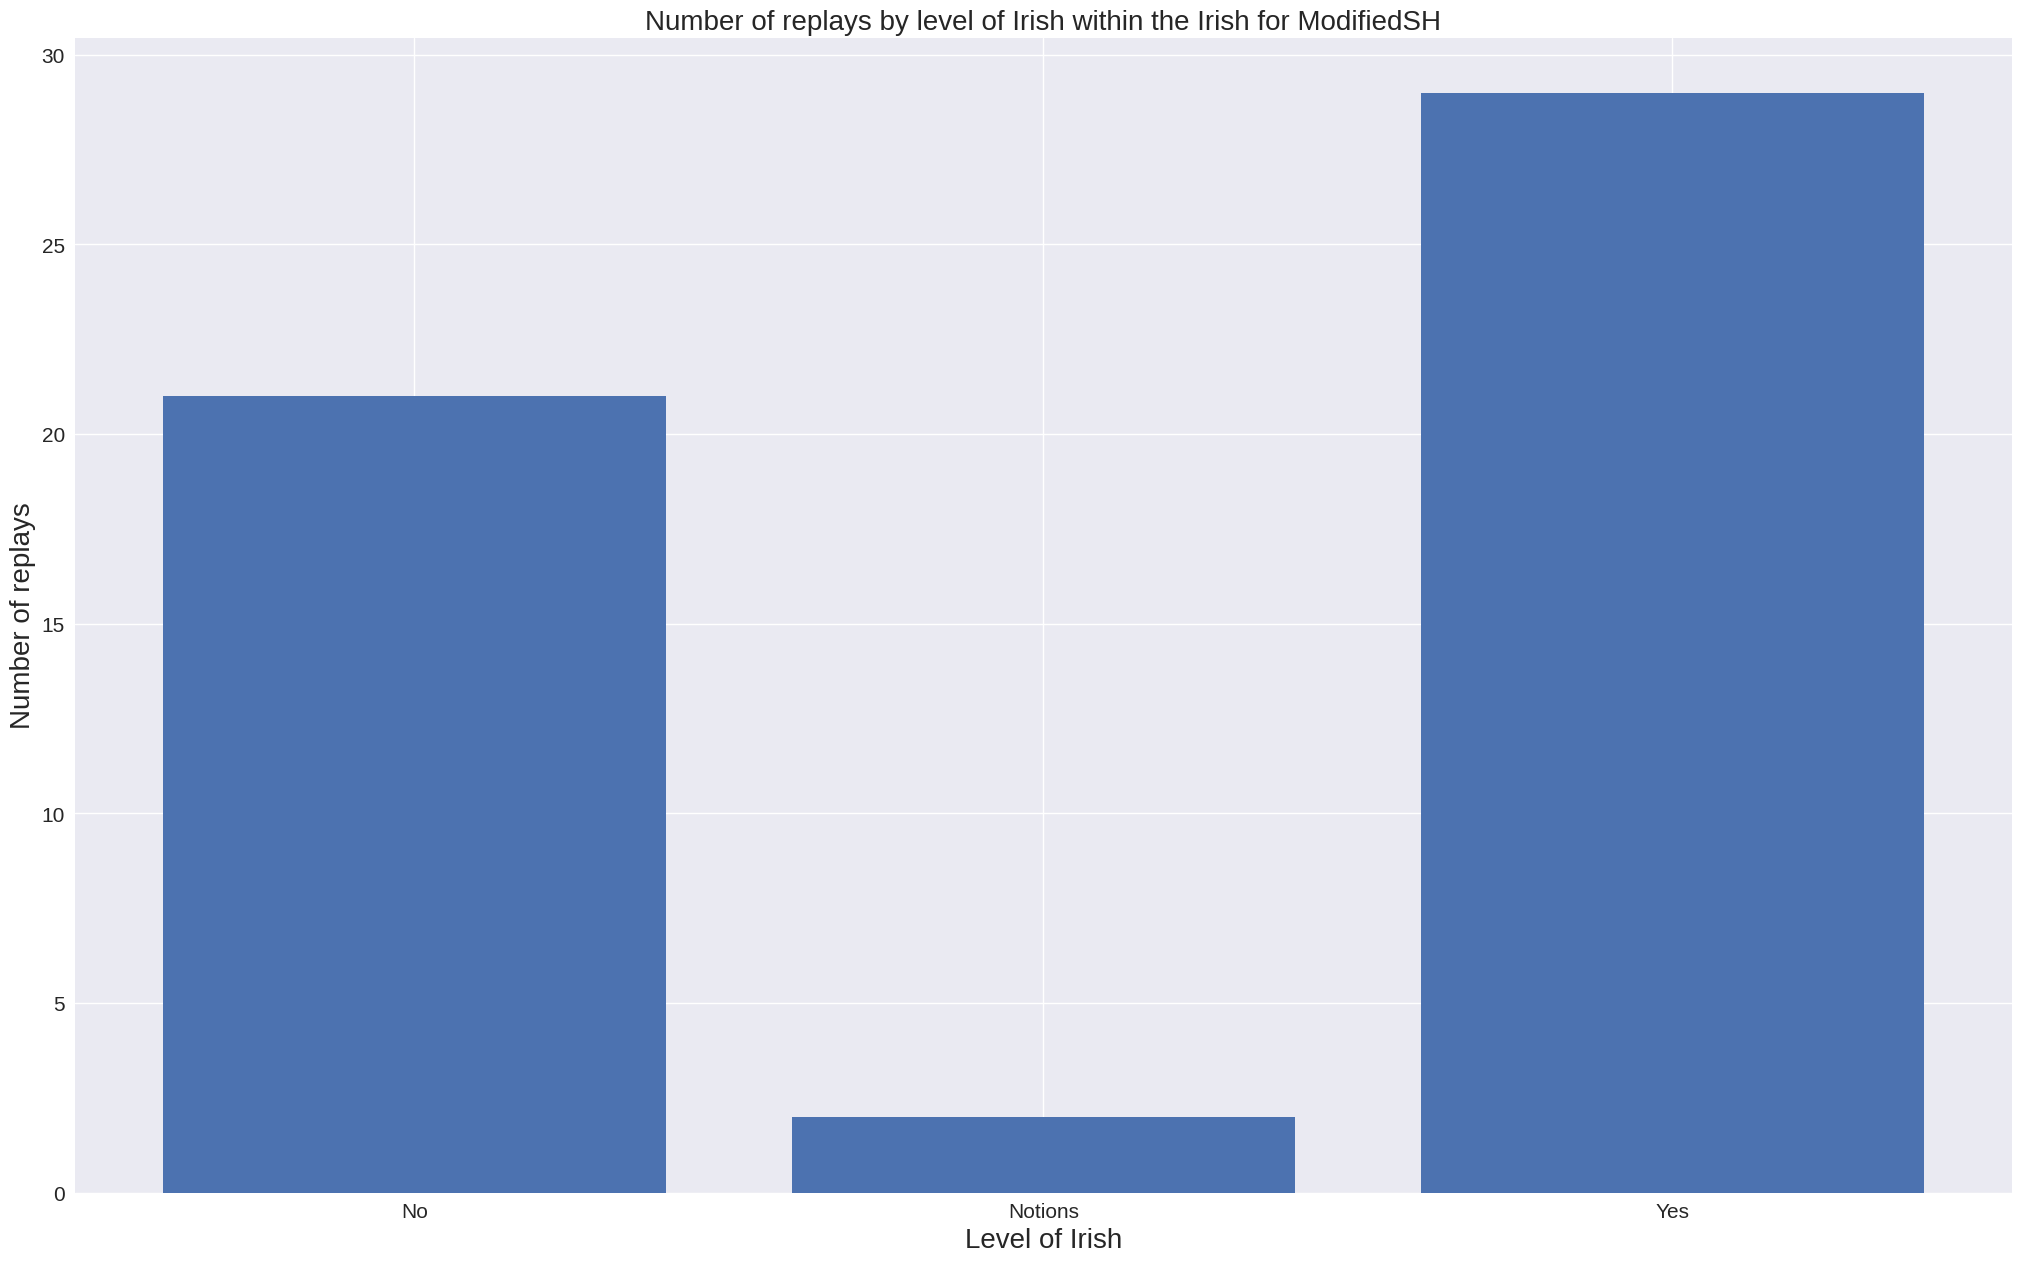

Condition1
ModifiedSH    52
ModifiedT     50
Name: Replay, dtype: int64


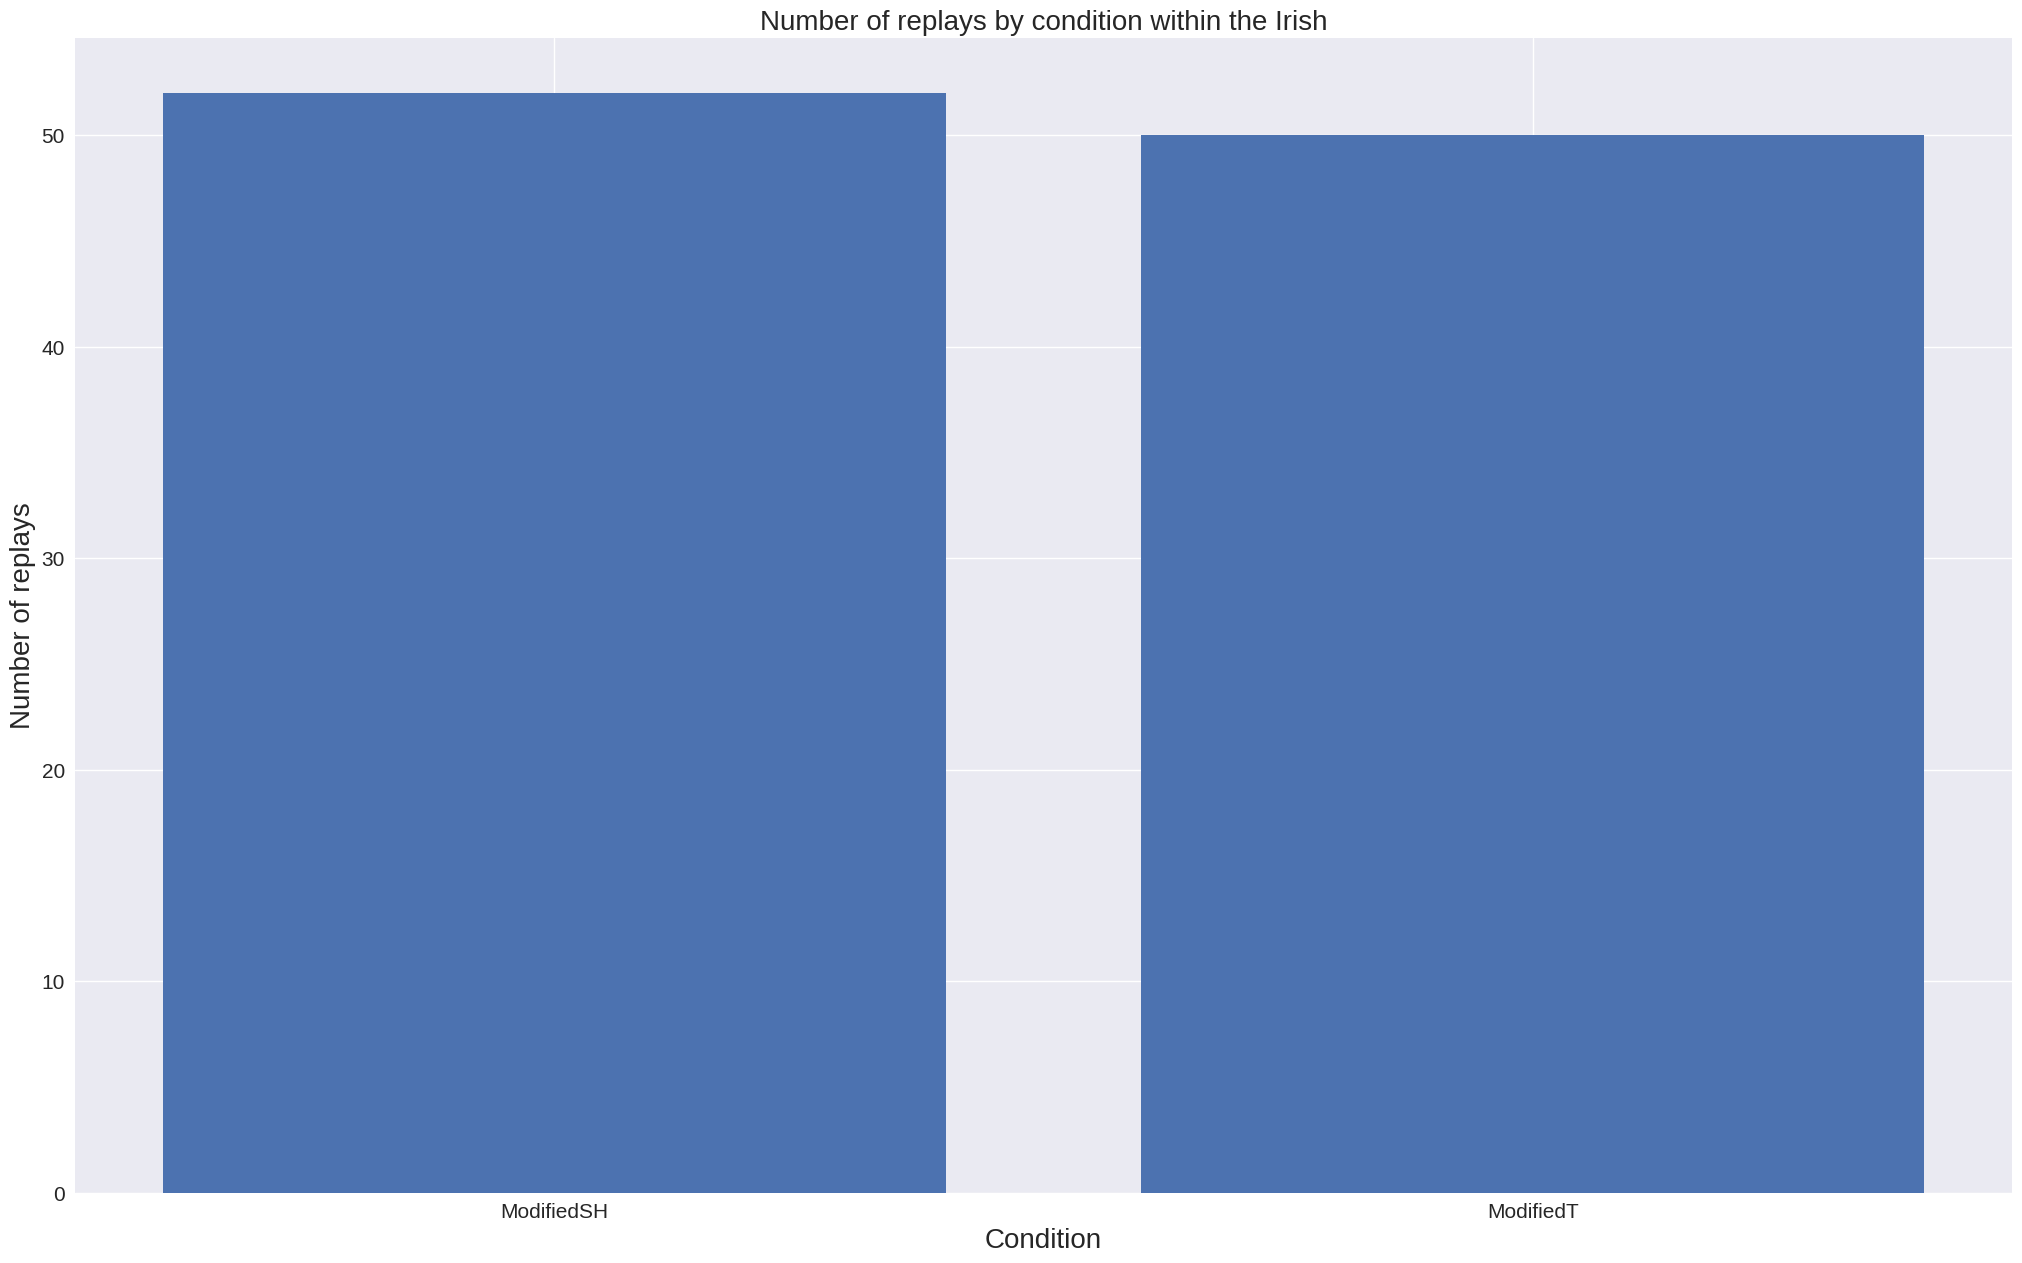

In [ ]:
# @title Replay Count within irish

#-----------------------Gender
for x in condition:
    df = filter_withinIrish[filter_withinIrish['Condition1'] == x]
    plot_replay(df, x, 'Gender', 'Number of replays by Gender within the Irish for ', 'Gender')

#-----------------------Age
for x in condition:
    df = filter_withinIrish[filter_withinIrish['Condition1'] == x]
    plot_replay(df, x, 'Age_group', 'Number of replays by Age within the Irish for ', 'Age')


#-----------------------Level Irish
for x in condition:
    df = filter_withinIrish[filter_withinIrish['Condition1'] == x]
    plot_replay(df, x, 'Irish', 'Number of replays by level of Irish within the Irish for ', 'Level of Irish')

#-----------------------Condition
plot_replay(filter_withinIrish, '', 'Condition1', 'Number of replays by condition within the Irish', 'Condition')



Chi-square statistic: 1.697362581131224
P-value: 0.19263325547831006
Degrees of freedom: 1
Expected frequencies table:
[[387.66129032 657.33870968]
 [118.33870968 200.66129032]]
The result is not significant. There is no significant association between the variables.


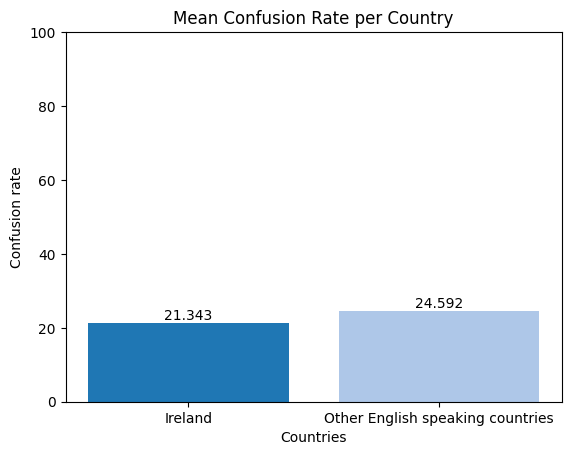

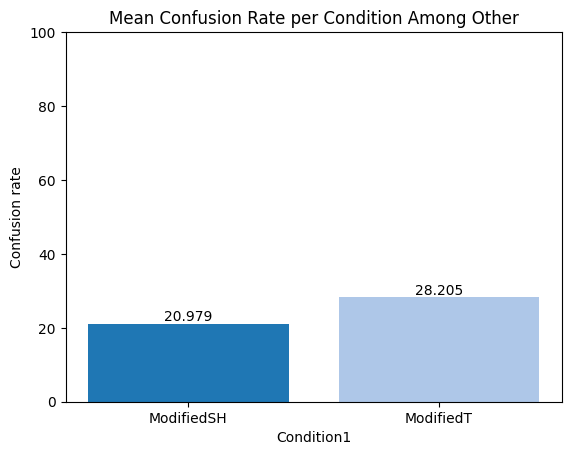

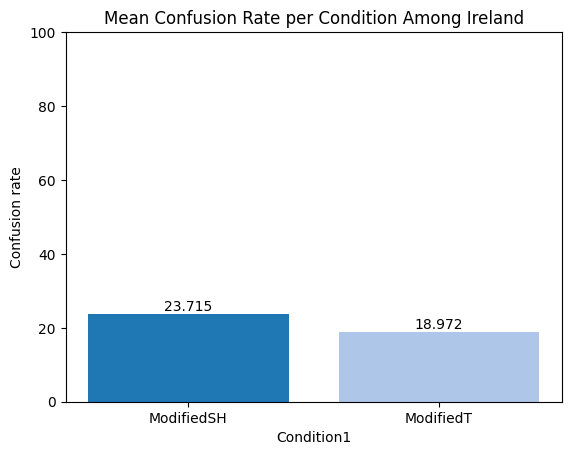

In [ ]:
# @title Confusion

success_confusion = ((df_odd['ModifiedWord'] == df_odd['key_resp_question3.keys']))
df_odd['Confusion'] = np.where(success_confusion, 1, 0)

df_odd.head()

do_chi_square_test(df_odd['Confusion'], df_odd['Country_Categorized'])
headers = ['Ireland','Other English speaking countries']
datas = [df_odd['Confusion'], df_odd['Country_Categorized']]

plot_success_rate_by_parameter(df_odd, '', 'Country_Categorized', 'Countries', 'Confusion rate', 'Mean Confusion Rate per Country', success_column='Confusion')


plot_success_rate_by_parameter(filter_withoutIrish, '', 'Condition1', 'Condition1', 'Confusion rate', 'Mean Confusion Rate per Condition Among Other', success_column='Confusion')
plot_success_rate_by_parameter(filter_withinIrish, '', 'Condition1', 'Condition1', 'Confusion rate', 'Mean Confusion Rate per Condition Among Ireland', success_column='Confusion')
